XGBoost to predict streamflow. Forcings are aggregated from hourly to daily to match streamflow resolution.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from datetime import datetime, timedelta
import hydroeval
import netCDF4 as nc
import xgboost as xgb
import scipy as sp
import pickle
from src import load_data, evaluate

np.random.seed(0)

time_stamp = datetime.now().strftime('%Y%m%d-%H%M%S')
time_stamp

'20190705-083405'

In [2]:
station_data_dict = load_data.load_train_test_gridded_aggregatedForcings()

Test: 2010-01-09 00:00:00 - 2010-12-31
02GA010
Shapes: train (1323, 302), val (146, 302), test (357, 302)
XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6976846751310776,
             colsample_bytree=0.7344372731088862, gamma=0.6150643892160236,
             importance_type='gain', learning_rate=0.31922894145122926,
             max_delta_step=0, max_depth=3, min_child_weight=2, missing=nan,
             n_estimators=1000, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=123, reg_alpha=4.402649822691215,
             reg_lambda=1.978484305737496, scale_pos_weight=1, seed=None,
             silent=True, subsample=0.9774739233493387)


/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:19.4271	validation_1-rmse:20.7953
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:16.8735	validation_1-rmse:18.7924
[2]	validation_0-rmse:15.4221	validation_1-rmse:18.093
[3]	validation_0-rmse:14.1803	validation_1-rmse:16.6852
[4]	validation_0-rmse:13.2172	validation_1-rmse:16.1973
[5]	validation_0-rmse:12.5564	validation_1-rmse:15.6284
[6]	validation_0-rmse:12.1641	validation_1-rmse:15.5934
[7]	validation_0-rmse:11.8718	validation_1-rmse:15.6305
[8]	validation_0-rmse:11.3801	validation_1-rmse:15.3255
[9]	validation_0-rmse:10.9477	validation_1-rmse:15.0034
[10]	validation_0-rmse:10.3648	validation_1-rmse:14.4081
[11]	validation_0-rmse:10.0781	validation_1-rmse:14.3252
[12]	validation_0-rmse:9.82452	validation_1-rmse:14.3924
[13]	validation_0-rmse:9.55399	validation_1-rmse:14.2967
[14]	validation_0-rmse:9.41984	validation_1-rmse:14.4

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[62]	validation_0-rmse:5.86265	validation_1-rmse:9.72589
[63]	validation_0-rmse:5.79329	validation_1-rmse:9.74852
[64]	validation_0-rmse:5.77176	validation_1-rmse:9.78239
[65]	validation_0-rmse:5.75514	validation_1-rmse:9.76336
[66]	validation_0-rmse:5.73202	validation_1-rmse:9.75694
[67]	validation_0-rmse:5.68939	validation_1-rmse:9.72899
[68]	validation_0-rmse:5.67271	validation_1-rmse:9.72815
[69]	validation_0-rmse:5.62126	validation_1-rmse:9.66716
[70]	validation_0-rmse:5.5983	validation_1-rmse:9.66511
[71]	validation_0-rmse:5.53285	validation_1-rmse:9.60044
[72]	validation_0-rmse:5.48047	validation_1-rmse:9.53227
[73]	validation_0-rmse:5.46768	validation_1-rmse:9.53832
[74]	validation_0-rmse:5.45357	validation_1-rmse:9.53826
[75]	validation_0-rmse:5.41708	validation_1-rmse:9.55558
[76]	validation_0-rmse:5.38564	validation_1-rmse:9.55645
[77]	validation_0-rmse:5.3616	validation_1-rmse:9.54399
[78]	validation_0-rmse:5.34373	validation_1-rmse:9.56282
[79]	validation_0-rmse:5.30496	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[40]	validation_0-rmse:7.87464	validation_1-rmse:10.2943
[41]	validation_0-rmse:7.81696	validation_1-rmse:10.2555
[42]	validation_0-rmse:7.74903	validation_1-rmse:10.2434
[43]	validation_0-rmse:7.676	validation_1-rmse:10.2372
[44]	validation_0-rmse:7.61342	validation_1-rmse:10.2279
[45]	validation_0-rmse:7.54698	validation_1-rmse:10.1657
[46]	validation_0-rmse:7.48907	validation_1-rmse:10.1624
[47]	validation_0-rmse:7.44027	validation_1-rmse:10.1419
[48]	validation_0-rmse:7.37143	validation_1-rmse:10.0857
[49]	validation_0-rmse:7.3166	validation_1-rmse:10.0551
[50]	validation_0-rmse:7.2608	validation_1-rmse:10.0372
[51]	validation_0-rmse:7.19819	validation_1-rmse:9.96921
[52]	validation_0-rmse:7.15319	validation_1-rmse:9.92419
[53]	validation_0-rmse:7.09036	validation_1-rmse:9.89768
[54]	validation_0-rmse:7.04283	validation_1-rmse:9.85703
[55]	validation_0-rmse:6.99957	validation_1-rmse:9.82814
[56]	validation_0-rmse:6.95044	validation_1-rmse:9.80671
[57]	validation_0-rmse:6.89457	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:6.73607	validation_1-rmse:6.24653
[47]	validation_0-rmse:6.68715	validation_1-rmse:6.21301
[48]	validation_0-rmse:6.63884	validation_1-rmse:6.18187
[49]	validation_0-rmse:6.59211	validation_1-rmse:6.15838
[50]	validation_0-rmse:6.54163	validation_1-rmse:6.14881
[51]	validation_0-rmse:6.5	validation_1-rmse:6.12646
[52]	validation_0-rmse:6.45601	validation_1-rmse:6.10562
[53]	validation_0-rmse:6.40652	validation_1-rmse:6.08399
[54]	validation_0-rmse:6.36075	validation_1-rmse:6.07768
[55]	validation_0-rmse:6.31289	validation_1-rmse:6.06565
[56]	validation_0-rmse:6.27009	validation_1-rmse:6.04795
[57]	validation_0-rmse:6.22881	validation_1-rmse:6.02497
[58]	validation_0-rmse:6.18964	validation_1-rmse:6.00977
[59]	validation_0-rmse:6.15144	validation_1-rmse:5.99093
[60]	validation_0-rmse:6.11744	validation_1-rmse:5.97627
[61]	validation_0-rmse:6.08228	validation_1-rmse:5.96924
[62]	validation_0-rmse:6.0474	validation_1-rmse:5.9471
[63]	validation_0-rmse:6.01467	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[28]	validation_0-rmse:67.7881	validation_1-rmse:95.5843
[29]	validation_0-rmse:67.015	validation_1-rmse:94.8832
[30]	validation_0-rmse:66.287	validation_1-rmse:94.3302
[31]	validation_0-rmse:65.6499	validation_1-rmse:93.717
[32]	validation_0-rmse:65.0041	validation_1-rmse:93.0273
[33]	validation_0-rmse:64.3102	validation_1-rmse:92.4665
[34]	validation_0-rmse:63.6566	validation_1-rmse:91.9142
[35]	validation_0-rmse:63.075	validation_1-rmse:91.4136
[36]	validation_0-rmse:62.4699	validation_1-rmse:90.8898
[37]	validation_0-rmse:61.8362	validation_1-rmse:90.4948
[38]	validation_0-rmse:61.2693	validation_1-rmse:89.9723
[39]	validation_0-rmse:60.6847	validation_1-rmse:89.6471
[40]	validation_0-rmse:60.2134	validation_1-rmse:89.2224
[41]	validation_0-rmse:59.6847	validation_1-rmse:88.6476
[42]	validation_0-rmse:59.191	validation_1-rmse:88.246
[43]	validation_0-rmse:58.6627	validation_1-rmse:87.8101
[44]	validation_0-rmse:58.2323	validation_1-rmse:87.2875
[45]	validation_0-rmse:57.7813	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[43]	validation_0-rmse:2.1491	validation_1-rmse:4.38133
[44]	validation_0-rmse:2.10812	validation_1-rmse:4.37989
[45]	validation_0-rmse:2.07961	validation_1-rmse:4.37159
[46]	validation_0-rmse:2.05257	validation_1-rmse:4.34888
[47]	validation_0-rmse:2.02613	validation_1-rmse:4.33092
[48]	validation_0-rmse:2.0007	validation_1-rmse:4.32487
[49]	validation_0-rmse:1.98025	validation_1-rmse:4.30441
[50]	validation_0-rmse:1.95378	validation_1-rmse:4.29358
[51]	validation_0-rmse:1.93389	validation_1-rmse:4.28648
[52]	validation_0-rmse:1.91029	validation_1-rmse:4.29175
[53]	validation_0-rmse:1.89202	validation_1-rmse:4.28211
[54]	validation_0-rmse:1.86979	validation_1-rmse:4.27328
[55]	validation_0-rmse:1.84437	validation_1-rmse:4.26891
[56]	validation_0-rmse:1.81632	validation_1-rmse:4.26849
[57]	validation_0-rmse:1.80429	validation_1-rmse:4.2697
[58]	validation_0-rmse:1.79266	validation_1-rmse:4.25973
[59]	validation_0-rmse:1.77564	validation_1-rmse:4.25775
[60]	validation_0-rmse:1.75708	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[70]	validation_0-rmse:3.43528	validation_1-rmse:6.47571
[71]	validation_0-rmse:3.41833	validation_1-rmse:6.47928
[72]	validation_0-rmse:3.39024	validation_1-rmse:6.49798
[73]	validation_0-rmse:3.37516	validation_1-rmse:6.5133
[74]	validation_0-rmse:3.33832	validation_1-rmse:6.52058
[75]	validation_0-rmse:3.32336	validation_1-rmse:6.52784
[76]	validation_0-rmse:3.28934	validation_1-rmse:6.50147
[77]	validation_0-rmse:3.26155	validation_1-rmse:6.4741
[78]	validation_0-rmse:3.24278	validation_1-rmse:6.46034
[79]	validation_0-rmse:3.22627	validation_1-rmse:6.46621
[80]	validation_0-rmse:3.2126	validation_1-rmse:6.47004
[81]	validation_0-rmse:3.18688	validation_1-rmse:6.47996
[82]	validation_0-rmse:3.15275	validation_1-rmse:6.48512
[83]	validation_0-rmse:3.12248	validation_1-rmse:6.48229
[84]	validation_0-rmse:3.09277	validation_1-rmse:6.48739
[85]	validation_0-rmse:3.07441	validation_1-rmse:6.4875
[86]	validation_0-rmse:3.04674	validation_1-rmse:6.50509
[87]	validation_0-rmse:3.03739	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[44]	validation_0-rmse:4.7081	validation_1-rmse:5.18876
[45]	validation_0-rmse:4.66697	validation_1-rmse:5.15809
[46]	validation_0-rmse:4.62749	validation_1-rmse:5.12518
[47]	validation_0-rmse:4.58631	validation_1-rmse:5.09598
[48]	validation_0-rmse:4.54788	validation_1-rmse:5.06933
[49]	validation_0-rmse:4.50908	validation_1-rmse:5.03822
[50]	validation_0-rmse:4.47296	validation_1-rmse:5.01087
[51]	validation_0-rmse:4.4381	validation_1-rmse:4.98691
[52]	validation_0-rmse:4.40603	validation_1-rmse:4.96428
[53]	validation_0-rmse:4.37543	validation_1-rmse:4.9327
[54]	validation_0-rmse:4.34373	validation_1-rmse:4.90809
[55]	validation_0-rmse:4.30816	validation_1-rmse:4.87912
[56]	validation_0-rmse:4.27942	validation_1-rmse:4.85517
[57]	validation_0-rmse:4.24799	validation_1-rmse:4.83127
[58]	validation_0-rmse:4.22053	validation_1-rmse:4.8117
[59]	validation_0-rmse:4.19444	validation_1-rmse:4.79463
[60]	validation_0-rmse:4.16743	validation_1-rmse:4.77544
[61]	validation_0-rmse:4.14055	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[56]	validation_0-rmse:4.8518	validation_1-rmse:5.23438
[57]	validation_0-rmse:4.82041	validation_1-rmse:5.21898
[58]	validation_0-rmse:4.79656	validation_1-rmse:5.1897
[59]	validation_0-rmse:4.76847	validation_1-rmse:5.17036
[60]	validation_0-rmse:4.74357	validation_1-rmse:5.15666
[61]	validation_0-rmse:4.72251	validation_1-rmse:5.14801
[62]	validation_0-rmse:4.69302	validation_1-rmse:5.13836
[63]	validation_0-rmse:4.66864	validation_1-rmse:5.11414
[64]	validation_0-rmse:4.64045	validation_1-rmse:5.09766
[65]	validation_0-rmse:4.61637	validation_1-rmse:5.0872
[66]	validation_0-rmse:4.5909	validation_1-rmse:5.07367
[67]	validation_0-rmse:4.56722	validation_1-rmse:5.07216
[68]	validation_0-rmse:4.54492	validation_1-rmse:5.057
[69]	validation_0-rmse:4.52631	validation_1-rmse:5.03659
[70]	validation_0-rmse:4.49967	validation_1-rmse:5.03226
[71]	validation_0-rmse:4.48067	validation_1-rmse:5.02364
[72]	validation_0-rmse:4.4538	validation_1-rmse:5.00233
[73]	validation_0-rmse:4.43164	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[32]	validation_0-rmse:2.73998	validation_1-rmse:8.49852
[33]	validation_0-rmse:2.71265	validation_1-rmse:8.47499
[34]	validation_0-rmse:2.65304	validation_1-rmse:8.44237
[35]	validation_0-rmse:2.6011	validation_1-rmse:8.37034
[36]	validation_0-rmse:2.54072	validation_1-rmse:8.2861
[37]	validation_0-rmse:2.50157	validation_1-rmse:8.25324
[38]	validation_0-rmse:2.47219	validation_1-rmse:8.20797
[39]	validation_0-rmse:2.43437	validation_1-rmse:8.21266
[40]	validation_0-rmse:2.39845	validation_1-rmse:8.20368
[41]	validation_0-rmse:2.35012	validation_1-rmse:8.13807
[42]	validation_0-rmse:2.30574	validation_1-rmse:8.07291
[43]	validation_0-rmse:2.27038	validation_1-rmse:8.04494
[44]	validation_0-rmse:2.24037	validation_1-rmse:8.06065
[45]	validation_0-rmse:2.19791	validation_1-rmse:8.08975
[46]	validation_0-rmse:2.16366	validation_1-rmse:8.09993
[47]	validation_0-rmse:2.1224	validation_1-rmse:8.04827
[48]	validation_0-rmse:2.08698	validation_1-rmse:8.05384
[49]	validation_0-rmse:2.05594	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[58]	validation_0-rmse:7.77151	validation_1-rmse:10.823
[59]	validation_0-rmse:7.72396	validation_1-rmse:10.7812
[60]	validation_0-rmse:7.67008	validation_1-rmse:10.7374
[61]	validation_0-rmse:7.61836	validation_1-rmse:10.7139
[62]	validation_0-rmse:7.5647	validation_1-rmse:10.6733
[63]	validation_0-rmse:7.51931	validation_1-rmse:10.6395
[64]	validation_0-rmse:7.47028	validation_1-rmse:10.5957
[65]	validation_0-rmse:7.42078	validation_1-rmse:10.5648
[66]	validation_0-rmse:7.37475	validation_1-rmse:10.5285
[67]	validation_0-rmse:7.33017	validation_1-rmse:10.5038
[68]	validation_0-rmse:7.28849	validation_1-rmse:10.4665
[69]	validation_0-rmse:7.2458	validation_1-rmse:10.4404
[70]	validation_0-rmse:7.21319	validation_1-rmse:10.4315
[71]	validation_0-rmse:7.17688	validation_1-rmse:10.4097
[72]	validation_0-rmse:7.13856	validation_1-rmse:10.3939
[73]	validation_0-rmse:7.10049	validation_1-rmse:10.3692
[74]	validation_0-rmse:7.06041	validation_1-rmse:10.3515
[75]	validation_0-rmse:7.02613	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[62]	validation_0-rmse:4.69272	validation_1-rmse:4.61665
[63]	validation_0-rmse:4.66544	validation_1-rmse:4.59709
[64]	validation_0-rmse:4.64477	validation_1-rmse:4.57245
[65]	validation_0-rmse:4.62245	validation_1-rmse:4.56151
[66]	validation_0-rmse:4.6046	validation_1-rmse:4.54134
[67]	validation_0-rmse:4.57142	validation_1-rmse:4.52118
[68]	validation_0-rmse:4.55428	validation_1-rmse:4.50862
[69]	validation_0-rmse:4.53965	validation_1-rmse:4.49157
[70]	validation_0-rmse:4.51985	validation_1-rmse:4.49127
[71]	validation_0-rmse:4.50424	validation_1-rmse:4.47786
[72]	validation_0-rmse:4.4906	validation_1-rmse:4.47021
[73]	validation_0-rmse:4.47651	validation_1-rmse:4.44867
[74]	validation_0-rmse:4.46015	validation_1-rmse:4.43984
[75]	validation_0-rmse:4.44509	validation_1-rmse:4.42392
[76]	validation_0-rmse:4.41949	validation_1-rmse:4.4139
[77]	validation_0-rmse:4.40698	validation_1-rmse:4.38969
[78]	validation_0-rmse:4.39034	validation_1-rmse:4.37612
[79]	validation_0-rmse:4.37589	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[68]	validation_0-rmse:1.73235	validation_1-rmse:4.02776
[69]	validation_0-rmse:1.71729	validation_1-rmse:4.02535
[70]	validation_0-rmse:1.71018	validation_1-rmse:4.02626
[71]	validation_0-rmse:1.7025	validation_1-rmse:4.02613
[72]	validation_0-rmse:1.69213	validation_1-rmse:4.02904
[73]	validation_0-rmse:1.68401	validation_1-rmse:4.0289
[74]	validation_0-rmse:1.67767	validation_1-rmse:4.03127
[75]	validation_0-rmse:1.66645	validation_1-rmse:4.02342
[76]	validation_0-rmse:1.65813	validation_1-rmse:4.02436
[77]	validation_0-rmse:1.64894	validation_1-rmse:4.02612
[78]	validation_0-rmse:1.64415	validation_1-rmse:4.02958
[79]	validation_0-rmse:1.6363	validation_1-rmse:4.03009
[80]	validation_0-rmse:1.61925	validation_1-rmse:4.02626
[81]	validation_0-rmse:1.60755	validation_1-rmse:4.03293
[82]	validation_0-rmse:1.59105	validation_1-rmse:4.04352
[83]	validation_0-rmse:1.5802	validation_1-rmse:4.05219
[84]	validation_0-rmse:1.56342	validation_1-rmse:4.04668
[85]	validation_0-rmse:1.55397	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[36]	validation_0-rmse:8.16881	validation_1-rmse:11.6423
[37]	validation_0-rmse:8.07344	validation_1-rmse:11.5831
[38]	validation_0-rmse:7.98537	validation_1-rmse:11.5752
[39]	validation_0-rmse:7.89306	validation_1-rmse:11.5443
[40]	validation_0-rmse:7.79583	validation_1-rmse:11.5206
[41]	validation_0-rmse:7.69367	validation_1-rmse:11.5116
[42]	validation_0-rmse:7.59771	validation_1-rmse:11.42
[43]	validation_0-rmse:7.50561	validation_1-rmse:11.3008
[44]	validation_0-rmse:7.41048	validation_1-rmse:11.202
[45]	validation_0-rmse:7.32756	validation_1-rmse:11.1577
[46]	validation_0-rmse:7.25682	validation_1-rmse:11.1204
[47]	validation_0-rmse:7.17912	validation_1-rmse:11.058
[48]	validation_0-rmse:7.11712	validation_1-rmse:11.0067
[49]	validation_0-rmse:7.04591	validation_1-rmse:10.9773
[50]	validation_0-rmse:6.9802	validation_1-rmse:10.947
[51]	validation_0-rmse:6.88364	validation_1-rmse:10.8624
[52]	validation_0-rmse:6.83087	validation_1-rmse:10.8075
[53]	validation_0-rmse:6.75819	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[70]	validation_0-rmse:14.2367	validation_1-rmse:16.3324
[71]	validation_0-rmse:14.1871	validation_1-rmse:16.3307
[72]	validation_0-rmse:14.1389	validation_1-rmse:16.3262
[73]	validation_0-rmse:14.0932	validation_1-rmse:16.3101
[74]	validation_0-rmse:14.0455	validation_1-rmse:16.2862
[75]	validation_0-rmse:14.0058	validation_1-rmse:16.246
[76]	validation_0-rmse:13.9644	validation_1-rmse:16.2406
[77]	validation_0-rmse:13.9224	validation_1-rmse:16.232
[78]	validation_0-rmse:13.8796	validation_1-rmse:16.2618
[79]	validation_0-rmse:13.8333	validation_1-rmse:16.1316
[80]	validation_0-rmse:13.7922	validation_1-rmse:16.1114
[81]	validation_0-rmse:13.761	validation_1-rmse:16.0722
[82]	validation_0-rmse:13.7066	validation_1-rmse:16.0314
[83]	validation_0-rmse:13.6592	validation_1-rmse:16.0136
[84]	validation_0-rmse:13.6242	validation_1-rmse:15.9761
[85]	validation_0-rmse:13.5818	validation_1-rmse:15.9761
[86]	validation_0-rmse:13.5457	validation_1-rmse:15.9632
[87]	validation_0-rmse:13.508	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[25]	validation_0-rmse:4.64523	validation_1-rmse:7.28943
[26]	validation_0-rmse:4.57148	validation_1-rmse:7.27259
[27]	validation_0-rmse:4.51823	validation_1-rmse:7.25997
[28]	validation_0-rmse:4.45068	validation_1-rmse:7.20702
[29]	validation_0-rmse:4.38361	validation_1-rmse:7.18482
[30]	validation_0-rmse:4.31248	validation_1-rmse:7.16685
[31]	validation_0-rmse:4.25172	validation_1-rmse:7.11175
[32]	validation_0-rmse:4.20945	validation_1-rmse:7.10218
[33]	validation_0-rmse:4.16102	validation_1-rmse:7.08591
[34]	validation_0-rmse:4.10846	validation_1-rmse:7.07968
[35]	validation_0-rmse:4.07914	validation_1-rmse:7.05197
[36]	validation_0-rmse:4.01633	validation_1-rmse:7.06618
[37]	validation_0-rmse:3.9866	validation_1-rmse:7.06556
[38]	validation_0-rmse:3.92475	validation_1-rmse:7.04176
[39]	validation_0-rmse:3.88933	validation_1-rmse:7.01269
[40]	validation_0-rmse:3.86635	validation_1-rmse:6.98387
[41]	validation_0-rmse:3.83256	validation_1-rmse:6.94363
[42]	validation_0-rmse:3.80079	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[35]	validation_0-rmse:6.83369	validation_1-rmse:8.69992
[36]	validation_0-rmse:6.7606	validation_1-rmse:8.71817
[37]	validation_0-rmse:6.69876	validation_1-rmse:8.71317
[38]	validation_0-rmse:6.65062	validation_1-rmse:8.70581
[39]	validation_0-rmse:6.59614	validation_1-rmse:8.71801
[40]	validation_0-rmse:6.52681	validation_1-rmse:8.67516
[41]	validation_0-rmse:6.44239	validation_1-rmse:8.66818
[42]	validation_0-rmse:6.40541	validation_1-rmse:8.68404
[43]	validation_0-rmse:6.35463	validation_1-rmse:8.70493
[44]	validation_0-rmse:6.29502	validation_1-rmse:8.74325
[45]	validation_0-rmse:6.21769	validation_1-rmse:8.77239
[46]	validation_0-rmse:6.106	validation_1-rmse:8.75361
[47]	validation_0-rmse:6.06048	validation_1-rmse:8.76421
[48]	validation_0-rmse:6.00378	validation_1-rmse:8.75957
[49]	validation_0-rmse:5.94547	validation_1-rmse:8.77172
[50]	validation_0-rmse:5.90243	validation_1-rmse:8.79311
[51]	validation_0-rmse:5.83489	validation_1-rmse:8.79979
[52]	validation_0-rmse:5.80791	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[39]	validation_0-rmse:3.26308	validation_1-rmse:4.29509
[40]	validation_0-rmse:3.21705	validation_1-rmse:4.27864
[41]	validation_0-rmse:3.18564	validation_1-rmse:4.28078
[42]	validation_0-rmse:3.15389	validation_1-rmse:4.27536
[43]	validation_0-rmse:3.12613	validation_1-rmse:4.26293
[44]	validation_0-rmse:3.09487	validation_1-rmse:4.26727
[45]	validation_0-rmse:3.0493	validation_1-rmse:4.27285
[46]	validation_0-rmse:3.01729	validation_1-rmse:4.27943
[47]	validation_0-rmse:2.98366	validation_1-rmse:4.27171
[48]	validation_0-rmse:2.95189	validation_1-rmse:4.2789
[49]	validation_0-rmse:2.92861	validation_1-rmse:4.28747
[50]	validation_0-rmse:2.89344	validation_1-rmse:4.29397
[51]	validation_0-rmse:2.85889	validation_1-rmse:4.29866
[52]	validation_0-rmse:2.82951	validation_1-rmse:4.30067
[53]	validation_0-rmse:2.79737	validation_1-rmse:4.31412
[54]	validation_0-rmse:2.76057	validation_1-rmse:4.31429
[55]	validation_0-rmse:2.73587	validation_1-rmse:4.31081
[56]	validation_0-rmse:2.70573	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[35]	validation_0-rmse:7.95099	validation_1-rmse:14.7776
[36]	validation_0-rmse:7.80521	validation_1-rmse:14.6792
[37]	validation_0-rmse:7.71405	validation_1-rmse:14.6277
[38]	validation_0-rmse:7.62714	validation_1-rmse:14.4313
[39]	validation_0-rmse:7.55023	validation_1-rmse:14.3133
[40]	validation_0-rmse:7.48247	validation_1-rmse:14.198
[41]	validation_0-rmse:7.37884	validation_1-rmse:14.1527
[42]	validation_0-rmse:7.26613	validation_1-rmse:14.0421
[43]	validation_0-rmse:7.19167	validation_1-rmse:14.0059
[44]	validation_0-rmse:7.08282	validation_1-rmse:13.9599
[45]	validation_0-rmse:6.97346	validation_1-rmse:13.8951
[46]	validation_0-rmse:6.89463	validation_1-rmse:13.8394
[47]	validation_0-rmse:6.80455	validation_1-rmse:13.8155
[48]	validation_0-rmse:6.69794	validation_1-rmse:13.8289
[49]	validation_0-rmse:6.59909	validation_1-rmse:13.7761
[50]	validation_0-rmse:6.51837	validation_1-rmse:13.7106
[51]	validation_0-rmse:6.42542	validation_1-rmse:13.681
[52]	validation_0-rmse:6.38117	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:3.77879	validation_1-rmse:3.27442
[48]	validation_0-rmse:3.74951	validation_1-rmse:3.26842
[49]	validation_0-rmse:3.72252	validation_1-rmse:3.2648
[50]	validation_0-rmse:3.69803	validation_1-rmse:3.26284
[51]	validation_0-rmse:3.66348	validation_1-rmse:3.25208
[52]	validation_0-rmse:3.63769	validation_1-rmse:3.24745
[53]	validation_0-rmse:3.60836	validation_1-rmse:3.24524
[54]	validation_0-rmse:3.57814	validation_1-rmse:3.23389
[55]	validation_0-rmse:3.55114	validation_1-rmse:3.22954
[56]	validation_0-rmse:3.52529	validation_1-rmse:3.22973
[57]	validation_0-rmse:3.49228	validation_1-rmse:3.22368
[58]	validation_0-rmse:3.46528	validation_1-rmse:3.22435
[59]	validation_0-rmse:3.44422	validation_1-rmse:3.22481
[60]	validation_0-rmse:3.42384	validation_1-rmse:3.22104
[61]	validation_0-rmse:3.39433	validation_1-rmse:3.22801
[62]	validation_0-rmse:3.36646	validation_1-rmse:3.22124
[63]	validation_0-rmse:3.34752	validation_1-rmse:3.21903
[64]	validation_0-rmse:3.32755	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[28]	validation_0-rmse:4.75162	validation_1-rmse:3.08534
[29]	validation_0-rmse:4.70661	validation_1-rmse:3.07572
[30]	validation_0-rmse:4.66168	validation_1-rmse:3.05262
[31]	validation_0-rmse:4.61701	validation_1-rmse:3.03347
[32]	validation_0-rmse:4.57184	validation_1-rmse:3.02161
[33]	validation_0-rmse:4.53247	validation_1-rmse:3.0136
[34]	validation_0-rmse:4.49165	validation_1-rmse:3.00515
[35]	validation_0-rmse:4.44693	validation_1-rmse:2.99707
[36]	validation_0-rmse:4.40864	validation_1-rmse:2.98906
[37]	validation_0-rmse:4.36945	validation_1-rmse:2.97168
[38]	validation_0-rmse:4.32948	validation_1-rmse:2.95419
[39]	validation_0-rmse:4.29031	validation_1-rmse:2.9466
[40]	validation_0-rmse:4.25344	validation_1-rmse:2.93734
[41]	validation_0-rmse:4.21218	validation_1-rmse:2.92758
[42]	validation_0-rmse:4.17921	validation_1-rmse:2.91464
[43]	validation_0-rmse:4.14301	validation_1-rmse:2.90783
[44]	validation_0-rmse:4.11054	validation_1-rmse:2.89339
[45]	validation_0-rmse:4.07071	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[56]	validation_0-rmse:4.54642	validation_1-rmse:5.72893
[57]	validation_0-rmse:4.51467	validation_1-rmse:5.70195
[58]	validation_0-rmse:4.48308	validation_1-rmse:5.68605
[59]	validation_0-rmse:4.45161	validation_1-rmse:5.6479
[60]	validation_0-rmse:4.42298	validation_1-rmse:5.62294
[61]	validation_0-rmse:4.39635	validation_1-rmse:5.60186
[62]	validation_0-rmse:4.37065	validation_1-rmse:5.57956
[63]	validation_0-rmse:4.34271	validation_1-rmse:5.5636
[64]	validation_0-rmse:4.31679	validation_1-rmse:5.5402
[65]	validation_0-rmse:4.28891	validation_1-rmse:5.5099
[66]	validation_0-rmse:4.26468	validation_1-rmse:5.49714
[67]	validation_0-rmse:4.23916	validation_1-rmse:5.47726
[68]	validation_0-rmse:4.21732	validation_1-rmse:5.45356
[69]	validation_0-rmse:4.1924	validation_1-rmse:5.43087
[70]	validation_0-rmse:4.16984	validation_1-rmse:5.41802
[71]	validation_0-rmse:4.14701	validation_1-rmse:5.40024
[72]	validation_0-rmse:4.12179	validation_1-rmse:5.37319
[73]	validation_0-rmse:4.10472	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[70]	validation_0-rmse:7.24229	validation_1-rmse:7.80133
[71]	validation_0-rmse:7.20763	validation_1-rmse:7.76988
[72]	validation_0-rmse:7.17461	validation_1-rmse:7.75737
[73]	validation_0-rmse:7.13978	validation_1-rmse:7.73908
[74]	validation_0-rmse:7.12018	validation_1-rmse:7.71359
[75]	validation_0-rmse:7.08641	validation_1-rmse:7.65729
[76]	validation_0-rmse:7.05452	validation_1-rmse:7.64015
[77]	validation_0-rmse:7.0373	validation_1-rmse:7.64993
[78]	validation_0-rmse:7.00957	validation_1-rmse:7.60908
[79]	validation_0-rmse:6.97814	validation_1-rmse:7.59935
[80]	validation_0-rmse:6.95044	validation_1-rmse:7.60858
[81]	validation_0-rmse:6.92004	validation_1-rmse:7.56092
[82]	validation_0-rmse:6.8973	validation_1-rmse:7.521
[83]	validation_0-rmse:6.87451	validation_1-rmse:7.51536
[84]	validation_0-rmse:6.85093	validation_1-rmse:7.48764
[85]	validation_0-rmse:6.82658	validation_1-rmse:7.4772
[86]	validation_0-rmse:6.79652	validation_1-rmse:7.46968
[87]	validation_0-rmse:6.76616	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[42]	validation_0-rmse:16.9858	validation_1-rmse:18.224
[43]	validation_0-rmse:16.8374	validation_1-rmse:18.1646
[44]	validation_0-rmse:16.7012	validation_1-rmse:18.057
[45]	validation_0-rmse:16.558	validation_1-rmse:17.9421
[46]	validation_0-rmse:16.4162	validation_1-rmse:17.8837
[47]	validation_0-rmse:16.2808	validation_1-rmse:17.8405
[48]	validation_0-rmse:16.1344	validation_1-rmse:17.7407
[49]	validation_0-rmse:15.9976	validation_1-rmse:17.6262
[50]	validation_0-rmse:15.8642	validation_1-rmse:17.5705
[51]	validation_0-rmse:15.7442	validation_1-rmse:17.4904
[52]	validation_0-rmse:15.6191	validation_1-rmse:17.4283
[53]	validation_0-rmse:15.4971	validation_1-rmse:17.3451
[54]	validation_0-rmse:15.3779	validation_1-rmse:17.2775
[55]	validation_0-rmse:15.2661	validation_1-rmse:17.2075
[56]	validation_0-rmse:15.1669	validation_1-rmse:17.1508
[57]	validation_0-rmse:15.0628	validation_1-rmse:17.0684
[58]	validation_0-rmse:14.9693	validation_1-rmse:17.0098
[59]	validation_0-rmse:14.8664	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[90]	validation_0-rmse:1.49319	validation_1-rmse:1.98091
[91]	validation_0-rmse:1.48681	validation_1-rmse:1.979
[92]	validation_0-rmse:1.48267	validation_1-rmse:1.9788
[93]	validation_0-rmse:1.47873	validation_1-rmse:1.97525
[94]	validation_0-rmse:1.47472	validation_1-rmse:1.97481
[95]	validation_0-rmse:1.46949	validation_1-rmse:1.97601
[96]	validation_0-rmse:1.46315	validation_1-rmse:1.98816
[97]	validation_0-rmse:1.45778	validation_1-rmse:1.98815
[98]	validation_0-rmse:1.45465	validation_1-rmse:1.98647
[99]	validation_0-rmse:1.44986	validation_1-rmse:1.98336
[100]	validation_0-rmse:1.44525	validation_1-rmse:1.98211
[101]	validation_0-rmse:1.44042	validation_1-rmse:1.98084
[102]	validation_0-rmse:1.43647	validation_1-rmse:1.97916
[103]	validation_0-rmse:1.43173	validation_1-rmse:1.9752
[104]	validation_0-rmse:1.42747	validation_1-rmse:1.97467
[105]	validation_0-rmse:1.42298	validation_1-rmse:1.97231
[106]	validation_0-rmse:1.41881	validation_1-rmse:1.96872
[107]	validation_0-rmse:1.41

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23]	validation_0-rmse:6.37854	validation_1-rmse:6.52779
[24]	validation_0-rmse:6.32146	validation_1-rmse:6.48791
[25]	validation_0-rmse:6.26438	validation_1-rmse:6.43332
[26]	validation_0-rmse:6.20576	validation_1-rmse:6.39578
[27]	validation_0-rmse:6.15109	validation_1-rmse:6.35595
[28]	validation_0-rmse:6.09429	validation_1-rmse:6.29958
[29]	validation_0-rmse:6.03956	validation_1-rmse:6.25864
[30]	validation_0-rmse:5.99251	validation_1-rmse:6.22863
[31]	validation_0-rmse:5.94777	validation_1-rmse:6.18299
[32]	validation_0-rmse:5.89499	validation_1-rmse:6.1388
[33]	validation_0-rmse:5.85411	validation_1-rmse:6.10657
[34]	validation_0-rmse:5.81758	validation_1-rmse:6.07312
[35]	validation_0-rmse:5.7713	validation_1-rmse:6.04065
[36]	validation_0-rmse:5.72358	validation_1-rmse:6.00354
[37]	validation_0-rmse:5.67538	validation_1-rmse:5.96602
[38]	validation_0-rmse:5.62923	validation_1-rmse:5.93385
[39]	validation_0-rmse:5.5863	validation_1-rmse:5.90866
[40]	validation_0-rmse:5.54793	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[34]	validation_0-rmse:11.225	validation_1-rmse:10.9623
[35]	validation_0-rmse:11.1279	validation_1-rmse:10.9132
[36]	validation_0-rmse:11.0266	validation_1-rmse:10.8536
[37]	validation_0-rmse:10.9225	validation_1-rmse:10.7693
[38]	validation_0-rmse:10.8279	validation_1-rmse:10.7017
[39]	validation_0-rmse:10.7396	validation_1-rmse:10.6373
[40]	validation_0-rmse:10.6439	validation_1-rmse:10.58
[41]	validation_0-rmse:10.5508	validation_1-rmse:10.5131
[42]	validation_0-rmse:10.4686	validation_1-rmse:10.4578
[43]	validation_0-rmse:10.3797	validation_1-rmse:10.3966
[44]	validation_0-rmse:10.2994	validation_1-rmse:10.3358
[45]	validation_0-rmse:10.214	validation_1-rmse:10.259
[46]	validation_0-rmse:10.1376	validation_1-rmse:10.2289
[47]	validation_0-rmse:10.058	validation_1-rmse:10.1815
[48]	validation_0-rmse:9.99594	validation_1-rmse:10.1491
[49]	validation_0-rmse:9.92928	validation_1-rmse:10.108
[50]	validation_0-rmse:9.86447	validation_1-rmse:10.0845
[51]	validation_0-rmse:9.8034	validati

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:25.7519	validation_1-rmse:29.7465
[47]	validation_0-rmse:25.6084	validation_1-rmse:29.6915
[48]	validation_0-rmse:25.4828	validation_1-rmse:29.5803
[49]	validation_0-rmse:25.3746	validation_1-rmse:29.5563
[50]	validation_0-rmse:25.2582	validation_1-rmse:29.4055
[51]	validation_0-rmse:25.1364	validation_1-rmse:29.4014
[52]	validation_0-rmse:25.0099	validation_1-rmse:29.3402
[53]	validation_0-rmse:24.876	validation_1-rmse:29.2927
[54]	validation_0-rmse:24.7717	validation_1-rmse:29.2675
[55]	validation_0-rmse:24.6601	validation_1-rmse:29.2621
[56]	validation_0-rmse:24.5515	validation_1-rmse:29.2135
[57]	validation_0-rmse:24.4447	validation_1-rmse:29.1731
[58]	validation_0-rmse:24.3259	validation_1-rmse:29.0359
[59]	validation_0-rmse:24.2326	validation_1-rmse:28.9464
[60]	validation_0-rmse:24.1328	validation_1-rmse:28.888
[61]	validation_0-rmse:24.0196	validation_1-rmse:28.8458
[62]	validation_0-rmse:23.9128	validation_1-rmse:28.7839
[63]	validation_0-rmse:23.8138	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[121]	validation_0-rmse:3.8969	validation_1-rmse:4.51395
[122]	validation_0-rmse:3.88699	validation_1-rmse:4.5153
[123]	validation_0-rmse:3.87945	validation_1-rmse:4.49494
[124]	validation_0-rmse:3.86972	validation_1-rmse:4.49942
[125]	validation_0-rmse:3.86726	validation_1-rmse:4.51423
[126]	validation_0-rmse:3.86212	validation_1-rmse:4.5088
[127]	validation_0-rmse:3.85398	validation_1-rmse:4.50844
[128]	validation_0-rmse:3.84556	validation_1-rmse:4.50281
[129]	validation_0-rmse:3.83684	validation_1-rmse:4.50574
[130]	validation_0-rmse:3.82631	validation_1-rmse:4.5009
[131]	validation_0-rmse:3.81263	validation_1-rmse:4.4979
[132]	validation_0-rmse:3.79892	validation_1-rmse:4.48104
[133]	validation_0-rmse:3.78652	validation_1-rmse:4.47293
[134]	validation_0-rmse:3.77875	validation_1-rmse:4.47006
[135]	validation_0-rmse:3.7702	validation_1-rmse:4.46382
[136]	validation_0-rmse:3.76384	validation_1-rmse:4.46991
[137]	validation_0-rmse:3.75483	validation_1-rmse:4.46737
[138]	validation_0-r

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:340.829	validation_1-rmse:341.958
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:329.78	validation_1-rmse:330.795
[2]	validation_0-rmse:320.388	validation_1-rmse:323.45
[3]	validation_0-rmse:313.018	validation_1-rmse:316.421
[4]	validation_0-rmse:306.165	validation_1-rmse:309.395
[5]	validation_0-rmse:300.36	validation_1-rmse:305.154
[6]	validation_0-rmse:294.771	validation_1-rmse:301.59
[7]	validation_0-rmse:290.43	validation_1-rmse:297.248
[8]	validation_0-rmse:286.29	validation_1-rmse:294.716
[9]	validation_0-rmse:282.56	validation_1-rmse:290.3
[10]	validation_0-rmse:278.992	validation_1-rmse:286.403
[11]	validation_0-rmse:276.126	validation_1-rmse:282.744
[12]	validation_0-rmse:273.237	validation_1-rmse:280.078
[13]	validation_0-rmse:270.689	validation_1-rmse:277.053
[14]	validation_0-rmse:268.264	validation_1-rmse:274.589
[15]

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[1]	validation_0-rmse:41.8814	validation_1-rmse:43.7605
[2]	validation_0-rmse:40.0422	validation_1-rmse:42.3028
[3]	validation_0-rmse:38.0579	validation_1-rmse:41.288
[4]	validation_0-rmse:36.2413	validation_1-rmse:40.184
[5]	validation_0-rmse:34.7227	validation_1-rmse:38.8104
[6]	validation_0-rmse:33.2106	validation_1-rmse:37.7488
[7]	validation_0-rmse:31.9423	validation_1-rmse:37.2242
[8]	validation_0-rmse:30.5811	validation_1-rmse:36.586
[9]	validation_0-rmse:29.4693	validation_1-rmse:35.9418
[10]	validation_0-rmse:28.3927	validation_1-rmse:35.4042
[11]	validation_0-rmse:27.281	validation_1-rmse:35.1571
[12]	validation_0-rmse:26.4536	validation_1-rmse:34.5751
[13]	validation_0-rmse:25.5278	validation_1-rmse:34.4297
[14]	validation_0-rmse:24.7478	validation_1-rmse:34.007
[15]	validation_0-rmse:24.0139	validation_1-rmse:33.4802
[16]	validation_0-rmse:23.1511	validation_1-rmse:33.0986
[17]	validation_0-rmse:22.3493	validation_1-rmse:32.8417
[18]	validation_0-rmse:21.7284	validation_1-r

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[49]	validation_0-rmse:4.19772	validation_1-rmse:12.1503
[50]	validation_0-rmse:4.17759	validation_1-rmse:12.1476
[51]	validation_0-rmse:4.09041	validation_1-rmse:12.174
[52]	validation_0-rmse:4.01839	validation_1-rmse:12.1974
[53]	validation_0-rmse:3.97819	validation_1-rmse:12.1946
[54]	validation_0-rmse:3.93813	validation_1-rmse:12.1689
[55]	validation_0-rmse:3.91496	validation_1-rmse:12.2118
[56]	validation_0-rmse:3.8815	validation_1-rmse:12.2213
[57]	validation_0-rmse:3.85287	validation_1-rmse:12.2191
[58]	validation_0-rmse:3.78945	validation_1-rmse:12.2324
[59]	validation_0-rmse:3.71069	validation_1-rmse:12.2313
[60]	validation_0-rmse:3.64864	validation_1-rmse:12.2479
[61]	validation_0-rmse:3.61621	validation_1-rmse:12.2725
[62]	validation_0-rmse:3.54292	validation_1-rmse:12.2677
[63]	validation_0-rmse:3.4918	validation_1-rmse:12.2596
[64]	validation_0-rmse:3.46485	validation_1-rmse:12.2464
[65]	validation_0-rmse:3.42883	validation_1-rmse:12.2337
[66]	validation_0-rmse:3.39246	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[65]	validation_0-rmse:7.49587	validation_1-rmse:8.11853
[66]	validation_0-rmse:7.45407	validation_1-rmse:8.09394
[67]	validation_0-rmse:7.41467	validation_1-rmse:8.05821
[68]	validation_0-rmse:7.37135	validation_1-rmse:8.02672
[69]	validation_0-rmse:7.33824	validation_1-rmse:8.01481
[70]	validation_0-rmse:7.31232	validation_1-rmse:7.99525
[71]	validation_0-rmse:7.27133	validation_1-rmse:7.9722
[72]	validation_0-rmse:7.24076	validation_1-rmse:7.95248
[73]	validation_0-rmse:7.20991	validation_1-rmse:7.94558
[74]	validation_0-rmse:7.18579	validation_1-rmse:7.92353
[75]	validation_0-rmse:7.14372	validation_1-rmse:7.89358
[76]	validation_0-rmse:7.11595	validation_1-rmse:7.87912
[77]	validation_0-rmse:7.08639	validation_1-rmse:7.85417
[78]	validation_0-rmse:7.04876	validation_1-rmse:7.83636
[79]	validation_0-rmse:7.00532	validation_1-rmse:7.79814
[80]	validation_0-rmse:6.96635	validation_1-rmse:7.76858
[81]	validation_0-rmse:6.9249	validation_1-rmse:7.75354
[82]	validation_0-rmse:6.90002	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[53]	validation_0-rmse:38.486	validation_1-rmse:48.1898
[54]	validation_0-rmse:38.0184	validation_1-rmse:48.1036
[55]	validation_0-rmse:37.8622	validation_1-rmse:47.9689
[56]	validation_0-rmse:37.3247	validation_1-rmse:47.9636
[57]	validation_0-rmse:37.1884	validation_1-rmse:48.1392
[58]	validation_0-rmse:37.0263	validation_1-rmse:48.0204
[59]	validation_0-rmse:36.9072	validation_1-rmse:48.0645
[60]	validation_0-rmse:36.7263	validation_1-rmse:47.8774
[61]	validation_0-rmse:36.5388	validation_1-rmse:47.6801
[62]	validation_0-rmse:36.4338	validation_1-rmse:47.7843
[63]	validation_0-rmse:36.2702	validation_1-rmse:47.8688
[64]	validation_0-rmse:36.0664	validation_1-rmse:47.6967
[65]	validation_0-rmse:35.8104	validation_1-rmse:47.6807
[66]	validation_0-rmse:35.4618	validation_1-rmse:47.6384
[67]	validation_0-rmse:35.1368	validation_1-rmse:47.5785
[68]	validation_0-rmse:34.8507	validation_1-rmse:47.515
[69]	validation_0-rmse:34.756	validation_1-rmse:47.3061
[70]	validation_0-rmse:34.6134	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:17.4966	validation_1-rmse:33.0128
[48]	validation_0-rmse:17.3547	validation_1-rmse:32.9514
[49]	validation_0-rmse:17.1963	validation_1-rmse:32.9412
[50]	validation_0-rmse:17.0559	validation_1-rmse:32.9596
[51]	validation_0-rmse:16.9448	validation_1-rmse:32.9626
[52]	validation_0-rmse:16.828	validation_1-rmse:32.9464
[53]	validation_0-rmse:16.7197	validation_1-rmse:32.8642
[54]	validation_0-rmse:16.5672	validation_1-rmse:32.8271
[55]	validation_0-rmse:16.4735	validation_1-rmse:32.8685
[56]	validation_0-rmse:16.3784	validation_1-rmse:32.8935
[57]	validation_0-rmse:16.2631	validation_1-rmse:32.9102
[58]	validation_0-rmse:16.1248	validation_1-rmse:32.8639
[59]	validation_0-rmse:16.0354	validation_1-rmse:32.8658
[60]	validation_0-rmse:15.9179	validation_1-rmse:32.7923
[61]	validation_0-rmse:15.7923	validation_1-rmse:32.6549
[62]	validation_0-rmse:15.6943	validation_1-rmse:32.6349
[63]	validation_0-rmse:15.5808	validation_1-rmse:32.643
[64]	validation_0-rmse:15.5156	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[70]	validation_0-rmse:9.58859	validation_1-rmse:14.1943
[71]	validation_0-rmse:9.53106	validation_1-rmse:14.2005
[72]	validation_0-rmse:9.50567	validation_1-rmse:14.1694
[73]	validation_0-rmse:9.48779	validation_1-rmse:14.1726
[74]	validation_0-rmse:9.42229	validation_1-rmse:14.1957
[75]	validation_0-rmse:9.38704	validation_1-rmse:14.1545
[76]	validation_0-rmse:9.34838	validation_1-rmse:14.1067
[77]	validation_0-rmse:9.28646	validation_1-rmse:14.0583
[78]	validation_0-rmse:9.23309	validation_1-rmse:14.0766
[79]	validation_0-rmse:9.21207	validation_1-rmse:14.0703
[80]	validation_0-rmse:9.17442	validation_1-rmse:14.0294
[81]	validation_0-rmse:9.10563	validation_1-rmse:14.0177
[82]	validation_0-rmse:9.05254	validation_1-rmse:14.0169
[83]	validation_0-rmse:9.03523	validation_1-rmse:13.9455
[84]	validation_0-rmse:9.0128	validation_1-rmse:13.9316
[85]	validation_0-rmse:8.95423	validation_1-rmse:14.0083
[86]	validation_0-rmse:8.93016	validation_1-rmse:13.9573
[87]	validation_0-rmse:8.88542	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[52]	validation_0-rmse:15.0724	validation_1-rmse:15.7109
[53]	validation_0-rmse:15.0372	validation_1-rmse:15.5016
[54]	validation_0-rmse:14.9698	validation_1-rmse:15.5521
[55]	validation_0-rmse:14.7923	validation_1-rmse:15.4408
[56]	validation_0-rmse:14.7018	validation_1-rmse:15.3817
[57]	validation_0-rmse:14.5565	validation_1-rmse:15.4429
[58]	validation_0-rmse:14.5042	validation_1-rmse:15.3758
[59]	validation_0-rmse:14.4568	validation_1-rmse:15.2908
[60]	validation_0-rmse:14.3693	validation_1-rmse:15.2299
[61]	validation_0-rmse:14.2644	validation_1-rmse:15.2337
[62]	validation_0-rmse:14.1789	validation_1-rmse:15.2421
[63]	validation_0-rmse:14.1364	validation_1-rmse:15.2697
[64]	validation_0-rmse:14.0611	validation_1-rmse:15.3217
[65]	validation_0-rmse:14.0116	validation_1-rmse:15.3194
[66]	validation_0-rmse:13.902	validation_1-rmse:15.4009
[67]	validation_0-rmse:13.8267	validation_1-rmse:15.3606
[68]	validation_0-rmse:13.7391	validation_1-rmse:15.2708
[69]	validation_0-rmse:13.7214	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[98]	validation_0-rmse:3.06124	validation_1-rmse:3.56591
[99]	validation_0-rmse:3.04647	validation_1-rmse:3.56696
[100]	validation_0-rmse:3.03832	validation_1-rmse:3.56344
[101]	validation_0-rmse:3.03025	validation_1-rmse:3.55354
[102]	validation_0-rmse:3.02047	validation_1-rmse:3.54473
[103]	validation_0-rmse:3.0129	validation_1-rmse:3.53564
[104]	validation_0-rmse:3.00787	validation_1-rmse:3.53386
[105]	validation_0-rmse:2.99706	validation_1-rmse:3.53205
[106]	validation_0-rmse:2.99204	validation_1-rmse:3.53243
[107]	validation_0-rmse:2.98436	validation_1-rmse:3.52425
[108]	validation_0-rmse:2.97374	validation_1-rmse:3.52254
[109]	validation_0-rmse:2.96766	validation_1-rmse:3.50936
[110]	validation_0-rmse:2.96039	validation_1-rmse:3.50739
[111]	validation_0-rmse:2.95141	validation_1-rmse:3.48837
[112]	validation_0-rmse:2.94342	validation_1-rmse:3.49089
[113]	validation_0-rmse:2.93453	validation_1-rmse:3.48933
[114]	validation_0-rmse:2.93022	validation_1-rmse:3.48546
[115]	validation_

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[56]	validation_0-rmse:28.8812	validation_1-rmse:29.3587
[57]	validation_0-rmse:28.7585	validation_1-rmse:29.2085
[58]	validation_0-rmse:28.6624	validation_1-rmse:29.1476
[59]	validation_0-rmse:28.5225	validation_1-rmse:29.1497
[60]	validation_0-rmse:28.3958	validation_1-rmse:29.0908
[61]	validation_0-rmse:28.27	validation_1-rmse:29.0183
[62]	validation_0-rmse:28.1213	validation_1-rmse:29.0042
[63]	validation_0-rmse:27.9834	validation_1-rmse:28.8715
[64]	validation_0-rmse:27.861	validation_1-rmse:28.7537
[65]	validation_0-rmse:27.7553	validation_1-rmse:28.6509
[66]	validation_0-rmse:27.6316	validation_1-rmse:28.6463
[67]	validation_0-rmse:27.5184	validation_1-rmse:28.5412
[68]	validation_0-rmse:27.4142	validation_1-rmse:28.477
[69]	validation_0-rmse:27.3038	validation_1-rmse:28.3616
[70]	validation_0-rmse:27.1929	validation_1-rmse:28.3656
[71]	validation_0-rmse:27.0663	validation_1-rmse:28.315
[72]	validation_0-rmse:26.9617	validation_1-rmse:28.3069
[73]	validation_0-rmse:26.8576	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[87]	validation_0-rmse:8.9966	validation_1-rmse:22.0869
[88]	validation_0-rmse:8.9596	validation_1-rmse:22.1019
[89]	validation_0-rmse:8.9469	validation_1-rmse:22.0464
[90]	validation_0-rmse:8.90422	validation_1-rmse:22.151
[91]	validation_0-rmse:8.86897	validation_1-rmse:22.1516
[92]	validation_0-rmse:8.831	validation_1-rmse:21.9965
[93]	validation_0-rmse:8.79587	validation_1-rmse:21.9908
[94]	validation_0-rmse:8.77807	validation_1-rmse:22.0021
[95]	validation_0-rmse:8.76227	validation_1-rmse:21.998
[96]	validation_0-rmse:8.72707	validation_1-rmse:21.8707
[97]	validation_0-rmse:8.71629	validation_1-rmse:21.7924
[98]	validation_0-rmse:8.68888	validation_1-rmse:21.8886
[99]	validation_0-rmse:8.6586	validation_1-rmse:21.9482
[100]	validation_0-rmse:8.61482	validation_1-rmse:22.0451
[101]	validation_0-rmse:8.59584	validation_1-rmse:21.988
[102]	validation_0-rmse:8.55571	validation_1-rmse:22.0032
[103]	validation_0-rmse:8.51486	validation_1-rmse:22.0651
[104]	validation_0-rmse:8.50651	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[43]	validation_0-rmse:30.3542	validation_1-rmse:33.2702
[44]	validation_0-rmse:30.1928	validation_1-rmse:33.2551
[45]	validation_0-rmse:29.9751	validation_1-rmse:33.1337
[46]	validation_0-rmse:29.7921	validation_1-rmse:33.0576
[47]	validation_0-rmse:29.6374	validation_1-rmse:33.0145
[48]	validation_0-rmse:29.4344	validation_1-rmse:32.966
[49]	validation_0-rmse:29.2535	validation_1-rmse:32.8258
[50]	validation_0-rmse:29.0964	validation_1-rmse:32.6955
[51]	validation_0-rmse:28.9358	validation_1-rmse:32.5895
[52]	validation_0-rmse:28.7646	validation_1-rmse:32.5578
[53]	validation_0-rmse:28.5357	validation_1-rmse:32.4415
[54]	validation_0-rmse:28.35	validation_1-rmse:32.3774
[55]	validation_0-rmse:28.2315	validation_1-rmse:32.3768
[56]	validation_0-rmse:28.0369	validation_1-rmse:32.2098
[57]	validation_0-rmse:27.8772	validation_1-rmse:32.1374
[58]	validation_0-rmse:27.7549	validation_1-rmse:32.0639
[59]	validation_0-rmse:27.6124	validation_1-rmse:32.0811
[60]	validation_0-rmse:27.4519	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[88]	validation_0-rmse:7.98635	validation_1-rmse:10.8428
[89]	validation_0-rmse:7.95894	validation_1-rmse:10.8137
[90]	validation_0-rmse:7.94223	validation_1-rmse:10.8032
[91]	validation_0-rmse:7.92138	validation_1-rmse:10.7891
[92]	validation_0-rmse:7.88652	validation_1-rmse:10.7455
[93]	validation_0-rmse:7.86348	validation_1-rmse:10.7472
[94]	validation_0-rmse:7.8486	validation_1-rmse:10.7456
[95]	validation_0-rmse:7.82743	validation_1-rmse:10.743
[96]	validation_0-rmse:7.80125	validation_1-rmse:10.7415
[97]	validation_0-rmse:7.79009	validation_1-rmse:10.6975
[98]	validation_0-rmse:7.77506	validation_1-rmse:10.6938
[99]	validation_0-rmse:7.75429	validation_1-rmse:10.6551
[100]	validation_0-rmse:7.71274	validation_1-rmse:10.6125
[101]	validation_0-rmse:7.69632	validation_1-rmse:10.6029
[102]	validation_0-rmse:7.68569	validation_1-rmse:10.5962
[103]	validation_0-rmse:7.66647	validation_1-rmse:10.5906
[104]	validation_0-rmse:7.6426	validation_1-rmse:10.5699
[105]	validation_0-rmse:7.622

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[44]	validation_0-rmse:12.0634	validation_1-rmse:12.9407
[45]	validation_0-rmse:11.9438	validation_1-rmse:12.9831
[46]	validation_0-rmse:11.8928	validation_1-rmse:13.0101
[47]	validation_0-rmse:11.635	validation_1-rmse:12.8507
[48]	validation_0-rmse:11.4189	validation_1-rmse:12.7685
[49]	validation_0-rmse:11.313	validation_1-rmse:12.6978
[50]	validation_0-rmse:11.2392	validation_1-rmse:12.6416
[51]	validation_0-rmse:11.111	validation_1-rmse:12.6042
[52]	validation_0-rmse:11.0203	validation_1-rmse:12.5934
[53]	validation_0-rmse:10.923	validation_1-rmse:12.5164
[54]	validation_0-rmse:10.6685	validation_1-rmse:12.5176
[55]	validation_0-rmse:10.5626	validation_1-rmse:12.5029
[56]	validation_0-rmse:10.4849	validation_1-rmse:12.4842
[57]	validation_0-rmse:10.3616	validation_1-rmse:12.428
[58]	validation_0-rmse:10.2835	validation_1-rmse:12.4945
[59]	validation_0-rmse:10.2245	validation_1-rmse:12.5008
[60]	validation_0-rmse:10.0862	validation_1-rmse:12.5657
[61]	validation_0-rmse:10.0582	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[54]	validation_0-rmse:1.0175	validation_1-rmse:5.04599
[55]	validation_0-rmse:0.995792	validation_1-rmse:5.04414
[56]	validation_0-rmse:0.976813	validation_1-rmse:5.04297
[57]	validation_0-rmse:0.967682	validation_1-rmse:5.03352
[58]	validation_0-rmse:0.957853	validation_1-rmse:5.03938
[59]	validation_0-rmse:0.942183	validation_1-rmse:5.0394
[60]	validation_0-rmse:0.925203	validation_1-rmse:5.03488
[61]	validation_0-rmse:0.912039	validation_1-rmse:5.03739
[62]	validation_0-rmse:0.905318	validation_1-rmse:5.02837
[63]	validation_0-rmse:0.888243	validation_1-rmse:5.02498
[64]	validation_0-rmse:0.880128	validation_1-rmse:5.03293
[65]	validation_0-rmse:0.857651	validation_1-rmse:5.03474
[66]	validation_0-rmse:0.850154	validation_1-rmse:5.04846
[67]	validation_0-rmse:0.838264	validation_1-rmse:5.04385
[68]	validation_0-rmse:0.832224	validation_1-rmse:5.03954
[69]	validation_0-rmse:0.817779	validation_1-rmse:5.03523
[70]	validation_0-rmse:0.813207	validation_1-rmse:5.03739
[71]	validation_0

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[53]	validation_0-rmse:3.68713	validation_1-rmse:8.98462
[54]	validation_0-rmse:3.63212	validation_1-rmse:8.90417
[55]	validation_0-rmse:3.57595	validation_1-rmse:8.8264
[56]	validation_0-rmse:3.53514	validation_1-rmse:8.78061
[57]	validation_0-rmse:3.50064	validation_1-rmse:8.77
[58]	validation_0-rmse:3.46495	validation_1-rmse:8.71059
[59]	validation_0-rmse:3.42843	validation_1-rmse:8.65861
[60]	validation_0-rmse:3.39284	validation_1-rmse:8.60057
[61]	validation_0-rmse:3.36708	validation_1-rmse:8.57594
[62]	validation_0-rmse:3.34677	validation_1-rmse:8.568
[63]	validation_0-rmse:3.30406	validation_1-rmse:8.56356
[64]	validation_0-rmse:3.28629	validation_1-rmse:8.56022
[65]	validation_0-rmse:3.2625	validation_1-rmse:8.53458
[66]	validation_0-rmse:3.23926	validation_1-rmse:8.532
[67]	validation_0-rmse:3.22089	validation_1-rmse:8.51811
[68]	validation_0-rmse:3.20081	validation_1-rmse:8.52375
[69]	validation_0-rmse:3.18048	validation_1-rmse:8.52821
[70]	validation_0-rmse:3.16711	validatio

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[44]	validation_0-rmse:4.88161	validation_1-rmse:14.9222
[45]	validation_0-rmse:4.76704	validation_1-rmse:15.0312
[46]	validation_0-rmse:4.72497	validation_1-rmse:15.0333
[47]	validation_0-rmse:4.70344	validation_1-rmse:15.0288
[48]	validation_0-rmse:4.63548	validation_1-rmse:14.9806
[49]	validation_0-rmse:4.61539	validation_1-rmse:14.9727
[50]	validation_0-rmse:4.57955	validation_1-rmse:14.9963
[51]	validation_0-rmse:4.55213	validation_1-rmse:15.0058
[52]	validation_0-rmse:4.51333	validation_1-rmse:15.0096
[53]	validation_0-rmse:4.49185	validation_1-rmse:15.0313
[54]	validation_0-rmse:4.36123	validation_1-rmse:15.0094
[55]	validation_0-rmse:4.27919	validation_1-rmse:14.9635
[56]	validation_0-rmse:4.22154	validation_1-rmse:14.998
[57]	validation_0-rmse:4.18216	validation_1-rmse:15.0294
[58]	validation_0-rmse:4.1168	validation_1-rmse:15.0832
[59]	validation_0-rmse:4.04007	validation_1-rmse:15.099
[60]	validation_0-rmse:3.99115	validation_1-rmse:15.07
[61]	validation_0-rmse:3.96056	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[50]	validation_0-rmse:5.42944	validation_1-rmse:12.6686
[51]	validation_0-rmse:5.38775	validation_1-rmse:12.6781
[52]	validation_0-rmse:5.35108	validation_1-rmse:12.642
[53]	validation_0-rmse:5.32348	validation_1-rmse:12.6612
[54]	validation_0-rmse:5.29233	validation_1-rmse:12.6454
[55]	validation_0-rmse:5.2717	validation_1-rmse:12.641
[56]	validation_0-rmse:5.23137	validation_1-rmse:12.6292
[57]	validation_0-rmse:5.15355	validation_1-rmse:12.5675
[58]	validation_0-rmse:5.13642	validation_1-rmse:12.5701
[59]	validation_0-rmse:5.09205	validation_1-rmse:12.5595
[60]	validation_0-rmse:5.02374	validation_1-rmse:12.5056
[61]	validation_0-rmse:5.00279	validation_1-rmse:12.5266
[62]	validation_0-rmse:4.94637	validation_1-rmse:12.4816
[63]	validation_0-rmse:4.903	validation_1-rmse:12.4854
[64]	validation_0-rmse:4.86178	validation_1-rmse:12.4611
[65]	validation_0-rmse:4.84351	validation_1-rmse:12.4719
[66]	validation_0-rmse:4.82611	validation_1-rmse:12.4875
[67]	validation_0-rmse:4.78838	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[36]	validation_0-rmse:7.67387	validation_1-rmse:10.5268
[37]	validation_0-rmse:7.62531	validation_1-rmse:10.4843
[38]	validation_0-rmse:7.57736	validation_1-rmse:10.4306
[39]	validation_0-rmse:7.52959	validation_1-rmse:10.402
[40]	validation_0-rmse:7.48545	validation_1-rmse:10.3601
[41]	validation_0-rmse:7.42971	validation_1-rmse:10.2944
[42]	validation_0-rmse:7.37776	validation_1-rmse:10.2099
[43]	validation_0-rmse:7.34344	validation_1-rmse:10.173
[44]	validation_0-rmse:7.30398	validation_1-rmse:10.1455
[45]	validation_0-rmse:7.24877	validation_1-rmse:10.0733
[46]	validation_0-rmse:7.21172	validation_1-rmse:10.019
[47]	validation_0-rmse:7.1673	validation_1-rmse:9.98687
[48]	validation_0-rmse:7.10562	validation_1-rmse:9.97231
[49]	validation_0-rmse:7.0596	validation_1-rmse:9.91779
[50]	validation_0-rmse:7.0172	validation_1-rmse:9.87457
[51]	validation_0-rmse:6.96567	validation_1-rmse:9.83778
[52]	validation_0-rmse:6.92396	validation_1-rmse:9.80008
[53]	validation_0-rmse:6.88472	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:6.00129	validation_1-rmse:6.33289
[48]	validation_0-rmse:5.95695	validation_1-rmse:6.29819
[49]	validation_0-rmse:5.91715	validation_1-rmse:6.26675
[50]	validation_0-rmse:5.87693	validation_1-rmse:6.23871
[51]	validation_0-rmse:5.83151	validation_1-rmse:6.21806
[52]	validation_0-rmse:5.78781	validation_1-rmse:6.18688
[53]	validation_0-rmse:5.73908	validation_1-rmse:6.15851
[54]	validation_0-rmse:5.70139	validation_1-rmse:6.13492
[55]	validation_0-rmse:5.6632	validation_1-rmse:6.10582
[56]	validation_0-rmse:5.62652	validation_1-rmse:6.08737
[57]	validation_0-rmse:5.58771	validation_1-rmse:6.06003
[58]	validation_0-rmse:5.5488	validation_1-rmse:6.03768
[59]	validation_0-rmse:5.51155	validation_1-rmse:6.02404
[60]	validation_0-rmse:5.47898	validation_1-rmse:6.0055
[61]	validation_0-rmse:5.44966	validation_1-rmse:5.97927
[62]	validation_0-rmse:5.41446	validation_1-rmse:5.95993
[63]	validation_0-rmse:5.38472	validation_1-rmse:5.94715
[64]	validation_0-rmse:5.35082	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[1]	validation_0-rmse:91.8788	validation_1-rmse:100.758
[2]	validation_0-rmse:90.3194	validation_1-rmse:99.3218
[3]	validation_0-rmse:88.8728	validation_1-rmse:97.9782
[4]	validation_0-rmse:87.3474	validation_1-rmse:96.6212
[5]	validation_0-rmse:85.9143	validation_1-rmse:95.3853
[6]	validation_0-rmse:84.5665	validation_1-rmse:94.0321
[7]	validation_0-rmse:83.2131	validation_1-rmse:92.8269
[8]	validation_0-rmse:82.066	validation_1-rmse:91.7396
[9]	validation_0-rmse:80.7571	validation_1-rmse:90.3342
[10]	validation_0-rmse:79.4576	validation_1-rmse:89.1924
[11]	validation_0-rmse:78.3097	validation_1-rmse:88.1025
[12]	validation_0-rmse:77.2538	validation_1-rmse:87.0912
[13]	validation_0-rmse:76.1872	validation_1-rmse:86.0646
[14]	validation_0-rmse:75.0988	validation_1-rmse:85.0829
[15]	validation_0-rmse:73.9806	validation_1-rmse:84.062
[16]	validation_0-rmse:72.9597	validation_1-rmse:83.0247
[17]	validation_0-rmse:72.0553	validation_1-rmse:82.2082
[18]	validation_0-rmse:71.0118	validation_

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[43]	validation_0-rmse:2.03869	validation_1-rmse:3.43639
[44]	validation_0-rmse:2.01012	validation_1-rmse:3.4345
[45]	validation_0-rmse:1.983	validation_1-rmse:3.41562
[46]	validation_0-rmse:1.95817	validation_1-rmse:3.42359
[47]	validation_0-rmse:1.93742	validation_1-rmse:3.41393
[48]	validation_0-rmse:1.90977	validation_1-rmse:3.43055
[49]	validation_0-rmse:1.89218	validation_1-rmse:3.42644
[50]	validation_0-rmse:1.86909	validation_1-rmse:3.39532
[51]	validation_0-rmse:1.8476	validation_1-rmse:3.3936
[52]	validation_0-rmse:1.82057	validation_1-rmse:3.38968
[53]	validation_0-rmse:1.78944	validation_1-rmse:3.39026
[54]	validation_0-rmse:1.77041	validation_1-rmse:3.38794
[55]	validation_0-rmse:1.75251	validation_1-rmse:3.36975
[56]	validation_0-rmse:1.7324	validation_1-rmse:3.37717
[57]	validation_0-rmse:1.71368	validation_1-rmse:3.3744
[58]	validation_0-rmse:1.70137	validation_1-rmse:3.37319
[59]	validation_0-rmse:1.68984	validation_1-rmse:3.37693
[60]	validation_0-rmse:1.67249	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[69]	validation_0-rmse:2.46336	validation_1-rmse:4.6678
[70]	validation_0-rmse:2.44872	validation_1-rmse:4.66547
[71]	validation_0-rmse:2.43442	validation_1-rmse:4.64946
[72]	validation_0-rmse:2.42317	validation_1-rmse:4.64828
[73]	validation_0-rmse:2.4144	validation_1-rmse:4.64907
[74]	validation_0-rmse:2.38744	validation_1-rmse:4.64931
[75]	validation_0-rmse:2.37164	validation_1-rmse:4.65531
[76]	validation_0-rmse:2.36267	validation_1-rmse:4.65793
[77]	validation_0-rmse:2.35202	validation_1-rmse:4.66419
[78]	validation_0-rmse:2.34585	validation_1-rmse:4.6696
[79]	validation_0-rmse:2.33236	validation_1-rmse:4.66091
[80]	validation_0-rmse:2.3218	validation_1-rmse:4.67309
[81]	validation_0-rmse:2.31213	validation_1-rmse:4.67078
[82]	validation_0-rmse:2.30633	validation_1-rmse:4.66866
[83]	validation_0-rmse:2.29159	validation_1-rmse:4.6813
[84]	validation_0-rmse:2.28096	validation_1-rmse:4.68243
[85]	validation_0-rmse:2.26383	validation_1-rmse:4.68017
[86]	validation_0-rmse:2.25058	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[51]	validation_0-rmse:4.00565	validation_1-rmse:3.51812
[52]	validation_0-rmse:3.97918	validation_1-rmse:3.49527
[53]	validation_0-rmse:3.95332	validation_1-rmse:3.46589
[54]	validation_0-rmse:3.92856	validation_1-rmse:3.44919
[55]	validation_0-rmse:3.90233	validation_1-rmse:3.42976
[56]	validation_0-rmse:3.87775	validation_1-rmse:3.40888
[57]	validation_0-rmse:3.85609	validation_1-rmse:3.3878
[58]	validation_0-rmse:3.83446	validation_1-rmse:3.36646
[59]	validation_0-rmse:3.81185	validation_1-rmse:3.34525
[60]	validation_0-rmse:3.78981	validation_1-rmse:3.32353
[61]	validation_0-rmse:3.7709	validation_1-rmse:3.30578
[62]	validation_0-rmse:3.75194	validation_1-rmse:3.2895
[63]	validation_0-rmse:3.73403	validation_1-rmse:3.26969
[64]	validation_0-rmse:3.71398	validation_1-rmse:3.25018
[65]	validation_0-rmse:3.69518	validation_1-rmse:3.23063
[66]	validation_0-rmse:3.6755	validation_1-rmse:3.21184
[67]	validation_0-rmse:3.6573	validation_1-rmse:3.19453
[68]	validation_0-rmse:3.63723	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[61]	validation_0-rmse:4.18817	validation_1-rmse:3.19062
[62]	validation_0-rmse:4.17125	validation_1-rmse:3.18597
[63]	validation_0-rmse:4.15019	validation_1-rmse:3.18098
[64]	validation_0-rmse:4.13007	validation_1-rmse:3.17799
[65]	validation_0-rmse:4.11016	validation_1-rmse:3.1728
[66]	validation_0-rmse:4.09104	validation_1-rmse:3.16805
[67]	validation_0-rmse:4.07234	validation_1-rmse:3.16401
[68]	validation_0-rmse:4.05648	validation_1-rmse:3.16205
[69]	validation_0-rmse:4.0372	validation_1-rmse:3.15542
[70]	validation_0-rmse:4.02308	validation_1-rmse:3.15245
[71]	validation_0-rmse:4.00219	validation_1-rmse:3.15116
[72]	validation_0-rmse:3.98592	validation_1-rmse:3.14775
[73]	validation_0-rmse:3.96628	validation_1-rmse:3.13727
[74]	validation_0-rmse:3.95057	validation_1-rmse:3.12644
[75]	validation_0-rmse:3.93244	validation_1-rmse:3.10321
[76]	validation_0-rmse:3.91735	validation_1-rmse:3.08934
[77]	validation_0-rmse:3.90385	validation_1-rmse:3.08625
[78]	validation_0-rmse:3.88121	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[33]	validation_0-rmse:2.30584	validation_1-rmse:4.35031
[34]	validation_0-rmse:2.26413	validation_1-rmse:4.33507
[35]	validation_0-rmse:2.23323	validation_1-rmse:4.35222
[36]	validation_0-rmse:2.16119	validation_1-rmse:4.30084
[37]	validation_0-rmse:2.11521	validation_1-rmse:4.31453
[38]	validation_0-rmse:2.09811	validation_1-rmse:4.31648
[39]	validation_0-rmse:2.04818	validation_1-rmse:4.27533
[40]	validation_0-rmse:2.00267	validation_1-rmse:4.26274
[41]	validation_0-rmse:1.96103	validation_1-rmse:4.26217
[42]	validation_0-rmse:1.93	validation_1-rmse:4.2662
[43]	validation_0-rmse:1.88018	validation_1-rmse:4.25396
[44]	validation_0-rmse:1.83066	validation_1-rmse:4.21922
[45]	validation_0-rmse:1.80784	validation_1-rmse:4.20331
[46]	validation_0-rmse:1.77955	validation_1-rmse:4.2107
[47]	validation_0-rmse:1.76738	validation_1-rmse:4.21418
[48]	validation_0-rmse:1.72417	validation_1-rmse:4.1814
[49]	validation_0-rmse:1.69461	validation_1-rmse:4.1922
[50]	validation_0-rmse:1.65321	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:7.52674	validation_1-rmse:9.40383
[48]	validation_0-rmse:7.4734	validation_1-rmse:9.36504
[49]	validation_0-rmse:7.42867	validation_1-rmse:9.3453
[50]	validation_0-rmse:7.37774	validation_1-rmse:9.3186
[51]	validation_0-rmse:7.32381	validation_1-rmse:9.27549
[52]	validation_0-rmse:7.28053	validation_1-rmse:9.26076
[53]	validation_0-rmse:7.23856	validation_1-rmse:9.22862
[54]	validation_0-rmse:7.19119	validation_1-rmse:9.20905
[55]	validation_0-rmse:7.14455	validation_1-rmse:9.18167
[56]	validation_0-rmse:7.09927	validation_1-rmse:9.16731
[57]	validation_0-rmse:7.05451	validation_1-rmse:9.1491
[58]	validation_0-rmse:7.00492	validation_1-rmse:9.13011
[59]	validation_0-rmse:6.96776	validation_1-rmse:9.09354
[60]	validation_0-rmse:6.92946	validation_1-rmse:9.05285
[61]	validation_0-rmse:6.88696	validation_1-rmse:9.02107
[62]	validation_0-rmse:6.84787	validation_1-rmse:8.98697
[63]	validation_0-rmse:6.81785	validation_1-rmse:8.96513
[64]	validation_0-rmse:6.78047	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[58]	validation_0-rmse:4.32896	validation_1-rmse:4.46815
[59]	validation_0-rmse:4.30962	validation_1-rmse:4.46893
[60]	validation_0-rmse:4.29353	validation_1-rmse:4.46585
[61]	validation_0-rmse:4.27272	validation_1-rmse:4.46231
[62]	validation_0-rmse:4.25299	validation_1-rmse:4.45076
[63]	validation_0-rmse:4.23597	validation_1-rmse:4.43818
[64]	validation_0-rmse:4.22098	validation_1-rmse:4.43609
[65]	validation_0-rmse:4.20126	validation_1-rmse:4.43262
[66]	validation_0-rmse:4.18601	validation_1-rmse:4.42365
[67]	validation_0-rmse:4.17121	validation_1-rmse:4.42139
[68]	validation_0-rmse:4.15421	validation_1-rmse:4.42287
[69]	validation_0-rmse:4.13926	validation_1-rmse:4.41294
[70]	validation_0-rmse:4.11442	validation_1-rmse:4.4131
[71]	validation_0-rmse:4.10059	validation_1-rmse:4.40818
[72]	validation_0-rmse:4.08265	validation_1-rmse:4.3986
[73]	validation_0-rmse:4.06544	validation_1-rmse:4.37406
[74]	validation_0-rmse:4.05691	validation_1-rmse:4.35995
[75]	validation_0-rmse:4.03296	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[60]	validation_0-rmse:1.43869	validation_1-rmse:3.55176
[61]	validation_0-rmse:1.43172	validation_1-rmse:3.55189
[62]	validation_0-rmse:1.42188	validation_1-rmse:3.55314
[63]	validation_0-rmse:1.41234	validation_1-rmse:3.54884
[64]	validation_0-rmse:1.40201	validation_1-rmse:3.54847
[65]	validation_0-rmse:1.3983	validation_1-rmse:3.552
[66]	validation_0-rmse:1.39228	validation_1-rmse:3.54475
[67]	validation_0-rmse:1.38011	validation_1-rmse:3.54048
[68]	validation_0-rmse:1.37282	validation_1-rmse:3.54013
[69]	validation_0-rmse:1.36789	validation_1-rmse:3.53968
[70]	validation_0-rmse:1.35519	validation_1-rmse:3.51134
[71]	validation_0-rmse:1.34839	validation_1-rmse:3.5142
[72]	validation_0-rmse:1.3327	validation_1-rmse:3.5205
[73]	validation_0-rmse:1.32209	validation_1-rmse:3.514
[74]	validation_0-rmse:1.31328	validation_1-rmse:3.52381
[75]	validation_0-rmse:1.30034	validation_1-rmse:3.52416
[76]	validation_0-rmse:1.29364	validation_1-rmse:3.52559
[77]	validation_0-rmse:1.2861	validatio

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[32]	validation_0-rmse:7.83824	validation_1-rmse:7.87114
[33]	validation_0-rmse:7.73351	validation_1-rmse:7.8925
[34]	validation_0-rmse:7.62697	validation_1-rmse:7.88287
[35]	validation_0-rmse:7.5469	validation_1-rmse:7.87687
[36]	validation_0-rmse:7.46091	validation_1-rmse:7.87394
[37]	validation_0-rmse:7.37549	validation_1-rmse:7.8628
[38]	validation_0-rmse:7.28088	validation_1-rmse:7.853
[39]	validation_0-rmse:7.1958	validation_1-rmse:7.83434
[40]	validation_0-rmse:7.10497	validation_1-rmse:7.82847
[41]	validation_0-rmse:7.03446	validation_1-rmse:7.82264
[42]	validation_0-rmse:6.94747	validation_1-rmse:7.7643
[43]	validation_0-rmse:6.87449	validation_1-rmse:7.76795
[44]	validation_0-rmse:6.79276	validation_1-rmse:7.74509
[45]	validation_0-rmse:6.70838	validation_1-rmse:7.75862
[46]	validation_0-rmse:6.64122	validation_1-rmse:7.7472
[47]	validation_0-rmse:6.55081	validation_1-rmse:7.71246
[48]	validation_0-rmse:6.48734	validation_1-rmse:7.71455
[49]	validation_0-rmse:6.42719	validati

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[67]	validation_0-rmse:11.8033	validation_1-rmse:12.2197
[68]	validation_0-rmse:11.7601	validation_1-rmse:12.1805
[69]	validation_0-rmse:11.7441	validation_1-rmse:12.1883
[70]	validation_0-rmse:11.7035	validation_1-rmse:12.1363
[71]	validation_0-rmse:11.6575	validation_1-rmse:12.1498
[72]	validation_0-rmse:11.6213	validation_1-rmse:12.1495
[73]	validation_0-rmse:11.5782	validation_1-rmse:12.0977
[74]	validation_0-rmse:11.54	validation_1-rmse:12.0862
[75]	validation_0-rmse:11.5083	validation_1-rmse:12.0664
[76]	validation_0-rmse:11.4137	validation_1-rmse:12.0105
[77]	validation_0-rmse:11.3757	validation_1-rmse:12.0044
[78]	validation_0-rmse:11.3426	validation_1-rmse:11.9931
[79]	validation_0-rmse:11.3058	validation_1-rmse:11.9758
[80]	validation_0-rmse:11.266	validation_1-rmse:11.9712
[81]	validation_0-rmse:11.2271	validation_1-rmse:11.9366
[82]	validation_0-rmse:11.1508	validation_1-rmse:11.8773
[83]	validation_0-rmse:11.1142	validation_1-rmse:11.8718
[84]	validation_0-rmse:11.0466	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[25]	validation_0-rmse:4.01469	validation_1-rmse:4.57782
[26]	validation_0-rmse:3.96568	validation_1-rmse:4.55873
[27]	validation_0-rmse:3.9118	validation_1-rmse:4.54107
[28]	validation_0-rmse:3.84959	validation_1-rmse:4.4926
[29]	validation_0-rmse:3.80763	validation_1-rmse:4.45129
[30]	validation_0-rmse:3.77299	validation_1-rmse:4.43038
[31]	validation_0-rmse:3.73762	validation_1-rmse:4.40955
[32]	validation_0-rmse:3.69771	validation_1-rmse:4.41614
[33]	validation_0-rmse:3.65705	validation_1-rmse:4.41705
[34]	validation_0-rmse:3.61143	validation_1-rmse:4.41724
[35]	validation_0-rmse:3.58169	validation_1-rmse:4.39866
[36]	validation_0-rmse:3.52723	validation_1-rmse:4.37216
[37]	validation_0-rmse:3.48991	validation_1-rmse:4.36018
[38]	validation_0-rmse:3.43147	validation_1-rmse:4.33228
[39]	validation_0-rmse:3.39513	validation_1-rmse:4.31689
[40]	validation_0-rmse:3.35347	validation_1-rmse:4.30243
[41]	validation_0-rmse:3.31558	validation_1-rmse:4.28672
[42]	validation_0-rmse:3.28332	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[36]	validation_0-rmse:5.46053	validation_1-rmse:8.02064
[37]	validation_0-rmse:5.43005	validation_1-rmse:8.01728
[38]	validation_0-rmse:5.37574	validation_1-rmse:7.98769
[39]	validation_0-rmse:5.28203	validation_1-rmse:7.93966
[40]	validation_0-rmse:5.22403	validation_1-rmse:7.93895
[41]	validation_0-rmse:5.20553	validation_1-rmse:7.93383
[42]	validation_0-rmse:5.14943	validation_1-rmse:7.90084
[43]	validation_0-rmse:5.07824	validation_1-rmse:7.86781
[44]	validation_0-rmse:5.04032	validation_1-rmse:7.86652
[45]	validation_0-rmse:5.00776	validation_1-rmse:7.87267
[46]	validation_0-rmse:4.95976	validation_1-rmse:7.82901
[47]	validation_0-rmse:4.93063	validation_1-rmse:7.81827
[48]	validation_0-rmse:4.88531	validation_1-rmse:7.7831
[49]	validation_0-rmse:4.8316	validation_1-rmse:7.78986
[50]	validation_0-rmse:4.75305	validation_1-rmse:7.75976
[51]	validation_0-rmse:4.7029	validation_1-rmse:7.734
[52]	validation_0-rmse:4.66842	validation_1-rmse:7.72792
[53]	validation_0-rmse:4.62126	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[37]	validation_0-rmse:2.64983	validation_1-rmse:4.53404
[38]	validation_0-rmse:2.61481	validation_1-rmse:4.52742
[39]	validation_0-rmse:2.58544	validation_1-rmse:4.52527
[40]	validation_0-rmse:2.55681	validation_1-rmse:4.52824
[41]	validation_0-rmse:2.52452	validation_1-rmse:4.52177
[42]	validation_0-rmse:2.49579	validation_1-rmse:4.51868
[43]	validation_0-rmse:2.46627	validation_1-rmse:4.51391
[44]	validation_0-rmse:2.44448	validation_1-rmse:4.50034
[45]	validation_0-rmse:2.42676	validation_1-rmse:4.49234
[46]	validation_0-rmse:2.40474	validation_1-rmse:4.48609
[47]	validation_0-rmse:2.37094	validation_1-rmse:4.45483
[48]	validation_0-rmse:2.3477	validation_1-rmse:4.4551
[49]	validation_0-rmse:2.32198	validation_1-rmse:4.45545
[50]	validation_0-rmse:2.29056	validation_1-rmse:4.44149
[51]	validation_0-rmse:2.2648	validation_1-rmse:4.43234
[52]	validation_0-rmse:2.24693	validation_1-rmse:4.43869
[53]	validation_0-rmse:2.22398	validation_1-rmse:4.42955
[54]	validation_0-rmse:2.19804	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[37]	validation_0-rmse:7.14257	validation_1-rmse:9.10838
[38]	validation_0-rmse:7.00213	validation_1-rmse:9.14502
[39]	validation_0-rmse:6.88485	validation_1-rmse:9.16315
[40]	validation_0-rmse:6.78929	validation_1-rmse:9.218
[41]	validation_0-rmse:6.68977	validation_1-rmse:9.22962
[42]	validation_0-rmse:6.61791	validation_1-rmse:9.23704
[43]	validation_0-rmse:6.55872	validation_1-rmse:9.1921
[44]	validation_0-rmse:6.46811	validation_1-rmse:9.19038
[45]	validation_0-rmse:6.40009	validation_1-rmse:9.19693
[46]	validation_0-rmse:6.33392	validation_1-rmse:9.21957
[47]	validation_0-rmse:6.2656	validation_1-rmse:9.20048
[48]	validation_0-rmse:6.1696	validation_1-rmse:9.20534
[49]	validation_0-rmse:6.10882	validation_1-rmse:9.19724
[50]	validation_0-rmse:5.99737	validation_1-rmse:9.2155
[51]	validation_0-rmse:5.9324	validation_1-rmse:9.21131
[52]	validation_0-rmse:5.85415	validation_1-rmse:9.18994
[53]	validation_0-rmse:5.80495	validation_1-rmse:9.18624
[54]	validation_0-rmse:5.72286	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:3.44381	validation_1-rmse:3.59263
[48]	validation_0-rmse:3.41757	validation_1-rmse:3.58244
[49]	validation_0-rmse:3.39198	validation_1-rmse:3.56794
[50]	validation_0-rmse:3.35928	validation_1-rmse:3.54116
[51]	validation_0-rmse:3.33334	validation_1-rmse:3.52471
[52]	validation_0-rmse:3.30863	validation_1-rmse:3.51203
[53]	validation_0-rmse:3.28392	validation_1-rmse:3.48756
[54]	validation_0-rmse:3.2616	validation_1-rmse:3.4863
[55]	validation_0-rmse:3.23593	validation_1-rmse:3.47558
[56]	validation_0-rmse:3.21629	validation_1-rmse:3.44912
[57]	validation_0-rmse:3.19006	validation_1-rmse:3.43065
[58]	validation_0-rmse:3.16587	validation_1-rmse:3.40306
[59]	validation_0-rmse:3.14439	validation_1-rmse:3.38663
[60]	validation_0-rmse:3.12782	validation_1-rmse:3.37281
[61]	validation_0-rmse:3.11412	validation_1-rmse:3.36638
[62]	validation_0-rmse:3.09272	validation_1-rmse:3.35305
[63]	validation_0-rmse:3.07551	validation_1-rmse:3.34613
[64]	validation_0-rmse:3.05582	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[26]	validation_0-rmse:3.83754	validation_1-rmse:4.53386
[27]	validation_0-rmse:3.8089	validation_1-rmse:4.5153
[28]	validation_0-rmse:3.77647	validation_1-rmse:4.49752
[29]	validation_0-rmse:3.74528	validation_1-rmse:4.47455
[30]	validation_0-rmse:3.71115	validation_1-rmse:4.46196
[31]	validation_0-rmse:3.68546	validation_1-rmse:4.4468
[32]	validation_0-rmse:3.66057	validation_1-rmse:4.43151
[33]	validation_0-rmse:3.63228	validation_1-rmse:4.42069
[34]	validation_0-rmse:3.59985	validation_1-rmse:4.4029
[35]	validation_0-rmse:3.57388	validation_1-rmse:4.37815
[36]	validation_0-rmse:3.5413	validation_1-rmse:4.36613
[37]	validation_0-rmse:3.50887	validation_1-rmse:4.34873
[38]	validation_0-rmse:3.47941	validation_1-rmse:4.333
[39]	validation_0-rmse:3.44822	validation_1-rmse:4.31664
[40]	validation_0-rmse:3.41557	validation_1-rmse:4.29399
[41]	validation_0-rmse:3.38917	validation_1-rmse:4.28103
[42]	validation_0-rmse:3.36402	validation_1-rmse:4.25704
[43]	validation_0-rmse:3.3407	validati

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:4.31261	validation_1-rmse:4.26128
[48]	validation_0-rmse:4.27917	validation_1-rmse:4.24323
[49]	validation_0-rmse:4.24704	validation_1-rmse:4.225
[50]	validation_0-rmse:4.2106	validation_1-rmse:4.1947
[51]	validation_0-rmse:4.17983	validation_1-rmse:4.17813
[52]	validation_0-rmse:4.14829	validation_1-rmse:4.16687
[53]	validation_0-rmse:4.11872	validation_1-rmse:4.14659
[54]	validation_0-rmse:4.08848	validation_1-rmse:4.12696
[55]	validation_0-rmse:4.05775	validation_1-rmse:4.10563
[56]	validation_0-rmse:4.0283	validation_1-rmse:4.09703
[57]	validation_0-rmse:4.00249	validation_1-rmse:4.0768
[58]	validation_0-rmse:3.97538	validation_1-rmse:4.06809
[59]	validation_0-rmse:3.94994	validation_1-rmse:4.05532
[60]	validation_0-rmse:3.9274	validation_1-rmse:4.04308
[61]	validation_0-rmse:3.90289	validation_1-rmse:4.03254
[62]	validation_0-rmse:3.87981	validation_1-rmse:4.02435
[63]	validation_0-rmse:3.85709	validation_1-rmse:4.01122
[64]	validation_0-rmse:3.83323	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[79]	validation_0-rmse:5.81211	validation_1-rmse:10.7118
[80]	validation_0-rmse:5.78952	validation_1-rmse:10.8031
[81]	validation_0-rmse:5.76466	validation_1-rmse:10.8161
[82]	validation_0-rmse:5.73637	validation_1-rmse:10.7975
[83]	validation_0-rmse:5.71405	validation_1-rmse:10.7983
[84]	validation_0-rmse:5.69241	validation_1-rmse:10.7773
[85]	validation_0-rmse:5.6659	validation_1-rmse:10.7718
[86]	validation_0-rmse:5.64553	validation_1-rmse:10.7546
[87]	validation_0-rmse:5.62377	validation_1-rmse:10.7477
[88]	validation_0-rmse:5.60141	validation_1-rmse:10.7389
[89]	validation_0-rmse:5.58461	validation_1-rmse:10.7805
[90]	validation_0-rmse:5.55488	validation_1-rmse:10.768
[91]	validation_0-rmse:5.53518	validation_1-rmse:10.7606
[92]	validation_0-rmse:5.51833	validation_1-rmse:10.7758
[93]	validation_0-rmse:5.49498	validation_1-rmse:10.7682
[94]	validation_0-rmse:5.47132	validation_1-rmse:10.8014
[95]	validation_0-rmse:5.45366	validation_1-rmse:10.7875
[96]	validation_0-rmse:5.44094	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[24]	validation_0-rmse:17.1335	validation_1-rmse:15.2401
[25]	validation_0-rmse:16.9333	validation_1-rmse:15.0901
[26]	validation_0-rmse:16.7376	validation_1-rmse:14.9563
[27]	validation_0-rmse:16.5464	validation_1-rmse:14.8111
[28]	validation_0-rmse:16.3536	validation_1-rmse:14.6707
[29]	validation_0-rmse:16.1842	validation_1-rmse:14.5473
[30]	validation_0-rmse:16.0099	validation_1-rmse:14.3923
[31]	validation_0-rmse:15.8391	validation_1-rmse:14.2506
[32]	validation_0-rmse:15.6692	validation_1-rmse:14.1128
[33]	validation_0-rmse:15.508	validation_1-rmse:13.9834
[34]	validation_0-rmse:15.3488	validation_1-rmse:13.8728
[35]	validation_0-rmse:15.204	validation_1-rmse:13.7611
[36]	validation_0-rmse:15.0471	validation_1-rmse:13.6343
[37]	validation_0-rmse:14.8967	validation_1-rmse:13.5516
[38]	validation_0-rmse:14.7778	validation_1-rmse:13.4626
[39]	validation_0-rmse:14.6524	validation_1-rmse:13.3977
[40]	validation_0-rmse:14.5309	validation_1-rmse:13.3161
[41]	validation_0-rmse:14.4197	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[93]	validation_0-rmse:1.24112	validation_1-rmse:0.944771
[94]	validation_0-rmse:1.23762	validation_1-rmse:0.944008
[95]	validation_0-rmse:1.23471	validation_1-rmse:0.945384
[96]	validation_0-rmse:1.23056	validation_1-rmse:0.944795
[97]	validation_0-rmse:1.22694	validation_1-rmse:0.944113
[98]	validation_0-rmse:1.22117	validation_1-rmse:0.943992
[99]	validation_0-rmse:1.21786	validation_1-rmse:0.943673
[100]	validation_0-rmse:1.21431	validation_1-rmse:0.942169
[101]	validation_0-rmse:1.21104	validation_1-rmse:0.940621
[102]	validation_0-rmse:1.2055	validation_1-rmse:0.940387
[103]	validation_0-rmse:1.20089	validation_1-rmse:0.93961
[104]	validation_0-rmse:1.19767	validation_1-rmse:0.941229
[105]	validation_0-rmse:1.19475	validation_1-rmse:0.940783
[106]	validation_0-rmse:1.19053	validation_1-rmse:0.939929
[107]	validation_0-rmse:1.18739	validation_1-rmse:0.93748
[108]	validation_0-rmse:1.18418	validation_1-rmse:0.936333
[109]	validation_0-rmse:1.18114	validation_1-rmse:0.934947
[110]	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[24]	validation_0-rmse:4.24197	validation_1-rmse:3.58561
[25]	validation_0-rmse:4.1907	validation_1-rmse:3.54337
[26]	validation_0-rmse:4.14234	validation_1-rmse:3.49957
[27]	validation_0-rmse:4.09431	validation_1-rmse:3.45298
[28]	validation_0-rmse:4.0515	validation_1-rmse:3.41687
[29]	validation_0-rmse:4.00854	validation_1-rmse:3.40208
[30]	validation_0-rmse:3.96735	validation_1-rmse:3.37138
[31]	validation_0-rmse:3.92751	validation_1-rmse:3.35555
[32]	validation_0-rmse:3.88523	validation_1-rmse:3.32446
[33]	validation_0-rmse:3.8482	validation_1-rmse:3.29131
[34]	validation_0-rmse:3.80643	validation_1-rmse:3.2616
[35]	validation_0-rmse:3.77247	validation_1-rmse:3.23338
[36]	validation_0-rmse:3.73547	validation_1-rmse:3.22559
[37]	validation_0-rmse:3.69407	validation_1-rmse:3.19335
[38]	validation_0-rmse:3.65589	validation_1-rmse:3.17917
[39]	validation_0-rmse:3.61842	validation_1-rmse:3.16168
[40]	validation_0-rmse:3.58533	validation_1-rmse:3.13236
[41]	validation_0-rmse:3.55305	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[34]	validation_0-rmse:8.8065	validation_1-rmse:9.57905
[35]	validation_0-rmse:8.71901	validation_1-rmse:9.50089
[36]	validation_0-rmse:8.63424	validation_1-rmse:9.43873
[37]	validation_0-rmse:8.55662	validation_1-rmse:9.351
[38]	validation_0-rmse:8.47666	validation_1-rmse:9.26506
[39]	validation_0-rmse:8.39815	validation_1-rmse:9.19352
[40]	validation_0-rmse:8.32527	validation_1-rmse:9.10843
[41]	validation_0-rmse:8.24799	validation_1-rmse:9.03777
[42]	validation_0-rmse:8.17924	validation_1-rmse:8.97112
[43]	validation_0-rmse:8.11205	validation_1-rmse:8.90739
[44]	validation_0-rmse:8.04765	validation_1-rmse:8.83962
[45]	validation_0-rmse:7.98156	validation_1-rmse:8.77985
[46]	validation_0-rmse:7.92425	validation_1-rmse:8.71838
[47]	validation_0-rmse:7.8613	validation_1-rmse:8.66164
[48]	validation_0-rmse:7.8051	validation_1-rmse:8.6145
[49]	validation_0-rmse:7.74545	validation_1-rmse:8.57016
[50]	validation_0-rmse:7.69272	validation_1-rmse:8.53731
[51]	validation_0-rmse:7.63735	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[48]	validation_0-rmse:18.8726	validation_1-rmse:20.7789
[49]	validation_0-rmse:18.7745	validation_1-rmse:20.7668
[50]	validation_0-rmse:18.6659	validation_1-rmse:20.7378
[51]	validation_0-rmse:18.6006	validation_1-rmse:20.6542
[52]	validation_0-rmse:18.511	validation_1-rmse:20.6224
[53]	validation_0-rmse:18.4464	validation_1-rmse:20.5873
[54]	validation_0-rmse:18.3778	validation_1-rmse:20.5362
[55]	validation_0-rmse:18.308	validation_1-rmse:20.4731
[56]	validation_0-rmse:18.2154	validation_1-rmse:20.479
[57]	validation_0-rmse:18.1443	validation_1-rmse:20.4016
[58]	validation_0-rmse:18.0867	validation_1-rmse:20.2464
[59]	validation_0-rmse:18.0324	validation_1-rmse:20.1767
[60]	validation_0-rmse:17.9709	validation_1-rmse:20.1065
[61]	validation_0-rmse:17.9108	validation_1-rmse:20.0461
[62]	validation_0-rmse:17.854	validation_1-rmse:20.0255
[63]	validation_0-rmse:17.8091	validation_1-rmse:20.0043
[64]	validation_0-rmse:17.7317	validation_1-rmse:20.046
[65]	validation_0-rmse:17.6859	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[120]	validation_0-rmse:3.03621	validation_1-rmse:4.53076
[121]	validation_0-rmse:3.03332	validation_1-rmse:4.53098
[122]	validation_0-rmse:3.02881	validation_1-rmse:4.53457
[123]	validation_0-rmse:3.0225	validation_1-rmse:4.52746
[124]	validation_0-rmse:3.0147	validation_1-rmse:4.52799
[125]	validation_0-rmse:3.00663	validation_1-rmse:4.51946
[126]	validation_0-rmse:3.00127	validation_1-rmse:4.51396
[127]	validation_0-rmse:2.99662	validation_1-rmse:4.50663
[128]	validation_0-rmse:2.99119	validation_1-rmse:4.51398
[129]	validation_0-rmse:2.98678	validation_1-rmse:4.51542
[130]	validation_0-rmse:2.97923	validation_1-rmse:4.51352
[131]	validation_0-rmse:2.97547	validation_1-rmse:4.52086
[132]	validation_0-rmse:2.97013	validation_1-rmse:4.51639
[133]	validation_0-rmse:2.96533	validation_1-rmse:4.50868
[134]	validation_0-rmse:2.96312	validation_1-rmse:4.50253
[135]	validation_0-rmse:2.95652	validation_1-rmse:4.50953
[136]	validation_0-rmse:2.95294	validation_1-rmse:4.50202
[137]	validation

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[12]	validation_0-rmse:211.463	validation_1-rmse:207.097
[13]	validation_0-rmse:209.57	validation_1-rmse:205.751
[14]	validation_0-rmse:207.637	validation_1-rmse:204.162
[15]	validation_0-rmse:206.16	validation_1-rmse:203.809
[16]	validation_0-rmse:204.693	validation_1-rmse:202.699
[17]	validation_0-rmse:203.389	validation_1-rmse:201.688
[18]	validation_0-rmse:202.204	validation_1-rmse:200.981
[19]	validation_0-rmse:200.99	validation_1-rmse:199.46
[20]	validation_0-rmse:199.66	validation_1-rmse:198.399
[21]	validation_0-rmse:198.427	validation_1-rmse:197.47
[22]	validation_0-rmse:197.223	validation_1-rmse:196.914
[23]	validation_0-rmse:196.2	validation_1-rmse:196.182
[24]	validation_0-rmse:195.137	validation_1-rmse:196.079
[25]	validation_0-rmse:194.248	validation_1-rmse:195.617
[26]	validation_0-rmse:193.299	validation_1-rmse:194.877
[27]	validation_0-rmse:192.416	validation_1-rmse:194.291
[28]	validation_0-rmse:191.685	validation_1-rmse:193.951
[29]	validation_0-rmse:190.754	validati

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[31]	validation_0-rmse:11.2248	validation_1-rmse:21.0049
[32]	validation_0-rmse:10.9726	validation_1-rmse:20.9493
[33]	validation_0-rmse:10.7405	validation_1-rmse:20.9756
[34]	validation_0-rmse:10.5088	validation_1-rmse:20.9433
[35]	validation_0-rmse:10.3541	validation_1-rmse:20.8317
[36]	validation_0-rmse:10.1586	validation_1-rmse:20.9305
[37]	validation_0-rmse:9.98349	validation_1-rmse:20.8956
[38]	validation_0-rmse:9.72446	validation_1-rmse:20.8547
[39]	validation_0-rmse:9.52586	validation_1-rmse:20.8024
[40]	validation_0-rmse:9.35315	validation_1-rmse:20.7997
[41]	validation_0-rmse:9.19809	validation_1-rmse:20.7644
[42]	validation_0-rmse:9.02778	validation_1-rmse:20.7805
[43]	validation_0-rmse:8.85503	validation_1-rmse:20.7685
[44]	validation_0-rmse:8.71021	validation_1-rmse:20.7481
[45]	validation_0-rmse:8.57597	validation_1-rmse:20.7048
[46]	validation_0-rmse:8.45191	validation_1-rmse:20.6856
[47]	validation_0-rmse:8.33434	validation_1-rmse:20.7314
[48]	validation_0-rmse:8.20582	

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[52]	validation_0-rmse:3.35229	validation_1-rmse:15.2113
[53]	validation_0-rmse:3.29485	validation_1-rmse:15.1938
[54]	validation_0-rmse:3.25352	validation_1-rmse:15.204
[55]	validation_0-rmse:3.19043	validation_1-rmse:15.2124
[56]	validation_0-rmse:3.16378	validation_1-rmse:15.2056
[57]	validation_0-rmse:3.11591	validation_1-rmse:15.2144
[58]	validation_0-rmse:3.04208	validation_1-rmse:15.213
[59]	validation_0-rmse:3.00284	validation_1-rmse:15.2181
[60]	validation_0-rmse:2.9566	validation_1-rmse:15.2053
[61]	validation_0-rmse:2.91762	validation_1-rmse:15.1611
[62]	validation_0-rmse:2.88369	validation_1-rmse:15.1491
[63]	validation_0-rmse:2.83003	validation_1-rmse:15.1062
[64]	validation_0-rmse:2.79355	validation_1-rmse:15.1154
[65]	validation_0-rmse:2.75108	validation_1-rmse:15.1346
[66]	validation_0-rmse:2.72731	validation_1-rmse:15.1276
[67]	validation_0-rmse:2.70116	validation_1-rmse:15.1097
[68]	validation_0-rmse:2.65722	validation_1-rmse:15.1219
[69]	validation_0-rmse:2.63256	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[68]	validation_0-rmse:5.34221	validation_1-rmse:10.4745
[69]	validation_0-rmse:5.32167	validation_1-rmse:10.43
[70]	validation_0-rmse:5.30445	validation_1-rmse:10.4194
[71]	validation_0-rmse:5.28383	validation_1-rmse:10.4016
[72]	validation_0-rmse:5.26111	validation_1-rmse:10.3954
[73]	validation_0-rmse:5.23655	validation_1-rmse:10.3761
[74]	validation_0-rmse:5.21991	validation_1-rmse:10.3408
[75]	validation_0-rmse:5.19738	validation_1-rmse:10.3249
[76]	validation_0-rmse:5.17184	validation_1-rmse:10.2871
[77]	validation_0-rmse:5.14804	validation_1-rmse:10.261
[78]	validation_0-rmse:5.12904	validation_1-rmse:10.252
[79]	validation_0-rmse:5.10923	validation_1-rmse:10.2163
[80]	validation_0-rmse:5.09291	validation_1-rmse:10.18
[81]	validation_0-rmse:5.07031	validation_1-rmse:10.1693
[82]	validation_0-rmse:5.05318	validation_1-rmse:10.1366
[83]	validation_0-rmse:5.03679	validation_1-rmse:10.1317
[84]	validation_0-rmse:5.02386	validation_1-rmse:10.1274
[85]	validation_0-rmse:5.00019	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[43]	validation_0-rmse:34.3712	validation_1-rmse:58.6457
[44]	validation_0-rmse:34.2335	validation_1-rmse:58.5132
[45]	validation_0-rmse:34.0269	validation_1-rmse:58.4872
[46]	validation_0-rmse:33.8599	validation_1-rmse:58.6379
[47]	validation_0-rmse:33.5811	validation_1-rmse:58.3719
[48]	validation_0-rmse:33.3609	validation_1-rmse:57.9714
[49]	validation_0-rmse:33.1898	validation_1-rmse:58.0054
[50]	validation_0-rmse:33.0722	validation_1-rmse:57.9227
[51]	validation_0-rmse:32.8233	validation_1-rmse:57.9612
[52]	validation_0-rmse:32.5018	validation_1-rmse:57.7255
[53]	validation_0-rmse:32.3464	validation_1-rmse:57.673
[54]	validation_0-rmse:31.9997	validation_1-rmse:57.2506
[55]	validation_0-rmse:31.8988	validation_1-rmse:57.3231
[56]	validation_0-rmse:31.7772	validation_1-rmse:57.261
[57]	validation_0-rmse:31.6374	validation_1-rmse:57.2008
[58]	validation_0-rmse:31.4958	validation_1-rmse:57.1911
[59]	validation_0-rmse:31.356	validation_1-rmse:56.9612
[60]	validation_0-rmse:31.1645	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:15.6486	validation_1-rmse:29.2265
[47]	validation_0-rmse:15.5446	validation_1-rmse:29.0912
[48]	validation_0-rmse:15.4447	validation_1-rmse:29.1026
[49]	validation_0-rmse:15.3699	validation_1-rmse:28.9462
[50]	validation_0-rmse:15.2476	validation_1-rmse:28.968
[51]	validation_0-rmse:15.135	validation_1-rmse:28.7961
[52]	validation_0-rmse:15.0227	validation_1-rmse:28.8121
[53]	validation_0-rmse:14.9244	validation_1-rmse:28.7999
[54]	validation_0-rmse:14.8287	validation_1-rmse:28.7847
[55]	validation_0-rmse:14.7695	validation_1-rmse:28.7279
[56]	validation_0-rmse:14.688	validation_1-rmse:28.7253
[57]	validation_0-rmse:14.5779	validation_1-rmse:28.7237
[58]	validation_0-rmse:14.5274	validation_1-rmse:28.6551
[59]	validation_0-rmse:14.4231	validation_1-rmse:28.4986
[60]	validation_0-rmse:14.3887	validation_1-rmse:28.4783
[61]	validation_0-rmse:14.2951	validation_1-rmse:28.3788
[62]	validation_0-rmse:14.2276	validation_1-rmse:28.3771
[63]	validation_0-rmse:14.1141	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[70]	validation_0-rmse:8.53449	validation_1-rmse:8.76389
[71]	validation_0-rmse:8.49058	validation_1-rmse:8.70857
[72]	validation_0-rmse:8.43673	validation_1-rmse:8.6417
[73]	validation_0-rmse:8.40863	validation_1-rmse:8.67798
[74]	validation_0-rmse:8.3638	validation_1-rmse:8.60871
[75]	validation_0-rmse:8.29414	validation_1-rmse:8.62429
[76]	validation_0-rmse:8.28527	validation_1-rmse:8.66002
[77]	validation_0-rmse:8.2607	validation_1-rmse:8.65542
[78]	validation_0-rmse:8.24062	validation_1-rmse:8.59179
[79]	validation_0-rmse:8.20828	validation_1-rmse:8.55774
[80]	validation_0-rmse:8.14924	validation_1-rmse:8.52719
[81]	validation_0-rmse:8.14076	validation_1-rmse:8.53319
[82]	validation_0-rmse:8.08949	validation_1-rmse:8.49112
[83]	validation_0-rmse:8.08012	validation_1-rmse:8.43652
[84]	validation_0-rmse:7.97825	validation_1-rmse:8.49723
[85]	validation_0-rmse:7.88192	validation_1-rmse:8.42361
[86]	validation_0-rmse:7.81235	validation_1-rmse:8.35184
[87]	validation_0-rmse:7.80016	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[48]	validation_0-rmse:13.7075	validation_1-rmse:21.7886
[49]	validation_0-rmse:13.6758	validation_1-rmse:21.8736
[50]	validation_0-rmse:13.6045	validation_1-rmse:21.7604
[51]	validation_0-rmse:13.4032	validation_1-rmse:21.7105
[52]	validation_0-rmse:13.3605	validation_1-rmse:21.6619
[53]	validation_0-rmse:13.2442	validation_1-rmse:21.5663
[54]	validation_0-rmse:13.1308	validation_1-rmse:21.3307
[55]	validation_0-rmse:12.9883	validation_1-rmse:21.2926
[56]	validation_0-rmse:12.9333	validation_1-rmse:21.1682
[57]	validation_0-rmse:12.9034	validation_1-rmse:21.2327
[58]	validation_0-rmse:12.8202	validation_1-rmse:21.1933
[59]	validation_0-rmse:12.7805	validation_1-rmse:21.0889
[60]	validation_0-rmse:12.7563	validation_1-rmse:21.2074
[61]	validation_0-rmse:12.6972	validation_1-rmse:21.0729
[62]	validation_0-rmse:12.5932	validation_1-rmse:20.91
[63]	validation_0-rmse:12.5578	validation_1-rmse:20.8162
[64]	validation_0-rmse:12.524	validation_1-rmse:20.7144
[65]	validation_0-rmse:12.4632	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[98]	validation_0-rmse:2.48308	validation_1-rmse:3.08659
[99]	validation_0-rmse:2.47167	validation_1-rmse:3.07702
[100]	validation_0-rmse:2.46618	validation_1-rmse:3.07263
[101]	validation_0-rmse:2.45639	validation_1-rmse:3.06406
[102]	validation_0-rmse:2.44194	validation_1-rmse:3.05599
[103]	validation_0-rmse:2.43578	validation_1-rmse:3.04323
[104]	validation_0-rmse:2.42924	validation_1-rmse:3.02296
[105]	validation_0-rmse:2.42176	validation_1-rmse:3.0188
[106]	validation_0-rmse:2.41661	validation_1-rmse:3.0181
[107]	validation_0-rmse:2.41245	validation_1-rmse:3.01199
[108]	validation_0-rmse:2.40694	validation_1-rmse:3.00419
[109]	validation_0-rmse:2.40024	validation_1-rmse:3.00148
[110]	validation_0-rmse:2.39452	validation_1-rmse:2.98635
[111]	validation_0-rmse:2.38991	validation_1-rmse:2.983
[112]	validation_0-rmse:2.37746	validation_1-rmse:2.97392
[113]	validation_0-rmse:2.3725	validation_1-rmse:2.97069
[114]	validation_0-rmse:2.36583	validation_1-rmse:2.97159
[115]	validation_0-rm

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[33]	validation_0-rmse:25.5947	validation_1-rmse:22.7922
[34]	validation_0-rmse:25.3344	validation_1-rmse:22.6424
[35]	validation_0-rmse:25.0858	validation_1-rmse:22.4492
[36]	validation_0-rmse:24.8688	validation_1-rmse:22.3054
[37]	validation_0-rmse:24.6677	validation_1-rmse:22.1022
[38]	validation_0-rmse:24.4415	validation_1-rmse:21.9726
[39]	validation_0-rmse:24.2285	validation_1-rmse:21.8674
[40]	validation_0-rmse:24.0761	validation_1-rmse:21.6852
[41]	validation_0-rmse:23.8875	validation_1-rmse:21.5892
[42]	validation_0-rmse:23.7134	validation_1-rmse:21.4585
[43]	validation_0-rmse:23.5246	validation_1-rmse:21.3862
[44]	validation_0-rmse:23.3315	validation_1-rmse:21.3277
[45]	validation_0-rmse:23.1418	validation_1-rmse:21.2625
[46]	validation_0-rmse:22.9822	validation_1-rmse:21.1993
[47]	validation_0-rmse:22.832	validation_1-rmse:21.1506
[48]	validation_0-rmse:22.6863	validation_1-rmse:21.1263
[49]	validation_0-rmse:22.5474	validation_1-rmse:21.0625
[50]	validation_0-rmse:22.3943	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[76]	validation_0-rmse:8.66563	validation_1-rmse:10.6872
[77]	validation_0-rmse:8.62869	validation_1-rmse:10.6371
[78]	validation_0-rmse:8.60742	validation_1-rmse:10.6262
[79]	validation_0-rmse:8.58054	validation_1-rmse:10.6284
[80]	validation_0-rmse:8.56013	validation_1-rmse:10.5993
[81]	validation_0-rmse:8.4984	validation_1-rmse:10.6153
[82]	validation_0-rmse:8.482	validation_1-rmse:10.6153
[83]	validation_0-rmse:8.40919	validation_1-rmse:10.6777
[84]	validation_0-rmse:8.37612	validation_1-rmse:10.6182
[85]	validation_0-rmse:8.30054	validation_1-rmse:10.7213
[86]	validation_0-rmse:8.19913	validation_1-rmse:10.6747
[87]	validation_0-rmse:8.13821	validation_1-rmse:10.7689
[88]	validation_0-rmse:8.0826	validation_1-rmse:10.7556
[89]	validation_0-rmse:8.06973	validation_1-rmse:10.7638
[90]	validation_0-rmse:8.05337	validation_1-rmse:10.7241
[91]	validation_0-rmse:8.04066	validation_1-rmse:10.7482
[92]	validation_0-rmse:8.00126	validation_1-rmse:10.799
[93]	validation_0-rmse:7.97266	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[39]	validation_0-rmse:28.4409	validation_1-rmse:22.2067
[40]	validation_0-rmse:28.2529	validation_1-rmse:22.0659
[41]	validation_0-rmse:28.0841	validation_1-rmse:21.9806
[42]	validation_0-rmse:27.9176	validation_1-rmse:21.9133
[43]	validation_0-rmse:27.7447	validation_1-rmse:21.6737
[44]	validation_0-rmse:27.5909	validation_1-rmse:21.6637
[45]	validation_0-rmse:27.4172	validation_1-rmse:21.6642
[46]	validation_0-rmse:27.2946	validation_1-rmse:21.6491
[47]	validation_0-rmse:27.1258	validation_1-rmse:21.5851
[48]	validation_0-rmse:26.9758	validation_1-rmse:21.5515
[49]	validation_0-rmse:26.8428	validation_1-rmse:21.4824
[50]	validation_0-rmse:26.7116	validation_1-rmse:21.4002
[51]	validation_0-rmse:26.5789	validation_1-rmse:21.3247
[52]	validation_0-rmse:26.4848	validation_1-rmse:21.2466
[53]	validation_0-rmse:26.3421	validation_1-rmse:21.0371
[54]	validation_0-rmse:26.2275	validation_1-rmse:20.9956
[55]	validation_0-rmse:26.1179	validation_1-rmse:20.9312
[56]	validation_0-rmse:25.982	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[94]	validation_0-rmse:8.0686	validation_1-rmse:6.45356
[95]	validation_0-rmse:8.05679	validation_1-rmse:6.44484
[96]	validation_0-rmse:8.03329	validation_1-rmse:6.43479
[97]	validation_0-rmse:8.01161	validation_1-rmse:6.43042
[98]	validation_0-rmse:7.99258	validation_1-rmse:6.39051
[99]	validation_0-rmse:7.95132	validation_1-rmse:6.38692
[100]	validation_0-rmse:7.92099	validation_1-rmse:6.38326
[101]	validation_0-rmse:7.88252	validation_1-rmse:6.38044
[102]	validation_0-rmse:7.86208	validation_1-rmse:6.38044
[103]	validation_0-rmse:7.84801	validation_1-rmse:6.35023
[104]	validation_0-rmse:7.81942	validation_1-rmse:6.33974
[105]	validation_0-rmse:7.80135	validation_1-rmse:6.32266
[106]	validation_0-rmse:7.78066	validation_1-rmse:6.31142
[107]	validation_0-rmse:7.76259	validation_1-rmse:6.29394
[108]	validation_0-rmse:7.74462	validation_1-rmse:6.29835
[109]	validation_0-rmse:7.7035	validation_1-rmse:6.30574
[110]	validation_0-rmse:7.69275	validation_1-rmse:6.30599
[111]	validation_0-rms

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[45]	validation_0-rmse:11.5693	validation_1-rmse:13.2977
[46]	validation_0-rmse:11.3442	validation_1-rmse:13.2453
[47]	validation_0-rmse:11.2031	validation_1-rmse:13.0385
[48]	validation_0-rmse:11.065	validation_1-rmse:13.0609
[49]	validation_0-rmse:10.9396	validation_1-rmse:13.0783
[50]	validation_0-rmse:10.7129	validation_1-rmse:12.9274
[51]	validation_0-rmse:10.6165	validation_1-rmse:12.7128
[52]	validation_0-rmse:10.5575	validation_1-rmse:12.6781
[53]	validation_0-rmse:10.4985	validation_1-rmse:12.771
[54]	validation_0-rmse:10.3187	validation_1-rmse:12.9035
[55]	validation_0-rmse:10.1267	validation_1-rmse:12.9366
[56]	validation_0-rmse:10.0453	validation_1-rmse:12.9131
[57]	validation_0-rmse:9.96395	validation_1-rmse:12.9317
[58]	validation_0-rmse:9.87027	validation_1-rmse:12.9876
[59]	validation_0-rmse:9.72846	validation_1-rmse:12.9267
[60]	validation_0-rmse:9.68759	validation_1-rmse:12.8913
[61]	validation_0-rmse:9.64199	validation_1-rmse:12.8606
[62]	validation_0-rmse:9.58006	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[59]	validation_0-rmse:0.969267	validation_1-rmse:4.58898
[60]	validation_0-rmse:0.952317	validation_1-rmse:4.58175
[61]	validation_0-rmse:0.94203	validation_1-rmse:4.5847
[62]	validation_0-rmse:0.925528	validation_1-rmse:4.57891
[63]	validation_0-rmse:0.906509	validation_1-rmse:4.57138
[64]	validation_0-rmse:0.892874	validation_1-rmse:4.56685
[65]	validation_0-rmse:0.879883	validation_1-rmse:4.56856
[66]	validation_0-rmse:0.863411	validation_1-rmse:4.56915
[67]	validation_0-rmse:0.851829	validation_1-rmse:4.56662
[68]	validation_0-rmse:0.846961	validation_1-rmse:4.5673
[69]	validation_0-rmse:0.839516	validation_1-rmse:4.57598
[70]	validation_0-rmse:0.825555	validation_1-rmse:4.56369
[71]	validation_0-rmse:0.810813	validation_1-rmse:4.5612
[72]	validation_0-rmse:0.804049	validation_1-rmse:4.56792
[73]	validation_0-rmse:0.800323	validation_1-rmse:4.56907
[74]	validation_0-rmse:0.781389	validation_1-rmse:4.56368
[75]	validation_0-rmse:0.77249	validation_1-rmse:4.56548
[76]	validation_0-r

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[55]	validation_0-rmse:3.27479	validation_1-rmse:6.50736
[56]	validation_0-rmse:3.245	validation_1-rmse:6.50106
[57]	validation_0-rmse:3.18994	validation_1-rmse:6.50502
[58]	validation_0-rmse:3.16878	validation_1-rmse:6.50264
[59]	validation_0-rmse:3.15806	validation_1-rmse:6.49066
[60]	validation_0-rmse:3.14597	validation_1-rmse:6.47372
[61]	validation_0-rmse:3.12804	validation_1-rmse:6.45796
[62]	validation_0-rmse:3.10009	validation_1-rmse:6.45549
[63]	validation_0-rmse:3.05765	validation_1-rmse:6.45371
[64]	validation_0-rmse:3.0215	validation_1-rmse:6.47284
[65]	validation_0-rmse:3.00113	validation_1-rmse:6.46617
[66]	validation_0-rmse:2.98377	validation_1-rmse:6.45753
[67]	validation_0-rmse:2.96662	validation_1-rmse:6.44219
[68]	validation_0-rmse:2.9572	validation_1-rmse:6.4366
[69]	validation_0-rmse:2.94375	validation_1-rmse:6.43206
[70]	validation_0-rmse:2.93546	validation_1-rmse:6.42231
[71]	validation_0-rmse:2.92246	validation_1-rmse:6.41976
[72]	validation_0-rmse:2.90458	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[45]	validation_0-rmse:5.65101	validation_1-rmse:10.7495
[46]	validation_0-rmse:5.59094	validation_1-rmse:10.7707
[47]	validation_0-rmse:5.50891	validation_1-rmse:10.9515
[48]	validation_0-rmse:5.47437	validation_1-rmse:10.9204
[49]	validation_0-rmse:5.30127	validation_1-rmse:10.9149
[50]	validation_0-rmse:5.23864	validation_1-rmse:10.9075
[51]	validation_0-rmse:5.20976	validation_1-rmse:10.8916
[52]	validation_0-rmse:5.09942	validation_1-rmse:10.892
[53]	validation_0-rmse:5.07564	validation_1-rmse:10.9084
[54]	validation_0-rmse:5.03003	validation_1-rmse:10.9568
[55]	validation_0-rmse:5.01644	validation_1-rmse:10.968
[56]	validation_0-rmse:4.88342	validation_1-rmse:10.9422
[57]	validation_0-rmse:4.79651	validation_1-rmse:10.9852
[58]	validation_0-rmse:4.76162	validation_1-rmse:11.0073
[59]	validation_0-rmse:4.74776	validation_1-rmse:11.0051
[60]	validation_0-rmse:4.71249	validation_1-rmse:10.9853
[61]	validation_0-rmse:4.60035	validation_1-rmse:10.952
[62]	validation_0-rmse:4.54855	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:6.45269	validation_1-rmse:8.15813
[47]	validation_0-rmse:6.39041	validation_1-rmse:8.16219
[48]	validation_0-rmse:6.37293	validation_1-rmse:8.1193
[49]	validation_0-rmse:6.33203	validation_1-rmse:8.11287
[50]	validation_0-rmse:6.27413	validation_1-rmse:8.1627
[51]	validation_0-rmse:6.21371	validation_1-rmse:8.10717
[52]	validation_0-rmse:6.15555	validation_1-rmse:8.0823
[53]	validation_0-rmse:6.13658	validation_1-rmse:8.06399
[54]	validation_0-rmse:6.0733	validation_1-rmse:8.11041
[55]	validation_0-rmse:6.04889	validation_1-rmse:8.11394
[56]	validation_0-rmse:6.02926	validation_1-rmse:8.0869
[57]	validation_0-rmse:5.97219	validation_1-rmse:8.09642
[58]	validation_0-rmse:5.90693	validation_1-rmse:8.1082
[59]	validation_0-rmse:5.86651	validation_1-rmse:8.13329
[60]	validation_0-rmse:5.8114	validation_1-rmse:8.12679
[61]	validation_0-rmse:5.79897	validation_1-rmse:8.10904
[62]	validation_0-rmse:5.77954	validation_1-rmse:8.10021
[63]	validation_0-rmse:5.75568	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[36]	validation_0-rmse:8.17256	validation_1-rmse:12.0877
[37]	validation_0-rmse:8.11494	validation_1-rmse:12.0557
[38]	validation_0-rmse:8.04844	validation_1-rmse:12.0186
[39]	validation_0-rmse:7.98296	validation_1-rmse:11.9496
[40]	validation_0-rmse:7.91317	validation_1-rmse:11.8956
[41]	validation_0-rmse:7.85539	validation_1-rmse:11.8633
[42]	validation_0-rmse:7.79639	validation_1-rmse:11.8217
[43]	validation_0-rmse:7.73287	validation_1-rmse:11.7846
[44]	validation_0-rmse:7.67647	validation_1-rmse:11.76
[45]	validation_0-rmse:7.61409	validation_1-rmse:11.7373
[46]	validation_0-rmse:7.56497	validation_1-rmse:11.6979
[47]	validation_0-rmse:7.50612	validation_1-rmse:11.6741
[48]	validation_0-rmse:7.44621	validation_1-rmse:11.6115
[49]	validation_0-rmse:7.39304	validation_1-rmse:11.581
[50]	validation_0-rmse:7.33976	validation_1-rmse:11.5446
[51]	validation_0-rmse:7.28147	validation_1-rmse:11.4631
[52]	validation_0-rmse:7.23531	validation_1-rmse:11.4294
[53]	validation_0-rmse:7.18152	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[45]	validation_0-rmse:6.87402	validation_1-rmse:6.83891
[46]	validation_0-rmse:6.81	validation_1-rmse:6.7911
[47]	validation_0-rmse:6.7537	validation_1-rmse:6.75854
[48]	validation_0-rmse:6.69908	validation_1-rmse:6.7291
[49]	validation_0-rmse:6.64936	validation_1-rmse:6.69218
[50]	validation_0-rmse:6.601	validation_1-rmse:6.67866
[51]	validation_0-rmse:6.55593	validation_1-rmse:6.66728
[52]	validation_0-rmse:6.49524	validation_1-rmse:6.62719
[53]	validation_0-rmse:6.45327	validation_1-rmse:6.59723
[54]	validation_0-rmse:6.40545	validation_1-rmse:6.56763
[55]	validation_0-rmse:6.36093	validation_1-rmse:6.56019
[56]	validation_0-rmse:6.31668	validation_1-rmse:6.53265
[57]	validation_0-rmse:6.27252	validation_1-rmse:6.49906
[58]	validation_0-rmse:6.23026	validation_1-rmse:6.47824
[59]	validation_0-rmse:6.18647	validation_1-rmse:6.44557
[60]	validation_0-rmse:6.14975	validation_1-rmse:6.42647
[61]	validation_0-rmse:6.10903	validation_1-rmse:6.40901
[62]	validation_0-rmse:6.06998	validati

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[27]	validation_0-rmse:71.5062	validation_1-rmse:77.7074
[28]	validation_0-rmse:70.7075	validation_1-rmse:77.2084
[29]	validation_0-rmse:69.8607	validation_1-rmse:76.3886
[30]	validation_0-rmse:69.1139	validation_1-rmse:75.9087
[31]	validation_0-rmse:68.3465	validation_1-rmse:75.2833
[32]	validation_0-rmse:67.7145	validation_1-rmse:74.9431
[33]	validation_0-rmse:67.0234	validation_1-rmse:74.0656
[34]	validation_0-rmse:66.2987	validation_1-rmse:73.2229
[35]	validation_0-rmse:65.6973	validation_1-rmse:72.8679
[36]	validation_0-rmse:65.0311	validation_1-rmse:72.4461
[37]	validation_0-rmse:64.4075	validation_1-rmse:71.9957
[38]	validation_0-rmse:63.8349	validation_1-rmse:71.5819
[39]	validation_0-rmse:63.2008	validation_1-rmse:71.1869
[40]	validation_0-rmse:62.5712	validation_1-rmse:70.7805
[41]	validation_0-rmse:61.9852	validation_1-rmse:70.3112
[42]	validation_0-rmse:61.4464	validation_1-rmse:69.7467
[43]	validation_0-rmse:60.9154	validation_1-rmse:69.3248
[44]	validation_0-rmse:60.3276	

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[37]	validation_0-rmse:2.46769	validation_1-rmse:4.77558
[38]	validation_0-rmse:2.42653	validation_1-rmse:4.76897
[39]	validation_0-rmse:2.38833	validation_1-rmse:4.76967
[40]	validation_0-rmse:2.3565	validation_1-rmse:4.77842
[41]	validation_0-rmse:2.31779	validation_1-rmse:4.75973
[42]	validation_0-rmse:2.28626	validation_1-rmse:4.73179
[43]	validation_0-rmse:2.24978	validation_1-rmse:4.71439
[44]	validation_0-rmse:2.22058	validation_1-rmse:4.70896
[45]	validation_0-rmse:2.19113	validation_1-rmse:4.70017
[46]	validation_0-rmse:2.15872	validation_1-rmse:4.67671
[47]	validation_0-rmse:2.12853	validation_1-rmse:4.6522
[48]	validation_0-rmse:2.0973	validation_1-rmse:4.66016
[49]	validation_0-rmse:2.0644	validation_1-rmse:4.64439
[50]	validation_0-rmse:2.02589	validation_1-rmse:4.64137
[51]	validation_0-rmse:2	validation_1-rmse:4.63578
[52]	validation_0-rmse:1.98369	validation_1-rmse:4.63538
[53]	validation_0-rmse:1.95877	validation_1-rmse:4.63268
[54]	validation_0-rmse:1.93021	validation

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[76]	validation_0-rmse:3.10682	validation_1-rmse:8.86645
[77]	validation_0-rmse:3.09076	validation_1-rmse:8.87332
[78]	validation_0-rmse:3.06417	validation_1-rmse:8.88822
[79]	validation_0-rmse:3.04424	validation_1-rmse:8.87224
[80]	validation_0-rmse:3.03115	validation_1-rmse:8.85235
[81]	validation_0-rmse:3.011	validation_1-rmse:8.85219
[82]	validation_0-rmse:3.00213	validation_1-rmse:8.85795
[83]	validation_0-rmse:2.98733	validation_1-rmse:8.8523
[84]	validation_0-rmse:2.97182	validation_1-rmse:8.82619
[85]	validation_0-rmse:2.96039	validation_1-rmse:8.81197
[86]	validation_0-rmse:2.94727	validation_1-rmse:8.78459
[87]	validation_0-rmse:2.93133	validation_1-rmse:8.75872
[88]	validation_0-rmse:2.90541	validation_1-rmse:8.78607
[89]	validation_0-rmse:2.8863	validation_1-rmse:8.81726
[90]	validation_0-rmse:2.86517	validation_1-rmse:8.78735
[91]	validation_0-rmse:2.85511	validation_1-rmse:8.77624
[92]	validation_0-rmse:2.83371	validation_1-rmse:8.77986
[93]	validation_0-rmse:2.81953	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[60]	validation_0-rmse:4.25722	validation_1-rmse:3.00507
[61]	validation_0-rmse:4.22768	validation_1-rmse:2.9934
[62]	validation_0-rmse:4.20212	validation_1-rmse:2.98096
[63]	validation_0-rmse:4.17847	validation_1-rmse:2.97067
[64]	validation_0-rmse:4.15506	validation_1-rmse:2.96307
[65]	validation_0-rmse:4.1276	validation_1-rmse:2.94625
[66]	validation_0-rmse:4.1032	validation_1-rmse:2.93779
[67]	validation_0-rmse:4.08249	validation_1-rmse:2.92256
[68]	validation_0-rmse:4.06276	validation_1-rmse:2.91894
[69]	validation_0-rmse:4.04215	validation_1-rmse:2.90347
[70]	validation_0-rmse:4.02054	validation_1-rmse:2.89333
[71]	validation_0-rmse:4.00093	validation_1-rmse:2.88425
[72]	validation_0-rmse:3.97835	validation_1-rmse:2.87223
[73]	validation_0-rmse:3.9597	validation_1-rmse:2.86671
[74]	validation_0-rmse:3.94119	validation_1-rmse:2.86333
[75]	validation_0-rmse:3.92055	validation_1-rmse:2.85584
[76]	validation_0-rmse:3.90001	validation_1-rmse:2.83871
[77]	validation_0-rmse:3.87861	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[66]	validation_0-rmse:4.14545	validation_1-rmse:9.00645
[67]	validation_0-rmse:4.12207	validation_1-rmse:8.99035
[68]	validation_0-rmse:4.09627	validation_1-rmse:8.96606
[69]	validation_0-rmse:4.07647	validation_1-rmse:8.95703
[70]	validation_0-rmse:4.05763	validation_1-rmse:8.92173
[71]	validation_0-rmse:4.03203	validation_1-rmse:8.90028
[72]	validation_0-rmse:4.01246	validation_1-rmse:8.88048
[73]	validation_0-rmse:3.98666	validation_1-rmse:8.85095
[74]	validation_0-rmse:3.9677	validation_1-rmse:8.84412
[75]	validation_0-rmse:3.94977	validation_1-rmse:8.82458
[76]	validation_0-rmse:3.93638	validation_1-rmse:8.81094
[77]	validation_0-rmse:3.91995	validation_1-rmse:8.80326
[78]	validation_0-rmse:3.89334	validation_1-rmse:8.7796
[79]	validation_0-rmse:3.87681	validation_1-rmse:8.76719
[80]	validation_0-rmse:3.86161	validation_1-rmse:8.75306
[81]	validation_0-rmse:3.84485	validation_1-rmse:8.7315
[82]	validation_0-rmse:3.82945	validation_1-rmse:8.725
[83]	validation_0-rmse:3.81242	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[34]	validation_0-rmse:2.83089	validation_1-rmse:4.93198
[35]	validation_0-rmse:2.79727	validation_1-rmse:4.91692
[36]	validation_0-rmse:2.75724	validation_1-rmse:4.90967
[37]	validation_0-rmse:2.71628	validation_1-rmse:4.91517
[38]	validation_0-rmse:2.68047	validation_1-rmse:4.93064
[39]	validation_0-rmse:2.64542	validation_1-rmse:4.95014
[40]	validation_0-rmse:2.58516	validation_1-rmse:4.93939
[41]	validation_0-rmse:2.53727	validation_1-rmse:4.95663
[42]	validation_0-rmse:2.50138	validation_1-rmse:4.94806
[43]	validation_0-rmse:2.47622	validation_1-rmse:4.95473
[44]	validation_0-rmse:2.43605	validation_1-rmse:4.96522
[45]	validation_0-rmse:2.40223	validation_1-rmse:4.97363
[46]	validation_0-rmse:2.34817	validation_1-rmse:4.97031
[47]	validation_0-rmse:2.30319	validation_1-rmse:4.98799
[48]	validation_0-rmse:2.28444	validation_1-rmse:4.98606
[49]	validation_0-rmse:2.264	validation_1-rmse:4.97112
[50]	validation_0-rmse:2.21958	validation_1-rmse:4.99254
[51]	validation_0-rmse:2.19413	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[49]	validation_0-rmse:8.58677	validation_1-rmse:9.37949
[50]	validation_0-rmse:8.53004	validation_1-rmse:9.32129
[51]	validation_0-rmse:8.46059	validation_1-rmse:9.31138
[52]	validation_0-rmse:8.40497	validation_1-rmse:9.24817
[53]	validation_0-rmse:8.33952	validation_1-rmse:9.21405
[54]	validation_0-rmse:8.28483	validation_1-rmse:9.1754
[55]	validation_0-rmse:8.21966	validation_1-rmse:9.13402
[56]	validation_0-rmse:8.15984	validation_1-rmse:9.10987
[57]	validation_0-rmse:8.10964	validation_1-rmse:9.07257
[58]	validation_0-rmse:8.05207	validation_1-rmse:9.05086
[59]	validation_0-rmse:7.9964	validation_1-rmse:9.0035
[60]	validation_0-rmse:7.95209	validation_1-rmse:8.95431
[61]	validation_0-rmse:7.90857	validation_1-rmse:8.90969
[62]	validation_0-rmse:7.86021	validation_1-rmse:8.8644
[63]	validation_0-rmse:7.81208	validation_1-rmse:8.81862
[64]	validation_0-rmse:7.76202	validation_1-rmse:8.77875
[65]	validation_0-rmse:7.72154	validation_1-rmse:8.72877
[66]	validation_0-rmse:7.68288	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[62]	validation_0-rmse:4.7714	validation_1-rmse:5.65559
[63]	validation_0-rmse:4.75171	validation_1-rmse:5.64819
[64]	validation_0-rmse:4.73121	validation_1-rmse:5.63563
[65]	validation_0-rmse:4.7166	validation_1-rmse:5.63058
[66]	validation_0-rmse:4.69074	validation_1-rmse:5.60287
[67]	validation_0-rmse:4.66981	validation_1-rmse:5.59623
[68]	validation_0-rmse:4.64532	validation_1-rmse:5.5828
[69]	validation_0-rmse:4.62606	validation_1-rmse:5.57162
[70]	validation_0-rmse:4.60067	validation_1-rmse:5.55032
[71]	validation_0-rmse:4.57619	validation_1-rmse:5.53995
[72]	validation_0-rmse:4.56186	validation_1-rmse:5.53094
[73]	validation_0-rmse:4.54082	validation_1-rmse:5.52149
[74]	validation_0-rmse:4.52649	validation_1-rmse:5.51715
[75]	validation_0-rmse:4.51493	validation_1-rmse:5.51044
[76]	validation_0-rmse:4.49441	validation_1-rmse:5.51527
[77]	validation_0-rmse:4.47575	validation_1-rmse:5.49577
[78]	validation_0-rmse:4.45438	validation_1-rmse:5.46325
[79]	validation_0-rmse:4.42851	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[27]	validation_0-rmse:2.57307	validation_1-rmse:4.23158
[28]	validation_0-rmse:2.54401	validation_1-rmse:4.19867
[29]	validation_0-rmse:2.50104	validation_1-rmse:4.18965
[30]	validation_0-rmse:2.42982	validation_1-rmse:4.14632
[31]	validation_0-rmse:2.37516	validation_1-rmse:4.15385
[32]	validation_0-rmse:2.35094	validation_1-rmse:4.14466
[33]	validation_0-rmse:2.32641	validation_1-rmse:4.14731
[34]	validation_0-rmse:2.30091	validation_1-rmse:4.13824
[35]	validation_0-rmse:2.27476	validation_1-rmse:4.12979
[36]	validation_0-rmse:2.24651	validation_1-rmse:4.13475
[37]	validation_0-rmse:2.21396	validation_1-rmse:4.14419
[38]	validation_0-rmse:2.19843	validation_1-rmse:4.14713
[39]	validation_0-rmse:2.18209	validation_1-rmse:4.14444
[40]	validation_0-rmse:2.16615	validation_1-rmse:4.1254
[41]	validation_0-rmse:2.14627	validation_1-rmse:4.12537
[42]	validation_0-rmse:2.11991	validation_1-rmse:4.11519
[43]	validation_0-rmse:2.10357	validation_1-rmse:4.11094
[44]	validation_0-rmse:2.07064	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[36]	validation_0-rmse:8.18381	validation_1-rmse:9.46795
[37]	validation_0-rmse:8.07047	validation_1-rmse:9.45893
[38]	validation_0-rmse:7.93883	validation_1-rmse:9.45545
[39]	validation_0-rmse:7.84627	validation_1-rmse:9.44387
[40]	validation_0-rmse:7.73953	validation_1-rmse:9.45421
[41]	validation_0-rmse:7.62682	validation_1-rmse:9.41368
[42]	validation_0-rmse:7.52063	validation_1-rmse:9.39499
[43]	validation_0-rmse:7.42622	validation_1-rmse:9.35473
[44]	validation_0-rmse:7.35447	validation_1-rmse:9.3656
[45]	validation_0-rmse:7.25374	validation_1-rmse:9.368
[46]	validation_0-rmse:7.18015	validation_1-rmse:9.35669
[47]	validation_0-rmse:7.09283	validation_1-rmse:9.34973
[48]	validation_0-rmse:7.01198	validation_1-rmse:9.3616
[49]	validation_0-rmse:6.92728	validation_1-rmse:9.35515
[50]	validation_0-rmse:6.84795	validation_1-rmse:9.34173
[51]	validation_0-rmse:6.78238	validation_1-rmse:9.3197
[52]	validation_0-rmse:6.70178	validation_1-rmse:9.28498
[53]	validation_0-rmse:6.64504	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[66]	validation_0-rmse:15.0046	validation_1-rmse:16.0858
[67]	validation_0-rmse:14.9466	validation_1-rmse:16.018
[68]	validation_0-rmse:14.8906	validation_1-rmse:16.0465
[69]	validation_0-rmse:14.8433	validation_1-rmse:16.0119
[70]	validation_0-rmse:14.7964	validation_1-rmse:16.0043
[71]	validation_0-rmse:14.7395	validation_1-rmse:15.9169
[72]	validation_0-rmse:14.6513	validation_1-rmse:15.9048
[73]	validation_0-rmse:14.608	validation_1-rmse:15.8586
[74]	validation_0-rmse:14.563	validation_1-rmse:15.8037
[75]	validation_0-rmse:14.5222	validation_1-rmse:15.7999
[76]	validation_0-rmse:14.4833	validation_1-rmse:15.7635
[77]	validation_0-rmse:14.4382	validation_1-rmse:15.7436
[78]	validation_0-rmse:14.3886	validation_1-rmse:15.727
[79]	validation_0-rmse:14.3433	validation_1-rmse:15.6461
[80]	validation_0-rmse:14.3079	validation_1-rmse:15.6164
[81]	validation_0-rmse:14.2592	validation_1-rmse:15.5688
[82]	validation_0-rmse:14.1677	validation_1-rmse:15.5434
[83]	validation_0-rmse:14.1316	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[25]	validation_0-rmse:5.18028	validation_1-rmse:6.80515
[26]	validation_0-rmse:5.12262	validation_1-rmse:6.76446
[27]	validation_0-rmse:5.06906	validation_1-rmse:6.69609
[28]	validation_0-rmse:5.00286	validation_1-rmse:6.66705
[29]	validation_0-rmse:4.94737	validation_1-rmse:6.60244
[30]	validation_0-rmse:4.88934	validation_1-rmse:6.54212
[31]	validation_0-rmse:4.81831	validation_1-rmse:6.49592
[32]	validation_0-rmse:4.76605	validation_1-rmse:6.4759
[33]	validation_0-rmse:4.70575	validation_1-rmse:6.45844
[34]	validation_0-rmse:4.65052	validation_1-rmse:6.41807
[35]	validation_0-rmse:4.60425	validation_1-rmse:6.36023
[36]	validation_0-rmse:4.53962	validation_1-rmse:6.32896
[37]	validation_0-rmse:4.50007	validation_1-rmse:6.28902
[38]	validation_0-rmse:4.4515	validation_1-rmse:6.27045
[39]	validation_0-rmse:4.39702	validation_1-rmse:6.26411
[40]	validation_0-rmse:4.34422	validation_1-rmse:6.2352
[41]	validation_0-rmse:4.29263	validation_1-rmse:6.22801
[42]	validation_0-rmse:4.24336	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[35]	validation_0-rmse:7.00089	validation_1-rmse:8.78082
[36]	validation_0-rmse:6.92532	validation_1-rmse:8.73148
[37]	validation_0-rmse:6.86636	validation_1-rmse:8.69762
[38]	validation_0-rmse:6.7952	validation_1-rmse:8.67071
[39]	validation_0-rmse:6.72731	validation_1-rmse:8.65377
[40]	validation_0-rmse:6.67904	validation_1-rmse:8.64327
[41]	validation_0-rmse:6.61113	validation_1-rmse:8.65712
[42]	validation_0-rmse:6.56721	validation_1-rmse:8.59164
[43]	validation_0-rmse:6.5108	validation_1-rmse:8.59475
[44]	validation_0-rmse:6.47606	validation_1-rmse:8.60301
[45]	validation_0-rmse:6.44437	validation_1-rmse:8.6069
[46]	validation_0-rmse:6.3896	validation_1-rmse:8.58154
[47]	validation_0-rmse:6.32988	validation_1-rmse:8.56498
[48]	validation_0-rmse:6.24908	validation_1-rmse:8.52679
[49]	validation_0-rmse:6.20736	validation_1-rmse:8.48226
[50]	validation_0-rmse:6.15161	validation_1-rmse:8.45522
[51]	validation_0-rmse:6.09473	validation_1-rmse:8.47376
[52]	validation_0-rmse:6.04961	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[37]	validation_0-rmse:3.13058	validation_1-rmse:7.0698
[38]	validation_0-rmse:3.08208	validation_1-rmse:7.0332
[39]	validation_0-rmse:3.04106	validation_1-rmse:7.02894
[40]	validation_0-rmse:3.01346	validation_1-rmse:7.00492
[41]	validation_0-rmse:2.97831	validation_1-rmse:6.99742
[42]	validation_0-rmse:2.94359	validation_1-rmse:6.9922
[43]	validation_0-rmse:2.91886	validation_1-rmse:6.99676
[44]	validation_0-rmse:2.88079	validation_1-rmse:6.98044
[45]	validation_0-rmse:2.82832	validation_1-rmse:6.96409
[46]	validation_0-rmse:2.80242	validation_1-rmse:6.94265
[47]	validation_0-rmse:2.7686	validation_1-rmse:6.9194
[48]	validation_0-rmse:2.74283	validation_1-rmse:6.92028
[49]	validation_0-rmse:2.72106	validation_1-rmse:6.891
[50]	validation_0-rmse:2.6995	validation_1-rmse:6.87245
[51]	validation_0-rmse:2.66734	validation_1-rmse:6.86729
[52]	validation_0-rmse:2.64414	validation_1-rmse:6.84618
[53]	validation_0-rmse:2.62198	validation_1-rmse:6.82339
[54]	validation_0-rmse:2.59957	validati

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[34]	validation_0-rmse:7.43999	validation_1-rmse:14.6417
[35]	validation_0-rmse:7.31769	validation_1-rmse:14.6291
[36]	validation_0-rmse:7.23714	validation_1-rmse:14.6458
[37]	validation_0-rmse:7.15554	validation_1-rmse:14.624
[38]	validation_0-rmse:7.03978	validation_1-rmse:14.6318
[39]	validation_0-rmse:6.9005	validation_1-rmse:14.5407
[40]	validation_0-rmse:6.77302	validation_1-rmse:14.5086
[41]	validation_0-rmse:6.66917	validation_1-rmse:14.4756
[42]	validation_0-rmse:6.58826	validation_1-rmse:14.4864
[43]	validation_0-rmse:6.50581	validation_1-rmse:14.4707
[44]	validation_0-rmse:6.45788	validation_1-rmse:14.5157
[45]	validation_0-rmse:6.3673	validation_1-rmse:14.4627
[46]	validation_0-rmse:6.23513	validation_1-rmse:14.4799
[47]	validation_0-rmse:6.11943	validation_1-rmse:14.4193
[48]	validation_0-rmse:5.99839	validation_1-rmse:14.329
[49]	validation_0-rmse:5.92839	validation_1-rmse:14.3272
[50]	validation_0-rmse:5.86847	validation_1-rmse:14.2862
[51]	validation_0-rmse:5.77911	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[49]	validation_0-rmse:3.73519	validation_1-rmse:4.2004
[50]	validation_0-rmse:3.70642	validation_1-rmse:4.18474
[51]	validation_0-rmse:3.66728	validation_1-rmse:4.15717
[52]	validation_0-rmse:3.63643	validation_1-rmse:4.14884
[53]	validation_0-rmse:3.59782	validation_1-rmse:4.13884
[54]	validation_0-rmse:3.56862	validation_1-rmse:4.12197
[55]	validation_0-rmse:3.54046	validation_1-rmse:4.12573
[56]	validation_0-rmse:3.50914	validation_1-rmse:4.10054
[57]	validation_0-rmse:3.48749	validation_1-rmse:4.09613
[58]	validation_0-rmse:3.46182	validation_1-rmse:4.0772
[59]	validation_0-rmse:3.44114	validation_1-rmse:4.07747
[60]	validation_0-rmse:3.4159	validation_1-rmse:4.07262
[61]	validation_0-rmse:3.3888	validation_1-rmse:4.06548
[62]	validation_0-rmse:3.36728	validation_1-rmse:4.05212
[63]	validation_0-rmse:3.34276	validation_1-rmse:4.03163
[64]	validation_0-rmse:3.31885	validation_1-rmse:4.02754
[65]	validation_0-rmse:3.29003	validation_1-rmse:4.01692
[66]	validation_0-rmse:3.25956	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[31]	validation_0-rmse:4.53144	validation_1-rmse:5.37555
[32]	validation_0-rmse:4.48763	validation_1-rmse:5.34758
[33]	validation_0-rmse:4.44627	validation_1-rmse:5.33135
[34]	validation_0-rmse:4.40012	validation_1-rmse:5.30946
[35]	validation_0-rmse:4.36008	validation_1-rmse:5.28275
[36]	validation_0-rmse:4.31872	validation_1-rmse:5.26613
[37]	validation_0-rmse:4.27668	validation_1-rmse:5.24266
[38]	validation_0-rmse:4.23876	validation_1-rmse:5.23077
[39]	validation_0-rmse:4.20405	validation_1-rmse:5.21082
[40]	validation_0-rmse:4.16406	validation_1-rmse:5.19863
[41]	validation_0-rmse:4.12656	validation_1-rmse:5.18334
[42]	validation_0-rmse:4.08893	validation_1-rmse:5.16486
[43]	validation_0-rmse:4.05255	validation_1-rmse:5.15014
[44]	validation_0-rmse:4.01609	validation_1-rmse:5.13948
[45]	validation_0-rmse:3.98028	validation_1-rmse:5.12257
[46]	validation_0-rmse:3.94823	validation_1-rmse:5.10485
[47]	validation_0-rmse:3.90797	validation_1-rmse:5.09188
[48]	validation_0-rmse:3.873	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:4.85899	validation_1-rmse:6.23409
[48]	validation_0-rmse:4.81232	validation_1-rmse:6.19323
[49]	validation_0-rmse:4.77281	validation_1-rmse:6.1685
[50]	validation_0-rmse:4.72978	validation_1-rmse:6.13267
[51]	validation_0-rmse:4.69234	validation_1-rmse:6.11167
[52]	validation_0-rmse:4.65826	validation_1-rmse:6.08881
[53]	validation_0-rmse:4.6202	validation_1-rmse:6.05294
[54]	validation_0-rmse:4.58731	validation_1-rmse:6.02901
[55]	validation_0-rmse:4.54831	validation_1-rmse:5.99911
[56]	validation_0-rmse:4.51063	validation_1-rmse:5.97001
[57]	validation_0-rmse:4.47731	validation_1-rmse:5.93989
[58]	validation_0-rmse:4.44754	validation_1-rmse:5.91734
[59]	validation_0-rmse:4.41932	validation_1-rmse:5.90066
[60]	validation_0-rmse:4.38874	validation_1-rmse:5.87658
[61]	validation_0-rmse:4.35834	validation_1-rmse:5.85506
[62]	validation_0-rmse:4.32624	validation_1-rmse:5.82629
[63]	validation_0-rmse:4.30162	validation_1-rmse:5.81751
[64]	validation_0-rmse:4.27329	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[72]	validation_0-rmse:7.07335	validation_1-rmse:10.3198
[73]	validation_0-rmse:7.04611	validation_1-rmse:10.2247
[74]	validation_0-rmse:7.00787	validation_1-rmse:10.1723
[75]	validation_0-rmse:6.97422	validation_1-rmse:10.1538
[76]	validation_0-rmse:6.94067	validation_1-rmse:10.1249
[77]	validation_0-rmse:6.90287	validation_1-rmse:10.0953
[78]	validation_0-rmse:6.85901	validation_1-rmse:10.0708
[79]	validation_0-rmse:6.82421	validation_1-rmse:10.0427
[80]	validation_0-rmse:6.78934	validation_1-rmse:10.0245
[81]	validation_0-rmse:6.76266	validation_1-rmse:9.9983
[82]	validation_0-rmse:6.73138	validation_1-rmse:9.97147
[83]	validation_0-rmse:6.70422	validation_1-rmse:9.95596
[84]	validation_0-rmse:6.67523	validation_1-rmse:9.92932
[85]	validation_0-rmse:6.64894	validation_1-rmse:9.90638
[86]	validation_0-rmse:6.62354	validation_1-rmse:9.88403
[87]	validation_0-rmse:6.59868	validation_1-rmse:9.86882
[88]	validation_0-rmse:6.57048	validation_1-rmse:9.839
[89]	validation_0-rmse:6.54109	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[1]	validation_0-rmse:29.2736	validation_1-rmse:35.0603
[2]	validation_0-rmse:28.7401	validation_1-rmse:34.6198
[3]	validation_0-rmse:28.2006	validation_1-rmse:34.1603
[4]	validation_0-rmse:27.7042	validation_1-rmse:33.7759
[5]	validation_0-rmse:27.1981	validation_1-rmse:33.3482
[6]	validation_0-rmse:26.739	validation_1-rmse:32.9463
[7]	validation_0-rmse:26.2835	validation_1-rmse:32.5707
[8]	validation_0-rmse:25.8496	validation_1-rmse:32.2134
[9]	validation_0-rmse:25.4427	validation_1-rmse:31.8503
[10]	validation_0-rmse:25.0299	validation_1-rmse:31.4838
[11]	validation_0-rmse:24.614	validation_1-rmse:31.1023
[12]	validation_0-rmse:24.2067	validation_1-rmse:30.7508
[13]	validation_0-rmse:23.8392	validation_1-rmse:30.4815
[14]	validation_0-rmse:23.4765	validation_1-rmse:30.2202
[15]	validation_0-rmse:23.116	validation_1-rmse:29.95
[16]	validation_0-rmse:22.7768	validation_1-rmse:29.6712
[17]	validation_0-rmse:22.4285	validation_1-rmse:29.2991
[18]	validation_0-rmse:22.0997	validation_1-r

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[85]	validation_0-rmse:1.52867	validation_1-rmse:2.551
[86]	validation_0-rmse:1.52031	validation_1-rmse:2.54735
[87]	validation_0-rmse:1.51374	validation_1-rmse:2.5523
[88]	validation_0-rmse:1.50797	validation_1-rmse:2.55064
[89]	validation_0-rmse:1.50269	validation_1-rmse:2.54272
[90]	validation_0-rmse:1.49771	validation_1-rmse:2.5381
[91]	validation_0-rmse:1.49128	validation_1-rmse:2.52972
[92]	validation_0-rmse:1.48732	validation_1-rmse:2.5299
[93]	validation_0-rmse:1.4828	validation_1-rmse:2.5219
[94]	validation_0-rmse:1.47807	validation_1-rmse:2.51861
[95]	validation_0-rmse:1.47274	validation_1-rmse:2.51849
[96]	validation_0-rmse:1.46698	validation_1-rmse:2.51813
[97]	validation_0-rmse:1.46116	validation_1-rmse:2.51527
[98]	validation_0-rmse:1.45649	validation_1-rmse:2.51472
[99]	validation_0-rmse:1.45105	validation_1-rmse:2.51123
[100]	validation_0-rmse:1.44516	validation_1-rmse:2.50873
[101]	validation_0-rmse:1.44091	validation_1-rmse:2.50897
[102]	validation_0-rmse:1.43457	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[25]	validation_0-rmse:6.36522	validation_1-rmse:6.23338
[26]	validation_0-rmse:6.3011	validation_1-rmse:6.18351
[27]	validation_0-rmse:6.24979	validation_1-rmse:6.1454
[28]	validation_0-rmse:6.19653	validation_1-rmse:6.11101
[29]	validation_0-rmse:6.13689	validation_1-rmse:6.0565
[30]	validation_0-rmse:6.07451	validation_1-rmse:6.01959
[31]	validation_0-rmse:6.02864	validation_1-rmse:5.98241
[32]	validation_0-rmse:5.97259	validation_1-rmse:5.92917
[33]	validation_0-rmse:5.92597	validation_1-rmse:5.87453
[34]	validation_0-rmse:5.87608	validation_1-rmse:5.81861
[35]	validation_0-rmse:5.83372	validation_1-rmse:5.7772
[36]	validation_0-rmse:5.78238	validation_1-rmse:5.71898
[37]	validation_0-rmse:5.7366	validation_1-rmse:5.6786
[38]	validation_0-rmse:5.69358	validation_1-rmse:5.65271
[39]	validation_0-rmse:5.64832	validation_1-rmse:5.62664
[40]	validation_0-rmse:5.61273	validation_1-rmse:5.58924
[41]	validation_0-rmse:5.57495	validation_1-rmse:5.54818
[42]	validation_0-rmse:5.5339	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20]	validation_0-rmse:13.3047	validation_1-rmse:14.8714
[21]	validation_0-rmse:13.0967	validation_1-rmse:14.6956
[22]	validation_0-rmse:12.9021	validation_1-rmse:14.505
[23]	validation_0-rmse:12.7207	validation_1-rmse:14.3344
[24]	validation_0-rmse:12.5327	validation_1-rmse:14.1666
[25]	validation_0-rmse:12.3635	validation_1-rmse:14.001
[26]	validation_0-rmse:12.1939	validation_1-rmse:13.8386
[27]	validation_0-rmse:12.0351	validation_1-rmse:13.6909
[28]	validation_0-rmse:11.88	validation_1-rmse:13.5543
[29]	validation_0-rmse:11.7334	validation_1-rmse:13.4175
[30]	validation_0-rmse:11.5915	validation_1-rmse:13.2959
[31]	validation_0-rmse:11.4657	validation_1-rmse:13.171
[32]	validation_0-rmse:11.3274	validation_1-rmse:13.0347
[33]	validation_0-rmse:11.201	validation_1-rmse:12.917
[34]	validation_0-rmse:11.0756	validation_1-rmse:12.8001
[35]	validation_0-rmse:10.9556	validation_1-rmse:12.6835
[36]	validation_0-rmse:10.8536	validation_1-rmse:12.5851
[37]	validation_0-rmse:10.7458	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[31]	validation_0-rmse:29.0111	validation_1-rmse:28.2705
[32]	validation_0-rmse:28.8247	validation_1-rmse:28.1836
[33]	validation_0-rmse:28.624	validation_1-rmse:28.1572
[34]	validation_0-rmse:28.4248	validation_1-rmse:28.1239
[35]	validation_0-rmse:28.2356	validation_1-rmse:27.9448
[36]	validation_0-rmse:28.0943	validation_1-rmse:27.9262
[37]	validation_0-rmse:27.9291	validation_1-rmse:27.829
[38]	validation_0-rmse:27.7752	validation_1-rmse:27.8376
[39]	validation_0-rmse:27.6131	validation_1-rmse:27.7051
[40]	validation_0-rmse:27.4666	validation_1-rmse:27.6574
[41]	validation_0-rmse:27.3074	validation_1-rmse:27.5489
[42]	validation_0-rmse:27.1654	validation_1-rmse:27.5298
[43]	validation_0-rmse:27.0287	validation_1-rmse:27.4509
[44]	validation_0-rmse:26.841	validation_1-rmse:27.3563
[45]	validation_0-rmse:26.6641	validation_1-rmse:27.2144
[46]	validation_0-rmse:26.5174	validation_1-rmse:27.1272
[47]	validation_0-rmse:26.3812	validation_1-rmse:27.0348
[48]	validation_0-rmse:26.2617	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[109]	validation_0-rmse:4.23747	validation_1-rmse:5.57024
[110]	validation_0-rmse:4.22698	validation_1-rmse:5.56285
[111]	validation_0-rmse:4.21698	validation_1-rmse:5.5522
[112]	validation_0-rmse:4.20493	validation_1-rmse:5.55767
[113]	validation_0-rmse:4.19843	validation_1-rmse:5.5789
[114]	validation_0-rmse:4.18501	validation_1-rmse:5.57905
[115]	validation_0-rmse:4.17767	validation_1-rmse:5.57908
[116]	validation_0-rmse:4.16503	validation_1-rmse:5.58301
[117]	validation_0-rmse:4.15598	validation_1-rmse:5.57999
[118]	validation_0-rmse:4.1457	validation_1-rmse:5.58456
[119]	validation_0-rmse:4.13169	validation_1-rmse:5.5789
[120]	validation_0-rmse:4.12458	validation_1-rmse:5.57931
[121]	validation_0-rmse:4.11375	validation_1-rmse:5.55792
[122]	validation_0-rmse:4.10383	validation_1-rmse:5.55385
[123]	validation_0-rmse:4.09229	validation_1-rmse:5.56529
[124]	validation_0-rmse:4.08064	validation_1-rmse:5.57048
[125]	validation_0-rmse:4.06965	validation_1-rmse:5.56841
[126]	validation_0

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[4]	validation_0-rmse:316.508	validation_1-rmse:279.575
[5]	validation_0-rmse:309.93	validation_1-rmse:271.792
[6]	validation_0-rmse:303.861	validation_1-rmse:268.641
[7]	validation_0-rmse:299.115	validation_1-rmse:263.696
[8]	validation_0-rmse:294.97	validation_1-rmse:261.249
[9]	validation_0-rmse:290.951	validation_1-rmse:258.322
[10]	validation_0-rmse:287.087	validation_1-rmse:253.346
[11]	validation_0-rmse:283.452	validation_1-rmse:252.85
[12]	validation_0-rmse:280.492	validation_1-rmse:251.169
[13]	validation_0-rmse:277.629	validation_1-rmse:247.513
[14]	validation_0-rmse:275.226	validation_1-rmse:245.987
[15]	validation_0-rmse:272.811	validation_1-rmse:243.104
[16]	validation_0-rmse:270.796	validation_1-rmse:240.298
[17]	validation_0-rmse:268.82	validation_1-rmse:237.511
[18]	validation_0-rmse:266.695	validation_1-rmse:237.054
[19]	validation_0-rmse:264.828	validation_1-rmse:235.948
[20]	validation_0-rmse:263.08	validation_1-rmse:235.667
[21]	validation_0-rmse:261.316	validation_

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[27]	validation_0-rmse:17.0895	validation_1-rmse:32.3632
[28]	validation_0-rmse:16.681	validation_1-rmse:32.1083
[29]	validation_0-rmse:16.2742	validation_1-rmse:31.9247
[30]	validation_0-rmse:15.9524	validation_1-rmse:31.7602
[31]	validation_0-rmse:15.6064	validation_1-rmse:31.6627
[32]	validation_0-rmse:15.2952	validation_1-rmse:31.4689
[33]	validation_0-rmse:15.0047	validation_1-rmse:31.3008
[34]	validation_0-rmse:14.6684	validation_1-rmse:31.1389
[35]	validation_0-rmse:14.3881	validation_1-rmse:30.8471
[36]	validation_0-rmse:13.9157	validation_1-rmse:30.754
[37]	validation_0-rmse:13.6428	validation_1-rmse:30.5473
[38]	validation_0-rmse:13.4056	validation_1-rmse:30.2874
[39]	validation_0-rmse:13.1357	validation_1-rmse:30.2335
[40]	validation_0-rmse:12.7955	validation_1-rmse:30.0036
[41]	validation_0-rmse:12.4853	validation_1-rmse:29.8656
[42]	validation_0-rmse:12.0922	validation_1-rmse:29.8587
[43]	validation_0-rmse:11.774	validation_1-rmse:29.7571
[44]	validation_0-rmse:11.5881	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[48]	validation_0-rmse:4.06856	validation_1-rmse:12.2302
[49]	validation_0-rmse:3.99892	validation_1-rmse:12.223
[50]	validation_0-rmse:3.94703	validation_1-rmse:12.2186
[51]	validation_0-rmse:3.87275	validation_1-rmse:12.1961
[52]	validation_0-rmse:3.79034	validation_1-rmse:12.2008
[53]	validation_0-rmse:3.71694	validation_1-rmse:12.1381
[54]	validation_0-rmse:3.67801	validation_1-rmse:12.1061
[55]	validation_0-rmse:3.62722	validation_1-rmse:12.112
[56]	validation_0-rmse:3.57992	validation_1-rmse:12.1126
[57]	validation_0-rmse:3.54212	validation_1-rmse:12.1173
[58]	validation_0-rmse:3.49807	validation_1-rmse:12.1352
[59]	validation_0-rmse:3.44675	validation_1-rmse:12.1162
[60]	validation_0-rmse:3.38288	validation_1-rmse:12.1271
[61]	validation_0-rmse:3.34347	validation_1-rmse:12.0984
[62]	validation_0-rmse:3.30038	validation_1-rmse:12.1118
[63]	validation_0-rmse:3.2571	validation_1-rmse:12.08
[64]	validation_0-rmse:3.21792	validation_1-rmse:12.0532
[65]	validation_0-rmse:3.17979	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[64]	validation_0-rmse:7.47965	validation_1-rmse:8.4264
[65]	validation_0-rmse:7.44344	validation_1-rmse:8.37324
[66]	validation_0-rmse:7.40717	validation_1-rmse:8.33483
[67]	validation_0-rmse:7.37764	validation_1-rmse:8.30291
[68]	validation_0-rmse:7.34323	validation_1-rmse:8.26851
[69]	validation_0-rmse:7.31574	validation_1-rmse:8.23643
[70]	validation_0-rmse:7.27994	validation_1-rmse:8.18807
[71]	validation_0-rmse:7.24674	validation_1-rmse:8.16147
[72]	validation_0-rmse:7.22075	validation_1-rmse:8.12166
[73]	validation_0-rmse:7.19209	validation_1-rmse:8.09535
[74]	validation_0-rmse:7.15813	validation_1-rmse:8.07057
[75]	validation_0-rmse:7.12143	validation_1-rmse:8.0532
[76]	validation_0-rmse:7.09188	validation_1-rmse:8.03801
[77]	validation_0-rmse:7.05419	validation_1-rmse:8.00191
[78]	validation_0-rmse:7.02566	validation_1-rmse:7.9852
[79]	validation_0-rmse:7.0004	validation_1-rmse:7.96405
[80]	validation_0-rmse:6.97148	validation_1-rmse:7.9457
[81]	validation_0-rmse:6.94146	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[54]	validation_0-rmse:37.9281	validation_1-rmse:57.3237
[55]	validation_0-rmse:37.6861	validation_1-rmse:57.2927
[56]	validation_0-rmse:37.5453	validation_1-rmse:57.1698
[57]	validation_0-rmse:37.4095	validation_1-rmse:57.1354
[58]	validation_0-rmse:37.3009	validation_1-rmse:57.1384
[59]	validation_0-rmse:37.138	validation_1-rmse:57.1974
[60]	validation_0-rmse:36.8981	validation_1-rmse:57.2388
[61]	validation_0-rmse:36.7922	validation_1-rmse:57.2583
[62]	validation_0-rmse:36.5927	validation_1-rmse:57.2761
[63]	validation_0-rmse:36.4148	validation_1-rmse:57.2581
[64]	validation_0-rmse:36.2552	validation_1-rmse:57.2162
[65]	validation_0-rmse:35.9427	validation_1-rmse:57.1731
[66]	validation_0-rmse:35.6924	validation_1-rmse:57.1612
[67]	validation_0-rmse:35.4811	validation_1-rmse:57.0634
[68]	validation_0-rmse:35.3924	validation_1-rmse:57.0093
[69]	validation_0-rmse:35.2402	validation_1-rmse:57.1302
[70]	validation_0-rmse:35.04	validation_1-rmse:56.9643
[71]	validation_0-rmse:34.9591	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:19.7445	validation_1-rmse:13.6443
[48]	validation_0-rmse:19.6011	validation_1-rmse:13.6261
[49]	validation_0-rmse:19.481	validation_1-rmse:13.6302
[50]	validation_0-rmse:19.3448	validation_1-rmse:13.6238
[51]	validation_0-rmse:19.2518	validation_1-rmse:13.5415
[52]	validation_0-rmse:19.1399	validation_1-rmse:13.5062
[53]	validation_0-rmse:19.021	validation_1-rmse:13.5689
[54]	validation_0-rmse:18.9102	validation_1-rmse:13.5592
[55]	validation_0-rmse:18.7604	validation_1-rmse:13.5292
[56]	validation_0-rmse:18.6511	validation_1-rmse:13.5544
[57]	validation_0-rmse:18.5469	validation_1-rmse:13.5016
[58]	validation_0-rmse:18.4463	validation_1-rmse:13.5247
[59]	validation_0-rmse:18.3607	validation_1-rmse:13.5437
[60]	validation_0-rmse:18.2529	validation_1-rmse:13.5489
[61]	validation_0-rmse:18.0907	validation_1-rmse:13.4574
[62]	validation_0-rmse:17.9938	validation_1-rmse:13.4921
[63]	validation_0-rmse:17.8645	validation_1-rmse:13.5283
[64]	validation_0-rmse:17.7593	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[71]	validation_0-rmse:9.77298	validation_1-rmse:20.7671
[72]	validation_0-rmse:9.75966	validation_1-rmse:20.7283
[73]	validation_0-rmse:9.72578	validation_1-rmse:20.7365
[74]	validation_0-rmse:9.69213	validation_1-rmse:20.7072
[75]	validation_0-rmse:9.63193	validation_1-rmse:20.7493
[76]	validation_0-rmse:9.59474	validation_1-rmse:20.7221
[77]	validation_0-rmse:9.56607	validation_1-rmse:20.7134
[78]	validation_0-rmse:9.49864	validation_1-rmse:20.7195
[79]	validation_0-rmse:9.46548	validation_1-rmse:20.75
[80]	validation_0-rmse:9.41482	validation_1-rmse:20.7453
[81]	validation_0-rmse:9.35748	validation_1-rmse:20.7436
[82]	validation_0-rmse:9.31967	validation_1-rmse:20.608
[83]	validation_0-rmse:9.31026	validation_1-rmse:20.7164
[84]	validation_0-rmse:9.28173	validation_1-rmse:20.7756
[85]	validation_0-rmse:9.22634	validation_1-rmse:20.7784
[86]	validation_0-rmse:9.17256	validation_1-rmse:20.9137
[87]	validation_0-rmse:9.14306	validation_1-rmse:20.9125
[88]	validation_0-rmse:9.09583	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[48]	validation_0-rmse:15.9746	validation_1-rmse:18.2776
[49]	validation_0-rmse:15.8913	validation_1-rmse:18.1994
[50]	validation_0-rmse:15.8239	validation_1-rmse:18.3381
[51]	validation_0-rmse:15.6814	validation_1-rmse:18.29
[52]	validation_0-rmse:15.5222	validation_1-rmse:18.2261
[53]	validation_0-rmse:15.4469	validation_1-rmse:18.2443
[54]	validation_0-rmse:15.3422	validation_1-rmse:18.2169
[55]	validation_0-rmse:15.1819	validation_1-rmse:18.0759
[56]	validation_0-rmse:15.108	validation_1-rmse:18.1985
[57]	validation_0-rmse:15.0557	validation_1-rmse:18.3147
[58]	validation_0-rmse:15.0105	validation_1-rmse:18.4067
[59]	validation_0-rmse:14.9721	validation_1-rmse:18.486
[60]	validation_0-rmse:14.8567	validation_1-rmse:18.4071
[61]	validation_0-rmse:14.7994	validation_1-rmse:18.3316
[62]	validation_0-rmse:14.6431	validation_1-rmse:18.4228
[63]	validation_0-rmse:14.5169	validation_1-rmse:18.3561
[64]	validation_0-rmse:14.5015	validation_1-rmse:18.3155
[65]	validation_0-rmse:14.4428	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[107]	validation_0-rmse:3.00811	validation_1-rmse:3.87222
[108]	validation_0-rmse:2.99961	validation_1-rmse:3.8728
[109]	validation_0-rmse:2.98808	validation_1-rmse:3.86153
[110]	validation_0-rmse:2.97445	validation_1-rmse:3.85204
[111]	validation_0-rmse:2.96727	validation_1-rmse:3.85268
[112]	validation_0-rmse:2.96389	validation_1-rmse:3.85269
[113]	validation_0-rmse:2.95795	validation_1-rmse:3.84835
[114]	validation_0-rmse:2.95051	validation_1-rmse:3.84675
[115]	validation_0-rmse:2.94413	validation_1-rmse:3.83633
[116]	validation_0-rmse:2.9369	validation_1-rmse:3.83494
[117]	validation_0-rmse:2.92962	validation_1-rmse:3.82908
[118]	validation_0-rmse:2.92393	validation_1-rmse:3.82637
[119]	validation_0-rmse:2.92009	validation_1-rmse:3.82983
[120]	validation_0-rmse:2.91418	validation_1-rmse:3.82846
[121]	validation_0-rmse:2.9074	validation_1-rmse:3.82576
[122]	validation_0-rmse:2.90096	validation_1-rmse:3.82262
[123]	validation_0-rmse:2.8931	validation_1-rmse:3.82436
[124]	validation_0

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[54]	validation_0-rmse:28.1306	validation_1-rmse:30.4365
[55]	validation_0-rmse:27.9943	validation_1-rmse:30.402
[56]	validation_0-rmse:27.8629	validation_1-rmse:30.2244
[57]	validation_0-rmse:27.7114	validation_1-rmse:30.1812
[58]	validation_0-rmse:27.5708	validation_1-rmse:30.0213
[59]	validation_0-rmse:27.4529	validation_1-rmse:29.9696
[60]	validation_0-rmse:27.3158	validation_1-rmse:29.9216
[61]	validation_0-rmse:27.2039	validation_1-rmse:29.815
[62]	validation_0-rmse:27.0643	validation_1-rmse:29.721
[63]	validation_0-rmse:26.9379	validation_1-rmse:29.7132
[64]	validation_0-rmse:26.8218	validation_1-rmse:29.6225
[65]	validation_0-rmse:26.7261	validation_1-rmse:29.5394
[66]	validation_0-rmse:26.6224	validation_1-rmse:29.4207
[67]	validation_0-rmse:26.5231	validation_1-rmse:29.3963
[68]	validation_0-rmse:26.4367	validation_1-rmse:29.2941
[69]	validation_0-rmse:26.3529	validation_1-rmse:29.261
[70]	validation_0-rmse:26.2375	validation_1-rmse:29.2864
[71]	validation_0-rmse:26.1238	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[76]	validation_0-rmse:9.39982	validation_1-rmse:10.3274
[77]	validation_0-rmse:9.37669	validation_1-rmse:10.3078
[78]	validation_0-rmse:9.35689	validation_1-rmse:10.304
[79]	validation_0-rmse:9.31465	validation_1-rmse:10.2813
[80]	validation_0-rmse:9.29211	validation_1-rmse:10.2891
[81]	validation_0-rmse:9.22447	validation_1-rmse:10.3385
[82]	validation_0-rmse:9.18144	validation_1-rmse:10.2715
[83]	validation_0-rmse:9.14499	validation_1-rmse:10.2934
[84]	validation_0-rmse:9.12429	validation_1-rmse:10.2971
[85]	validation_0-rmse:9.1155	validation_1-rmse:10.2491
[86]	validation_0-rmse:9.10404	validation_1-rmse:10.2648
[87]	validation_0-rmse:9.0701	validation_1-rmse:10.2898
[88]	validation_0-rmse:9.04797	validation_1-rmse:10.3206
[89]	validation_0-rmse:9.03669	validation_1-rmse:10.3211
[90]	validation_0-rmse:8.99201	validation_1-rmse:10.3437
[91]	validation_0-rmse:8.95087	validation_1-rmse:10.3406
[92]	validation_0-rmse:8.92056	validation_1-rmse:10.3451
[93]	validation_0-rmse:8.88645	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[48]	validation_0-rmse:29.3453	validation_1-rmse:32.1904
[49]	validation_0-rmse:29.206	validation_1-rmse:31.9783
[50]	validation_0-rmse:29.0571	validation_1-rmse:31.9512
[51]	validation_0-rmse:28.8946	validation_1-rmse:31.7319
[52]	validation_0-rmse:28.7505	validation_1-rmse:31.6061
[53]	validation_0-rmse:28.616	validation_1-rmse:31.563
[54]	validation_0-rmse:28.4989	validation_1-rmse:31.5359
[55]	validation_0-rmse:28.3588	validation_1-rmse:31.3748
[56]	validation_0-rmse:28.2161	validation_1-rmse:31.1738
[57]	validation_0-rmse:28.0884	validation_1-rmse:31.0908
[58]	validation_0-rmse:27.9019	validation_1-rmse:30.9968
[59]	validation_0-rmse:27.7767	validation_1-rmse:30.9804
[60]	validation_0-rmse:27.6485	validation_1-rmse:30.7741
[61]	validation_0-rmse:27.4393	validation_1-rmse:30.4078
[62]	validation_0-rmse:27.3179	validation_1-rmse:30.3005
[63]	validation_0-rmse:27.1235	validation_1-rmse:30.1787
[64]	validation_0-rmse:26.9878	validation_1-rmse:30.0534
[65]	validation_0-rmse:26.8956	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[93]	validation_0-rmse:8.67608	validation_1-rmse:10.1945
[94]	validation_0-rmse:8.64453	validation_1-rmse:10.141
[95]	validation_0-rmse:8.62719	validation_1-rmse:10.1096
[96]	validation_0-rmse:8.60799	validation_1-rmse:10.0889
[97]	validation_0-rmse:8.59627	validation_1-rmse:10.0809
[98]	validation_0-rmse:8.57758	validation_1-rmse:10.0726
[99]	validation_0-rmse:8.56513	validation_1-rmse:10.07
[100]	validation_0-rmse:8.54019	validation_1-rmse:10.0513
[101]	validation_0-rmse:8.52562	validation_1-rmse:10.0667
[102]	validation_0-rmse:8.48533	validation_1-rmse:10.029
[103]	validation_0-rmse:8.43021	validation_1-rmse:9.96717
[104]	validation_0-rmse:8.41228	validation_1-rmse:9.95055
[105]	validation_0-rmse:8.39753	validation_1-rmse:9.92562
[106]	validation_0-rmse:8.37665	validation_1-rmse:9.93001
[107]	validation_0-rmse:8.33565	validation_1-rmse:9.89345
[108]	validation_0-rmse:8.31583	validation_1-rmse:9.90132
[109]	validation_0-rmse:8.27714	validation_1-rmse:9.84211
[110]	validation_0-rmse:8

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[48]	validation_0-rmse:10.9064	validation_1-rmse:22.6511
[49]	validation_0-rmse:10.7845	validation_1-rmse:22.4689
[50]	validation_0-rmse:10.6091	validation_1-rmse:22.4523
[51]	validation_0-rmse:10.5619	validation_1-rmse:22.5495
[52]	validation_0-rmse:10.5028	validation_1-rmse:22.57
[53]	validation_0-rmse:10.3952	validation_1-rmse:22.4569
[54]	validation_0-rmse:10.2869	validation_1-rmse:22.3303
[55]	validation_0-rmse:10.2301	validation_1-rmse:22.3625
[56]	validation_0-rmse:10.1856	validation_1-rmse:22.3751
[57]	validation_0-rmse:10.0877	validation_1-rmse:22.4194
[58]	validation_0-rmse:9.83932	validation_1-rmse:22.3249
[59]	validation_0-rmse:9.68666	validation_1-rmse:22.2123
[60]	validation_0-rmse:9.65299	validation_1-rmse:22.2207
[61]	validation_0-rmse:9.57225	validation_1-rmse:22.2969
[62]	validation_0-rmse:9.43638	validation_1-rmse:22.0779
[63]	validation_0-rmse:9.39995	validation_1-rmse:22.1417
[64]	validation_0-rmse:9.32513	validation_1-rmse:22.1363
[65]	validation_0-rmse:9.16655	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:11.4617	validation_1-rmse:6.71096
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:10.0163	validation_1-rmse:6.0351
[2]	validation_0-rmse:8.84736	validation_1-rmse:5.59168
[3]	validation_0-rmse:8.00134	validation_1-rmse:5.27803
[4]	validation_0-rmse:7.2962	validation_1-rmse:5.14403
[5]	validation_0-rmse:6.74872	validation_1-rmse:5.01187
[6]	validation_0-rmse:6.07729	validation_1-rmse:4.95551
[7]	validation_0-rmse:5.69849	validation_1-rmse:4.98093
[8]	validation_0-rmse:5.3971	validation_1-rmse:4.82443
[9]	validation_0-rmse:4.9912	validation_1-rmse:4.70406
[10]	validation_0-rmse:4.73626	validation_1-rmse:4.66266
[11]	validation_0-rmse:4.39453	validation_1-rmse:4.56677
[12]	validation_0-rmse:4.11383	validation_1-rmse:4.5001
[13]	validation_0-rmse:3.85147	validation_1-rmse:4.54071
[14]	validation_0-rmse:3.64747	validation_1-rmse:4.62597


/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[45]	validation_0-rmse:3.72507	validation_1-rmse:3.84906
[46]	validation_0-rmse:3.67799	validation_1-rmse:3.83561
[47]	validation_0-rmse:3.64153	validation_1-rmse:3.85132
[48]	validation_0-rmse:3.58672	validation_1-rmse:3.84702
[49]	validation_0-rmse:3.54921	validation_1-rmse:3.85037
[50]	validation_0-rmse:3.5125	validation_1-rmse:3.84956
[51]	validation_0-rmse:3.48847	validation_1-rmse:3.81993
[52]	validation_0-rmse:3.43235	validation_1-rmse:3.82691
[53]	validation_0-rmse:3.38064	validation_1-rmse:3.83601
[54]	validation_0-rmse:3.34879	validation_1-rmse:3.83937
[55]	validation_0-rmse:3.32478	validation_1-rmse:3.81989
[56]	validation_0-rmse:3.28306	validation_1-rmse:3.82458
[57]	validation_0-rmse:3.22032	validation_1-rmse:3.82133
[58]	validation_0-rmse:3.15617	validation_1-rmse:3.83534
[59]	validation_0-rmse:3.14014	validation_1-rmse:3.84841
[60]	validation_0-rmse:3.10256	validation_1-rmse:3.84313
[61]	validation_0-rmse:3.07517	validation_1-rmse:3.84747
[62]	validation_0-rmse:3.05371	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[57]	validation_0-rmse:3.41231	validation_1-rmse:6.87231
[58]	validation_0-rmse:3.38111	validation_1-rmse:6.89137
[59]	validation_0-rmse:3.34201	validation_1-rmse:6.87417
[60]	validation_0-rmse:3.31473	validation_1-rmse:6.88493
[61]	validation_0-rmse:3.27669	validation_1-rmse:6.90259
[62]	validation_0-rmse:3.24681	validation_1-rmse:6.88962
[63]	validation_0-rmse:3.22749	validation_1-rmse:6.87723
[64]	validation_0-rmse:3.20211	validation_1-rmse:6.88116
[65]	validation_0-rmse:3.18956	validation_1-rmse:6.86895
[66]	validation_0-rmse:3.17281	validation_1-rmse:6.86228
[67]	validation_0-rmse:3.15482	validation_1-rmse:6.87364
[68]	validation_0-rmse:3.12121	validation_1-rmse:6.85517
[69]	validation_0-rmse:3.10628	validation_1-rmse:6.86101
[70]	validation_0-rmse:3.08891	validation_1-rmse:6.84518
[71]	validation_0-rmse:3.07112	validation_1-rmse:6.83583
[72]	validation_0-rmse:3.05862	validation_1-rmse:6.84994
[73]	validation_0-rmse:3.03731	validation_1-rmse:6.83982
[74]	validation_0-rmse:3.01397	

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:4.79899	validation_1-rmse:16.024
[47]	validation_0-rmse:4.72394	validation_1-rmse:15.9679
[48]	validation_0-rmse:4.69072	validation_1-rmse:15.9535
[49]	validation_0-rmse:4.65674	validation_1-rmse:15.9573
[50]	validation_0-rmse:4.56314	validation_1-rmse:15.9733
[51]	validation_0-rmse:4.53866	validation_1-rmse:15.9641
[52]	validation_0-rmse:4.47848	validation_1-rmse:15.9869
[53]	validation_0-rmse:4.40059	validation_1-rmse:16.0412
[54]	validation_0-rmse:4.36918	validation_1-rmse:16.045
[55]	validation_0-rmse:4.3209	validation_1-rmse:16.0534
[56]	validation_0-rmse:4.23077	validation_1-rmse:16.0255
[57]	validation_0-rmse:4.21283	validation_1-rmse:15.9959
[58]	validation_0-rmse:4.1246	validation_1-rmse:15.9482
[59]	validation_0-rmse:4.09863	validation_1-rmse:15.9844
[60]	validation_0-rmse:4.03703	validation_1-rmse:15.9977
[61]	validation_0-rmse:4.01862	validation_1-rmse:15.9812
[62]	validation_0-rmse:3.97264	validation_1-rmse:15.9683
[63]	validation_0-rmse:3.87341	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[48]	validation_0-rmse:5.79492	validation_1-rmse:12.0109
[49]	validation_0-rmse:5.74249	validation_1-rmse:12.0264
[50]	validation_0-rmse:5.7	validation_1-rmse:12.0305
[51]	validation_0-rmse:5.66804	validation_1-rmse:12.0366
[52]	validation_0-rmse:5.63037	validation_1-rmse:12.0466
[53]	validation_0-rmse:5.61421	validation_1-rmse:12.0385
[54]	validation_0-rmse:5.58878	validation_1-rmse:12.0509
[55]	validation_0-rmse:5.57216	validation_1-rmse:12.0547
[56]	validation_0-rmse:5.51704	validation_1-rmse:12.0759
[57]	validation_0-rmse:5.47098	validation_1-rmse:12.0269
[58]	validation_0-rmse:5.42746	validation_1-rmse:12.0392
[59]	validation_0-rmse:5.34362	validation_1-rmse:12.0525
[60]	validation_0-rmse:5.32933	validation_1-rmse:12.0502
[61]	validation_0-rmse:5.26025	validation_1-rmse:11.9751
[62]	validation_0-rmse:5.23109	validation_1-rmse:11.9223
[63]	validation_0-rmse:5.1838	validation_1-rmse:11.9468
[64]	validation_0-rmse:5.13966	validation_1-rmse:11.9112
[65]	validation_0-rmse:5.08683	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[25]	validation_0-rmse:7.96748	validation_1-rmse:9.34191
[26]	validation_0-rmse:7.88791	validation_1-rmse:9.29029
[27]	validation_0-rmse:7.81546	validation_1-rmse:9.24838
[28]	validation_0-rmse:7.75442	validation_1-rmse:9.19859
[29]	validation_0-rmse:7.70701	validation_1-rmse:9.156
[30]	validation_0-rmse:7.63949	validation_1-rmse:9.15112
[31]	validation_0-rmse:7.58611	validation_1-rmse:9.13047
[32]	validation_0-rmse:7.53704	validation_1-rmse:9.11414
[33]	validation_0-rmse:7.46408	validation_1-rmse:9.08695
[34]	validation_0-rmse:7.39727	validation_1-rmse:9.07137
[35]	validation_0-rmse:7.33213	validation_1-rmse:9.04943
[36]	validation_0-rmse:7.27965	validation_1-rmse:9.01766
[37]	validation_0-rmse:7.22749	validation_1-rmse:9.0061
[38]	validation_0-rmse:7.16866	validation_1-rmse:8.98498
[39]	validation_0-rmse:7.10449	validation_1-rmse:8.95602
[40]	validation_0-rmse:7.04902	validation_1-rmse:8.95055
[41]	validation_0-rmse:6.99555	validation_1-rmse:8.89257
[42]	validation_0-rmse:6.94327	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:6.49118	validation_1-rmse:6.77832
[47]	validation_0-rmse:6.44943	validation_1-rmse:6.75244
[48]	validation_0-rmse:6.40352	validation_1-rmse:6.72154
[49]	validation_0-rmse:6.3568	validation_1-rmse:6.69905
[50]	validation_0-rmse:6.31648	validation_1-rmse:6.66916
[51]	validation_0-rmse:6.27875	validation_1-rmse:6.63842
[52]	validation_0-rmse:6.23939	validation_1-rmse:6.61653
[53]	validation_0-rmse:6.20528	validation_1-rmse:6.59837
[54]	validation_0-rmse:6.17044	validation_1-rmse:6.57251
[55]	validation_0-rmse:6.13241	validation_1-rmse:6.55482
[56]	validation_0-rmse:6.09384	validation_1-rmse:6.51698
[57]	validation_0-rmse:6.0623	validation_1-rmse:6.50066
[58]	validation_0-rmse:6.0286	validation_1-rmse:6.48037
[59]	validation_0-rmse:5.99752	validation_1-rmse:6.47088
[60]	validation_0-rmse:5.96489	validation_1-rmse:6.46666
[61]	validation_0-rmse:5.93355	validation_1-rmse:6.45377
[62]	validation_0-rmse:5.90144	validation_1-rmse:6.44522
[63]	validation_0-rmse:5.87081	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21]	validation_0-rmse:69.1332	validation_1-rmse:78.8727
[22]	validation_0-rmse:68.3406	validation_1-rmse:78.3224
[23]	validation_0-rmse:67.5251	validation_1-rmse:77.7671
[24]	validation_0-rmse:66.8405	validation_1-rmse:77.3964
[25]	validation_0-rmse:66.1423	validation_1-rmse:76.9652
[26]	validation_0-rmse:65.4554	validation_1-rmse:76.6042
[27]	validation_0-rmse:64.7123	validation_1-rmse:76.2451
[28]	validation_0-rmse:64.0126	validation_1-rmse:75.7933
[29]	validation_0-rmse:63.36	validation_1-rmse:75.4775
[30]	validation_0-rmse:62.7644	validation_1-rmse:75.0443
[31]	validation_0-rmse:62.0772	validation_1-rmse:74.6083
[32]	validation_0-rmse:61.5014	validation_1-rmse:74.2713
[33]	validation_0-rmse:60.9723	validation_1-rmse:73.9952
[34]	validation_0-rmse:60.4738	validation_1-rmse:73.6797
[35]	validation_0-rmse:59.9863	validation_1-rmse:73.3852
[36]	validation_0-rmse:59.5375	validation_1-rmse:73.1193
[37]	validation_0-rmse:59.0693	validation_1-rmse:72.7616
[38]	validation_0-rmse:58.5259	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[38]	validation_0-rmse:2.24541	validation_1-rmse:4.11604
[39]	validation_0-rmse:2.20619	validation_1-rmse:4.10261
[40]	validation_0-rmse:2.17957	validation_1-rmse:4.0955
[41]	validation_0-rmse:2.14535	validation_1-rmse:4.07411
[42]	validation_0-rmse:2.12224	validation_1-rmse:4.05843
[43]	validation_0-rmse:2.09414	validation_1-rmse:4.05126
[44]	validation_0-rmse:2.06552	validation_1-rmse:4.04538
[45]	validation_0-rmse:2.03796	validation_1-rmse:4.03296
[46]	validation_0-rmse:2.01854	validation_1-rmse:4.0275
[47]	validation_0-rmse:1.99189	validation_1-rmse:4.01078
[48]	validation_0-rmse:1.96844	validation_1-rmse:4.00213
[49]	validation_0-rmse:1.94375	validation_1-rmse:3.99342
[50]	validation_0-rmse:1.91461	validation_1-rmse:3.98751
[51]	validation_0-rmse:1.8913	validation_1-rmse:3.98225
[52]	validation_0-rmse:1.86876	validation_1-rmse:3.97502
[53]	validation_0-rmse:1.85208	validation_1-rmse:3.95884
[54]	validation_0-rmse:1.83109	validation_1-rmse:3.95294
[55]	validation_0-rmse:1.81426	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[63]	validation_0-rmse:3.4103	validation_1-rmse:5.20138
[64]	validation_0-rmse:3.37206	validation_1-rmse:5.21524
[65]	validation_0-rmse:3.3222	validation_1-rmse:5.13057
[66]	validation_0-rmse:3.30485	validation_1-rmse:5.15908
[67]	validation_0-rmse:3.29312	validation_1-rmse:5.15599
[68]	validation_0-rmse:3.28028	validation_1-rmse:5.16282
[69]	validation_0-rmse:3.27329	validation_1-rmse:5.16771
[70]	validation_0-rmse:3.24916	validation_1-rmse:5.1709
[71]	validation_0-rmse:3.23087	validation_1-rmse:5.15691
[72]	validation_0-rmse:3.20971	validation_1-rmse:5.1804
[73]	validation_0-rmse:3.19466	validation_1-rmse:5.16311
[74]	validation_0-rmse:3.18396	validation_1-rmse:5.13719
[75]	validation_0-rmse:3.1729	validation_1-rmse:5.14392
[76]	validation_0-rmse:3.15412	validation_1-rmse:5.14873
[77]	validation_0-rmse:3.12935	validation_1-rmse:5.17495
[78]	validation_0-rmse:3.10685	validation_1-rmse:5.12473
[79]	validation_0-rmse:3.07794	validation_1-rmse:5.08526
[80]	validation_0-rmse:3.05343	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:4.25204	validation_1-rmse:4.65997
[47]	validation_0-rmse:4.21855	validation_1-rmse:4.62852
[48]	validation_0-rmse:4.18616	validation_1-rmse:4.59513
[49]	validation_0-rmse:4.15733	validation_1-rmse:4.56574
[50]	validation_0-rmse:4.12734	validation_1-rmse:4.53866
[51]	validation_0-rmse:4.09642	validation_1-rmse:4.51452
[52]	validation_0-rmse:4.06973	validation_1-rmse:4.49027
[53]	validation_0-rmse:4.04369	validation_1-rmse:4.46931
[54]	validation_0-rmse:4.01685	validation_1-rmse:4.45075
[55]	validation_0-rmse:3.99117	validation_1-rmse:4.42845
[56]	validation_0-rmse:3.96569	validation_1-rmse:4.41434
[57]	validation_0-rmse:3.94209	validation_1-rmse:4.39865
[58]	validation_0-rmse:3.9169	validation_1-rmse:4.37697
[59]	validation_0-rmse:3.89171	validation_1-rmse:4.34867
[60]	validation_0-rmse:3.86856	validation_1-rmse:4.33017
[61]	validation_0-rmse:3.84472	validation_1-rmse:4.31274
[62]	validation_0-rmse:3.82198	validation_1-rmse:4.29531
[63]	validation_0-rmse:3.80072	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[64]	validation_0-rmse:3.78681	validation_1-rmse:6.72067
[65]	validation_0-rmse:3.77028	validation_1-rmse:6.70919
[66]	validation_0-rmse:3.75452	validation_1-rmse:6.69207
[67]	validation_0-rmse:3.73512	validation_1-rmse:6.68026
[68]	validation_0-rmse:3.71966	validation_1-rmse:6.67098
[69]	validation_0-rmse:3.69752	validation_1-rmse:6.65272
[70]	validation_0-rmse:3.68571	validation_1-rmse:6.64776
[71]	validation_0-rmse:3.67325	validation_1-rmse:6.63975
[72]	validation_0-rmse:3.66071	validation_1-rmse:6.6346
[73]	validation_0-rmse:3.64579	validation_1-rmse:6.6268
[74]	validation_0-rmse:3.63502	validation_1-rmse:6.62329
[75]	validation_0-rmse:3.62329	validation_1-rmse:6.61127
[76]	validation_0-rmse:3.60861	validation_1-rmse:6.60597
[77]	validation_0-rmse:3.59696	validation_1-rmse:6.58694
[78]	validation_0-rmse:3.58318	validation_1-rmse:6.58659
[79]	validation_0-rmse:3.56954	validation_1-rmse:6.57554
[80]	validation_0-rmse:3.55585	validation_1-rmse:6.56514
[81]	validation_0-rmse:3.54265	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[30]	validation_0-rmse:3.03109	validation_1-rmse:5.45223
[31]	validation_0-rmse:2.9919	validation_1-rmse:5.45702
[32]	validation_0-rmse:2.93173	validation_1-rmse:5.40571
[33]	validation_0-rmse:2.84765	validation_1-rmse:5.41964
[34]	validation_0-rmse:2.81336	validation_1-rmse:5.39671
[35]	validation_0-rmse:2.76669	validation_1-rmse:5.40475
[36]	validation_0-rmse:2.72258	validation_1-rmse:5.41651
[37]	validation_0-rmse:2.68656	validation_1-rmse:5.43433
[38]	validation_0-rmse:2.64725	validation_1-rmse:5.38918
[39]	validation_0-rmse:2.61089	validation_1-rmse:5.33525
[40]	validation_0-rmse:2.58146	validation_1-rmse:5.33283
[41]	validation_0-rmse:2.54002	validation_1-rmse:5.27642
[42]	validation_0-rmse:2.51351	validation_1-rmse:5.24783
[43]	validation_0-rmse:2.49265	validation_1-rmse:5.23066
[44]	validation_0-rmse:2.4718	validation_1-rmse:5.24049
[45]	validation_0-rmse:2.4204	validation_1-rmse:5.24016
[46]	validation_0-rmse:2.37778	validation_1-rmse:5.26849
[47]	validation_0-rmse:2.35136	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[24]	validation_0-rmse:9.73107	validation_1-rmse:7.65732
[25]	validation_0-rmse:9.63524	validation_1-rmse:7.59105
[26]	validation_0-rmse:9.53099	validation_1-rmse:7.51833
[27]	validation_0-rmse:9.43727	validation_1-rmse:7.45901
[28]	validation_0-rmse:9.34127	validation_1-rmse:7.40141
[29]	validation_0-rmse:9.24663	validation_1-rmse:7.34762
[30]	validation_0-rmse:9.15851	validation_1-rmse:7.27731
[31]	validation_0-rmse:9.07248	validation_1-rmse:7.22997
[32]	validation_0-rmse:8.98721	validation_1-rmse:7.17249
[33]	validation_0-rmse:8.907	validation_1-rmse:7.13936
[34]	validation_0-rmse:8.82767	validation_1-rmse:7.08258
[35]	validation_0-rmse:8.75097	validation_1-rmse:7.01727
[36]	validation_0-rmse:8.67512	validation_1-rmse:6.97523
[37]	validation_0-rmse:8.60713	validation_1-rmse:6.93519
[38]	validation_0-rmse:8.53754	validation_1-rmse:6.90777
[39]	validation_0-rmse:8.46963	validation_1-rmse:6.88096
[40]	validation_0-rmse:8.39001	validation_1-rmse:6.81978
[41]	validation_0-rmse:8.31701	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[61]	validation_0-rmse:4.03831	validation_1-rmse:7.99474
[62]	validation_0-rmse:4.02125	validation_1-rmse:7.98761
[63]	validation_0-rmse:4.00926	validation_1-rmse:7.97522
[64]	validation_0-rmse:3.98823	validation_1-rmse:7.96174
[65]	validation_0-rmse:3.9608	validation_1-rmse:7.94457
[66]	validation_0-rmse:3.94591	validation_1-rmse:7.93747
[67]	validation_0-rmse:3.93542	validation_1-rmse:7.92919
[68]	validation_0-rmse:3.91657	validation_1-rmse:7.90802
[69]	validation_0-rmse:3.89931	validation_1-rmse:7.90111
[70]	validation_0-rmse:3.88007	validation_1-rmse:7.89247
[71]	validation_0-rmse:3.86533	validation_1-rmse:7.88806
[72]	validation_0-rmse:3.85041	validation_1-rmse:7.8812
[73]	validation_0-rmse:3.83031	validation_1-rmse:7.86909
[74]	validation_0-rmse:3.81785	validation_1-rmse:7.86008
[75]	validation_0-rmse:3.80633	validation_1-rmse:7.85412
[76]	validation_0-rmse:3.79414	validation_1-rmse:7.85175
[77]	validation_0-rmse:3.7816	validation_1-rmse:7.84615
[78]	validation_0-rmse:3.7692	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[68]	validation_0-rmse:1.61613	validation_1-rmse:3.94715
[69]	validation_0-rmse:1.60041	validation_1-rmse:3.90283
[70]	validation_0-rmse:1.58482	validation_1-rmse:3.90915
[71]	validation_0-rmse:1.5588	validation_1-rmse:3.91228
[72]	validation_0-rmse:1.54752	validation_1-rmse:3.87861
[73]	validation_0-rmse:1.52259	validation_1-rmse:3.89163
[74]	validation_0-rmse:1.51358	validation_1-rmse:3.8923
[75]	validation_0-rmse:1.50147	validation_1-rmse:3.88809
[76]	validation_0-rmse:1.49857	validation_1-rmse:3.88627
[77]	validation_0-rmse:1.48368	validation_1-rmse:3.88144
[78]	validation_0-rmse:1.4765	validation_1-rmse:3.88558
[79]	validation_0-rmse:1.46492	validation_1-rmse:3.88922
[80]	validation_0-rmse:1.46063	validation_1-rmse:3.89028
[81]	validation_0-rmse:1.448	validation_1-rmse:3.89005
[82]	validation_0-rmse:1.43244	validation_1-rmse:3.88622
[83]	validation_0-rmse:1.42065	validation_1-rmse:3.85765
[84]	validation_0-rmse:1.40784	validation_1-rmse:3.85714
[85]	validation_0-rmse:1.39293	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[39]	validation_0-rmse:7.19432	validation_1-rmse:5.60033
[40]	validation_0-rmse:7.12195	validation_1-rmse:5.57486
[41]	validation_0-rmse:7.05917	validation_1-rmse:5.55233
[42]	validation_0-rmse:6.96469	validation_1-rmse:5.53238
[43]	validation_0-rmse:6.89972	validation_1-rmse:5.53306
[44]	validation_0-rmse:6.81269	validation_1-rmse:5.51618
[45]	validation_0-rmse:6.73637	validation_1-rmse:5.46811
[46]	validation_0-rmse:6.67038	validation_1-rmse:5.47524
[47]	validation_0-rmse:6.59308	validation_1-rmse:5.48354
[48]	validation_0-rmse:6.52727	validation_1-rmse:5.44925
[49]	validation_0-rmse:6.4615	validation_1-rmse:5.44077
[50]	validation_0-rmse:6.39423	validation_1-rmse:5.43694
[51]	validation_0-rmse:6.31979	validation_1-rmse:5.44125
[52]	validation_0-rmse:6.25316	validation_1-rmse:5.46129
[53]	validation_0-rmse:6.18177	validation_1-rmse:5.46581
[54]	validation_0-rmse:6.11567	validation_1-rmse:5.46474
[55]	validation_0-rmse:6.03967	validation_1-rmse:5.44287
[56]	validation_0-rmse:5.98634	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[72]	validation_0-rmse:13.6037	validation_1-rmse:19.6409
[73]	validation_0-rmse:13.5529	validation_1-rmse:19.6169
[74]	validation_0-rmse:13.5148	validation_1-rmse:19.5686
[75]	validation_0-rmse:13.4779	validation_1-rmse:19.5432
[76]	validation_0-rmse:13.4427	validation_1-rmse:19.498
[77]	validation_0-rmse:13.3977	validation_1-rmse:19.4707
[78]	validation_0-rmse:13.3585	validation_1-rmse:19.4761
[79]	validation_0-rmse:13.3215	validation_1-rmse:19.4554
[80]	validation_0-rmse:13.2777	validation_1-rmse:19.3866
[81]	validation_0-rmse:13.1934	validation_1-rmse:19.3608
[82]	validation_0-rmse:13.1539	validation_1-rmse:19.3681
[83]	validation_0-rmse:13.1146	validation_1-rmse:19.36
[84]	validation_0-rmse:13.0516	validation_1-rmse:19.3486
[85]	validation_0-rmse:13.0224	validation_1-rmse:19.3291
[86]	validation_0-rmse:12.9922	validation_1-rmse:19.3143
[87]	validation_0-rmse:12.9016	validation_1-rmse:19.2259
[88]	validation_0-rmse:12.882	validation_1-rmse:19.2287
[89]	validation_0-rmse:12.8451	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[25]	validation_0-rmse:4.49793	validation_1-rmse:9.1254
[26]	validation_0-rmse:4.44328	validation_1-rmse:9.07522
[27]	validation_0-rmse:4.37482	validation_1-rmse:9.05773
[28]	validation_0-rmse:4.32379	validation_1-rmse:9.01317
[29]	validation_0-rmse:4.26888	validation_1-rmse:9.00568
[30]	validation_0-rmse:4.22332	validation_1-rmse:8.9841
[31]	validation_0-rmse:4.17241	validation_1-rmse:8.95696
[32]	validation_0-rmse:4.13357	validation_1-rmse:8.9593
[33]	validation_0-rmse:4.09349	validation_1-rmse:8.96732
[34]	validation_0-rmse:4.04305	validation_1-rmse:8.95985
[35]	validation_0-rmse:4.00215	validation_1-rmse:8.91778
[36]	validation_0-rmse:3.96475	validation_1-rmse:8.91997
[37]	validation_0-rmse:3.91897	validation_1-rmse:8.89829
[38]	validation_0-rmse:3.86273	validation_1-rmse:8.88912
[39]	validation_0-rmse:3.83229	validation_1-rmse:8.88662
[40]	validation_0-rmse:3.80319	validation_1-rmse:8.8857
[41]	validation_0-rmse:3.76533	validation_1-rmse:8.88898
[42]	validation_0-rmse:3.73735	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[34]	validation_0-rmse:7.06509	validation_1-rmse:7.73361
[35]	validation_0-rmse:6.97465	validation_1-rmse:7.69617
[36]	validation_0-rmse:6.91795	validation_1-rmse:7.67962
[37]	validation_0-rmse:6.83808	validation_1-rmse:7.67227
[38]	validation_0-rmse:6.78604	validation_1-rmse:7.68991
[39]	validation_0-rmse:6.72203	validation_1-rmse:7.65944
[40]	validation_0-rmse:6.63116	validation_1-rmse:7.62349
[41]	validation_0-rmse:6.58475	validation_1-rmse:7.59656
[42]	validation_0-rmse:6.53757	validation_1-rmse:7.56659
[43]	validation_0-rmse:6.49343	validation_1-rmse:7.53527
[44]	validation_0-rmse:6.39101	validation_1-rmse:7.51198
[45]	validation_0-rmse:6.34822	validation_1-rmse:7.5044
[46]	validation_0-rmse:6.25083	validation_1-rmse:7.46815
[47]	validation_0-rmse:6.19038	validation_1-rmse:7.42029
[48]	validation_0-rmse:6.13655	validation_1-rmse:7.34635
[49]	validation_0-rmse:6.07073	validation_1-rmse:7.31923
[50]	validation_0-rmse:6.03273	validation_1-rmse:7.2895
[51]	validation_0-rmse:6.0094	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[36]	validation_0-rmse:3.21214	validation_1-rmse:5.43694
[37]	validation_0-rmse:3.17504	validation_1-rmse:5.4191
[38]	validation_0-rmse:3.13209	validation_1-rmse:5.40233
[39]	validation_0-rmse:3.10707	validation_1-rmse:5.38342
[40]	validation_0-rmse:3.07204	validation_1-rmse:5.36286
[41]	validation_0-rmse:3.03479	validation_1-rmse:5.34571
[42]	validation_0-rmse:3.00691	validation_1-rmse:5.33141
[43]	validation_0-rmse:2.97416	validation_1-rmse:5.31014
[44]	validation_0-rmse:2.92901	validation_1-rmse:5.28927
[45]	validation_0-rmse:2.90648	validation_1-rmse:5.26949
[46]	validation_0-rmse:2.88453	validation_1-rmse:5.26112
[47]	validation_0-rmse:2.85993	validation_1-rmse:5.23991
[48]	validation_0-rmse:2.83171	validation_1-rmse:5.23035
[49]	validation_0-rmse:2.80908	validation_1-rmse:5.223
[50]	validation_0-rmse:2.78305	validation_1-rmse:5.20224
[51]	validation_0-rmse:2.76045	validation_1-rmse:5.18475
[52]	validation_0-rmse:2.73856	validation_1-rmse:5.17122
[53]	validation_0-rmse:2.71375	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[34]	validation_0-rmse:6.7817	validation_1-rmse:10.5316
[35]	validation_0-rmse:6.67617	validation_1-rmse:10.3916
[36]	validation_0-rmse:6.61007	validation_1-rmse:10.3201
[37]	validation_0-rmse:6.52122	validation_1-rmse:10.2861
[38]	validation_0-rmse:6.45779	validation_1-rmse:10.2744
[39]	validation_0-rmse:6.3741	validation_1-rmse:10.2477
[40]	validation_0-rmse:6.27452	validation_1-rmse:10.1714
[41]	validation_0-rmse:6.16878	validation_1-rmse:10.1614
[42]	validation_0-rmse:6.08841	validation_1-rmse:10.0861
[43]	validation_0-rmse:6.02872	validation_1-rmse:10.0157
[44]	validation_0-rmse:5.97616	validation_1-rmse:10.0244
[45]	validation_0-rmse:5.92784	validation_1-rmse:10.009
[46]	validation_0-rmse:5.85065	validation_1-rmse:9.97872
[47]	validation_0-rmse:5.81527	validation_1-rmse:9.95508
[48]	validation_0-rmse:5.74569	validation_1-rmse:9.89364
[49]	validation_0-rmse:5.65433	validation_1-rmse:9.88462
[50]	validation_0-rmse:5.58576	validation_1-rmse:9.86044
[51]	validation_0-rmse:5.51152	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:2.96158	validation_1-rmse:4.49483
[48]	validation_0-rmse:2.9478	validation_1-rmse:4.49148
[49]	validation_0-rmse:2.92994	validation_1-rmse:4.48523
[50]	validation_0-rmse:2.90944	validation_1-rmse:4.47627
[51]	validation_0-rmse:2.88929	validation_1-rmse:4.46642
[52]	validation_0-rmse:2.87183	validation_1-rmse:4.45727
[53]	validation_0-rmse:2.84915	validation_1-rmse:4.44013
[54]	validation_0-rmse:2.82884	validation_1-rmse:4.43889
[55]	validation_0-rmse:2.81297	validation_1-rmse:4.43255
[56]	validation_0-rmse:2.79264	validation_1-rmse:4.43532
[57]	validation_0-rmse:2.77294	validation_1-rmse:4.41703
[58]	validation_0-rmse:2.75583	validation_1-rmse:4.41734
[59]	validation_0-rmse:2.73707	validation_1-rmse:4.42086
[60]	validation_0-rmse:2.72455	validation_1-rmse:4.41146
[61]	validation_0-rmse:2.70529	validation_1-rmse:4.41721
[62]	validation_0-rmse:2.69182	validation_1-rmse:4.40651
[63]	validation_0-rmse:2.67871	validation_1-rmse:4.40099
[64]	validation_0-rmse:2.66405	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[32]	validation_0-rmse:4.02536	validation_1-rmse:3.75777
[33]	validation_0-rmse:3.99071	validation_1-rmse:3.7417
[34]	validation_0-rmse:3.96125	validation_1-rmse:3.72471
[35]	validation_0-rmse:3.92357	validation_1-rmse:3.70519
[36]	validation_0-rmse:3.8881	validation_1-rmse:3.68674
[37]	validation_0-rmse:3.84992	validation_1-rmse:3.66839
[38]	validation_0-rmse:3.81412	validation_1-rmse:3.6478
[39]	validation_0-rmse:3.77941	validation_1-rmse:3.62678
[40]	validation_0-rmse:3.74672	validation_1-rmse:3.60514
[41]	validation_0-rmse:3.71592	validation_1-rmse:3.59387
[42]	validation_0-rmse:3.6842	validation_1-rmse:3.57674
[43]	validation_0-rmse:3.65492	validation_1-rmse:3.56072
[44]	validation_0-rmse:3.62368	validation_1-rmse:3.55114
[45]	validation_0-rmse:3.58933	validation_1-rmse:3.54527
[46]	validation_0-rmse:3.55632	validation_1-rmse:3.52388
[47]	validation_0-rmse:3.52602	validation_1-rmse:3.51519
[48]	validation_0-rmse:3.4921	validation_1-rmse:3.50426
[49]	validation_0-rmse:3.46308	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:4.6719	validation_1-rmse:4.42715
[48]	validation_0-rmse:4.6308	validation_1-rmse:4.39438
[49]	validation_0-rmse:4.59518	validation_1-rmse:4.37096
[50]	validation_0-rmse:4.55853	validation_1-rmse:4.33801
[51]	validation_0-rmse:4.52559	validation_1-rmse:4.31447
[52]	validation_0-rmse:4.49178	validation_1-rmse:4.29798
[53]	validation_0-rmse:4.45747	validation_1-rmse:4.27236
[54]	validation_0-rmse:4.42467	validation_1-rmse:4.24205
[55]	validation_0-rmse:4.39448	validation_1-rmse:4.2249
[56]	validation_0-rmse:4.36078	validation_1-rmse:4.2005
[57]	validation_0-rmse:4.32899	validation_1-rmse:4.17917
[58]	validation_0-rmse:4.30307	validation_1-rmse:4.16441
[59]	validation_0-rmse:4.27278	validation_1-rmse:4.14522
[60]	validation_0-rmse:4.24289	validation_1-rmse:4.12355
[61]	validation_0-rmse:4.21581	validation_1-rmse:4.09963
[62]	validation_0-rmse:4.1882	validation_1-rmse:4.09173
[63]	validation_0-rmse:4.16216	validation_1-rmse:4.07445
[64]	validation_0-rmse:4.13507	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[76]	validation_0-rmse:6.87259	validation_1-rmse:7.98098
[77]	validation_0-rmse:6.84574	validation_1-rmse:7.98252
[78]	validation_0-rmse:6.82524	validation_1-rmse:7.94842
[79]	validation_0-rmse:6.78666	validation_1-rmse:7.93481
[80]	validation_0-rmse:6.75178	validation_1-rmse:7.91248
[81]	validation_0-rmse:6.71749	validation_1-rmse:7.88171
[82]	validation_0-rmse:6.68755	validation_1-rmse:7.8667
[83]	validation_0-rmse:6.65483	validation_1-rmse:7.86521
[84]	validation_0-rmse:6.62431	validation_1-rmse:7.86111
[85]	validation_0-rmse:6.59213	validation_1-rmse:7.8378
[86]	validation_0-rmse:6.56174	validation_1-rmse:7.8362
[87]	validation_0-rmse:6.53445	validation_1-rmse:7.82152
[88]	validation_0-rmse:6.50138	validation_1-rmse:7.7841
[89]	validation_0-rmse:6.4736	validation_1-rmse:7.77066
[90]	validation_0-rmse:6.44	validation_1-rmse:7.72563
[91]	validation_0-rmse:6.41818	validation_1-rmse:7.70948
[92]	validation_0-rmse:6.39301	validation_1-rmse:7.6963
[93]	validation_0-rmse:6.36918	validatio

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[27]	validation_0-rmse:19.4908	validation_1-rmse:18.0892
[28]	validation_0-rmse:19.2599	validation_1-rmse:17.9611
[29]	validation_0-rmse:19.0685	validation_1-rmse:17.8317
[30]	validation_0-rmse:18.8546	validation_1-rmse:17.6335
[31]	validation_0-rmse:18.646	validation_1-rmse:17.4288
[32]	validation_0-rmse:18.4391	validation_1-rmse:17.3374
[33]	validation_0-rmse:18.258	validation_1-rmse:17.208
[34]	validation_0-rmse:18.0862	validation_1-rmse:17.0705
[35]	validation_0-rmse:17.9129	validation_1-rmse:16.8894
[36]	validation_0-rmse:17.7321	validation_1-rmse:16.7826
[37]	validation_0-rmse:17.5738	validation_1-rmse:16.6361
[38]	validation_0-rmse:17.4049	validation_1-rmse:16.54
[39]	validation_0-rmse:17.2462	validation_1-rmse:16.427
[40]	validation_0-rmse:17.1022	validation_1-rmse:16.3118
[41]	validation_0-rmse:16.9472	validation_1-rmse:16.2304
[42]	validation_0-rmse:16.8001	validation_1-rmse:16.1413
[43]	validation_0-rmse:16.64	validation_1-rmse:16.0248
[44]	validation_0-rmse:16.4963	validati

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[88]	validation_0-rmse:1.46232	validation_1-rmse:2.18435
[89]	validation_0-rmse:1.45817	validation_1-rmse:2.18214
[90]	validation_0-rmse:1.45274	validation_1-rmse:2.18051
[91]	validation_0-rmse:1.44941	validation_1-rmse:2.1855
[92]	validation_0-rmse:1.44364	validation_1-rmse:2.17344
[93]	validation_0-rmse:1.44017	validation_1-rmse:2.17032
[94]	validation_0-rmse:1.43557	validation_1-rmse:2.1633
[95]	validation_0-rmse:1.43234	validation_1-rmse:2.16029
[96]	validation_0-rmse:1.42848	validation_1-rmse:2.15879
[97]	validation_0-rmse:1.42298	validation_1-rmse:2.15241
[98]	validation_0-rmse:1.41771	validation_1-rmse:2.14571
[99]	validation_0-rmse:1.41029	validation_1-rmse:2.13821
[100]	validation_0-rmse:1.40563	validation_1-rmse:2.13663
[101]	validation_0-rmse:1.40081	validation_1-rmse:2.13026
[102]	validation_0-rmse:1.39507	validation_1-rmse:2.12682
[103]	validation_0-rmse:1.38963	validation_1-rmse:2.12134
[104]	validation_0-rmse:1.38457	validation_1-rmse:2.12385
[105]	validation_0-rmse:1.37

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[27]	validation_0-rmse:6.2156	validation_1-rmse:4.68584
[28]	validation_0-rmse:6.15836	validation_1-rmse:4.64032
[29]	validation_0-rmse:6.10114	validation_1-rmse:4.61552
[30]	validation_0-rmse:6.05412	validation_1-rmse:4.57161
[31]	validation_0-rmse:5.99983	validation_1-rmse:4.53379
[32]	validation_0-rmse:5.94378	validation_1-rmse:4.48318
[33]	validation_0-rmse:5.89618	validation_1-rmse:4.44697
[34]	validation_0-rmse:5.85215	validation_1-rmse:4.42963
[35]	validation_0-rmse:5.81043	validation_1-rmse:4.40515
[36]	validation_0-rmse:5.76338	validation_1-rmse:4.37128
[37]	validation_0-rmse:5.71158	validation_1-rmse:4.33512
[38]	validation_0-rmse:5.66407	validation_1-rmse:4.29087
[39]	validation_0-rmse:5.61686	validation_1-rmse:4.25368
[40]	validation_0-rmse:5.5723	validation_1-rmse:4.23216
[41]	validation_0-rmse:5.52646	validation_1-rmse:4.21547
[42]	validation_0-rmse:5.48713	validation_1-rmse:4.19704
[43]	validation_0-rmse:5.44897	validation_1-rmse:4.18367
[44]	validation_0-rmse:5.4142	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[32]	validation_0-rmse:11.5337	validation_1-rmse:11.2006
[33]	validation_0-rmse:11.4031	validation_1-rmse:11.1226
[34]	validation_0-rmse:11.2903	validation_1-rmse:11.0598
[35]	validation_0-rmse:11.1747	validation_1-rmse:11.0022
[36]	validation_0-rmse:11.0681	validation_1-rmse:10.9529
[37]	validation_0-rmse:10.9599	validation_1-rmse:10.8653
[38]	validation_0-rmse:10.8626	validation_1-rmse:10.8395
[39]	validation_0-rmse:10.7544	validation_1-rmse:10.7734
[40]	validation_0-rmse:10.6648	validation_1-rmse:10.7275
[41]	validation_0-rmse:10.5613	validation_1-rmse:10.6866
[42]	validation_0-rmse:10.471	validation_1-rmse:10.642
[43]	validation_0-rmse:10.3859	validation_1-rmse:10.6218
[44]	validation_0-rmse:10.3017	validation_1-rmse:10.6033
[45]	validation_0-rmse:10.2121	validation_1-rmse:10.5732
[46]	validation_0-rmse:10.1356	validation_1-rmse:10.5474
[47]	validation_0-rmse:10.0483	validation_1-rmse:10.5127
[48]	validation_0-rmse:9.97181	validation_1-rmse:10.4695
[49]	validation_0-rmse:9.89777	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[63]	validation_0-rmse:24.0693	validation_1-rmse:24.9476
[64]	validation_0-rmse:23.9685	validation_1-rmse:24.9424
[65]	validation_0-rmse:23.8774	validation_1-rmse:24.9266
[66]	validation_0-rmse:23.7957	validation_1-rmse:24.9021
[67]	validation_0-rmse:23.6925	validation_1-rmse:24.8835
[68]	validation_0-rmse:23.6048	validation_1-rmse:24.8725
[69]	validation_0-rmse:23.4961	validation_1-rmse:24.7143
[70]	validation_0-rmse:23.398	validation_1-rmse:24.6423
[71]	validation_0-rmse:23.3077	validation_1-rmse:24.6016
[72]	validation_0-rmse:23.2332	validation_1-rmse:24.555
[73]	validation_0-rmse:23.1275	validation_1-rmse:24.543
[74]	validation_0-rmse:23.0584	validation_1-rmse:24.5429
[75]	validation_0-rmse:22.9682	validation_1-rmse:24.5099
[76]	validation_0-rmse:22.8782	validation_1-rmse:24.4416
[77]	validation_0-rmse:22.7889	validation_1-rmse:24.4179
[78]	validation_0-rmse:22.7187	validation_1-rmse:24.3799
[79]	validation_0-rmse:22.6115	validation_1-rmse:24.3474
[80]	validation_0-rmse:22.5498	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[120]	validation_0-rmse:3.96997	validation_1-rmse:5.4449
[121]	validation_0-rmse:3.95791	validation_1-rmse:5.43882
[122]	validation_0-rmse:3.94936	validation_1-rmse:5.44438
[123]	validation_0-rmse:3.93604	validation_1-rmse:5.4337
[124]	validation_0-rmse:3.91815	validation_1-rmse:5.42907
[125]	validation_0-rmse:3.90894	validation_1-rmse:5.43687
[126]	validation_0-rmse:3.89779	validation_1-rmse:5.43649
[127]	validation_0-rmse:3.88887	validation_1-rmse:5.43236
[128]	validation_0-rmse:3.8801	validation_1-rmse:5.43537
[129]	validation_0-rmse:3.87231	validation_1-rmse:5.433
[130]	validation_0-rmse:3.86386	validation_1-rmse:5.43227
[131]	validation_0-rmse:3.85766	validation_1-rmse:5.43676
[132]	validation_0-rmse:3.84883	validation_1-rmse:5.44355
[133]	validation_0-rmse:3.8337	validation_1-rmse:5.43468
[134]	validation_0-rmse:3.82401	validation_1-rmse:5.43084
[135]	validation_0-rmse:3.8202	validation_1-rmse:5.42665
[136]	validation_0-rmse:3.81178	validation_1-rmse:5.45794
[137]	validation_0-rm

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:324.797	validation_1-rmse:315.389
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:315.43	validation_1-rmse:306.862
[2]	validation_0-rmse:307.133	validation_1-rmse:300.254
[3]	validation_0-rmse:300.348	validation_1-rmse:293.693
[4]	validation_0-rmse:294.445	validation_1-rmse:288.138
[5]	validation_0-rmse:289.204	validation_1-rmse:282.832
[6]	validation_0-rmse:285.088	validation_1-rmse:278.715
[7]	validation_0-rmse:281.3	validation_1-rmse:274.974
[8]	validation_0-rmse:277.656	validation_1-rmse:272.405
[9]	validation_0-rmse:274.53	validation_1-rmse:268.215
[10]	validation_0-rmse:271.65	validation_1-rmse:265.051
[11]	validation_0-rmse:269.434	validation_1-rmse:263.778
[12]	validation_0-rmse:266.966	validation_1-rmse:261.003
[13]	validation_0-rmse:264.666	validation_1-rmse:259.951
[14]	validation_0-rmse:262.377	validation_1-rmse:257.139


/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[30]	validation_0-rmse:15.5452	validation_1-rmse:22.2875
[31]	validation_0-rmse:15.2091	validation_1-rmse:22.0951
[32]	validation_0-rmse:14.8582	validation_1-rmse:22.104
[33]	validation_0-rmse:14.4436	validation_1-rmse:21.9002
[34]	validation_0-rmse:14.1104	validation_1-rmse:21.8054
[35]	validation_0-rmse:13.8628	validation_1-rmse:21.7757
[36]	validation_0-rmse:13.5543	validation_1-rmse:21.7337
[37]	validation_0-rmse:13.2088	validation_1-rmse:21.6895
[38]	validation_0-rmse:12.9408	validation_1-rmse:21.5535
[39]	validation_0-rmse:12.6841	validation_1-rmse:21.5201
[40]	validation_0-rmse:12.4528	validation_1-rmse:21.38
[41]	validation_0-rmse:12.172	validation_1-rmse:21.1902
[42]	validation_0-rmse:11.9802	validation_1-rmse:21.187
[43]	validation_0-rmse:11.8006	validation_1-rmse:21.1511
[44]	validation_0-rmse:11.6498	validation_1-rmse:21.0128
[45]	validation_0-rmse:11.4745	validation_1-rmse:20.9822
[46]	validation_0-rmse:11.2915	validation_1-rmse:20.8795
[47]	validation_0-rmse:11.1474	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:3.89865	validation_1-rmse:17.6102
[48]	validation_0-rmse:3.85763	validation_1-rmse:17.5764
[49]	validation_0-rmse:3.78283	validation_1-rmse:17.5248
[50]	validation_0-rmse:3.73257	validation_1-rmse:17.477
[51]	validation_0-rmse:3.69165	validation_1-rmse:17.471
[52]	validation_0-rmse:3.65679	validation_1-rmse:17.4783
[53]	validation_0-rmse:3.5534	validation_1-rmse:17.4759
[54]	validation_0-rmse:3.50824	validation_1-rmse:17.4415
[55]	validation_0-rmse:3.45985	validation_1-rmse:17.4365
[56]	validation_0-rmse:3.40121	validation_1-rmse:17.4195
[57]	validation_0-rmse:3.34007	validation_1-rmse:17.3785
[58]	validation_0-rmse:3.29964	validation_1-rmse:17.3537
[59]	validation_0-rmse:3.24028	validation_1-rmse:17.3588
[60]	validation_0-rmse:3.19699	validation_1-rmse:17.3862
[61]	validation_0-rmse:3.15332	validation_1-rmse:17.398
[62]	validation_0-rmse:3.13016	validation_1-rmse:17.3888
[63]	validation_0-rmse:3.08961	validation_1-rmse:17.3773
[64]	validation_0-rmse:3.04932	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[64]	validation_0-rmse:7.24953	validation_1-rmse:8.14821
[65]	validation_0-rmse:7.21645	validation_1-rmse:8.12438
[66]	validation_0-rmse:7.18973	validation_1-rmse:8.11832
[67]	validation_0-rmse:7.15699	validation_1-rmse:8.09913
[68]	validation_0-rmse:7.1288	validation_1-rmse:8.09197
[69]	validation_0-rmse:7.09561	validation_1-rmse:8.08694
[70]	validation_0-rmse:7.06452	validation_1-rmse:8.06883
[71]	validation_0-rmse:7.04085	validation_1-rmse:8.0623
[72]	validation_0-rmse:7.01474	validation_1-rmse:8.04395
[73]	validation_0-rmse:6.99216	validation_1-rmse:8.02916
[74]	validation_0-rmse:6.96812	validation_1-rmse:8.00682
[75]	validation_0-rmse:6.94019	validation_1-rmse:7.98356
[76]	validation_0-rmse:6.91399	validation_1-rmse:7.97597
[77]	validation_0-rmse:6.88211	validation_1-rmse:7.97631
[78]	validation_0-rmse:6.85832	validation_1-rmse:7.9732
[79]	validation_0-rmse:6.82713	validation_1-rmse:7.96996
[80]	validation_0-rmse:6.80541	validation_1-rmse:7.95992
[81]	validation_0-rmse:6.78587	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[44]	validation_0-rmse:39.3701	validation_1-rmse:65.728
[45]	validation_0-rmse:39.2164	validation_1-rmse:65.1718
[46]	validation_0-rmse:39.0346	validation_1-rmse:65.0118
[47]	validation_0-rmse:38.6959	validation_1-rmse:64.9036
[48]	validation_0-rmse:38.5254	validation_1-rmse:64.698
[49]	validation_0-rmse:38.0379	validation_1-rmse:64.3075
[50]	validation_0-rmse:37.8429	validation_1-rmse:64.345
[51]	validation_0-rmse:37.6547	validation_1-rmse:64.431
[52]	validation_0-rmse:37.4516	validation_1-rmse:64.348
[53]	validation_0-rmse:37.2005	validation_1-rmse:64.0795
[54]	validation_0-rmse:37.03	validation_1-rmse:63.9982
[55]	validation_0-rmse:36.8325	validation_1-rmse:63.6641
[56]	validation_0-rmse:36.7013	validation_1-rmse:63.6388
[57]	validation_0-rmse:36.48	validation_1-rmse:63.6452
[58]	validation_0-rmse:36.3683	validation_1-rmse:63.6634
[59]	validation_0-rmse:36.214	validation_1-rmse:63.5469
[60]	validation_0-rmse:36.0763	validation_1-rmse:63.5947
[61]	validation_0-rmse:35.9153	validation

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[55]	validation_0-rmse:17.2945	validation_1-rmse:25.1634
[56]	validation_0-rmse:17.2162	validation_1-rmse:25.1487
[57]	validation_0-rmse:17.1296	validation_1-rmse:24.9781
[58]	validation_0-rmse:17.0063	validation_1-rmse:25.0014
[59]	validation_0-rmse:16.9477	validation_1-rmse:24.9153
[60]	validation_0-rmse:16.869	validation_1-rmse:24.9452
[61]	validation_0-rmse:16.7725	validation_1-rmse:24.9517
[62]	validation_0-rmse:16.6492	validation_1-rmse:24.8834
[63]	validation_0-rmse:16.5856	validation_1-rmse:24.8967
[64]	validation_0-rmse:16.499	validation_1-rmse:24.9151
[65]	validation_0-rmse:16.4355	validation_1-rmse:24.9036
[66]	validation_0-rmse:16.379	validation_1-rmse:24.9166
[67]	validation_0-rmse:16.3083	validation_1-rmse:24.8446
[68]	validation_0-rmse:16.2189	validation_1-rmse:24.7401
[69]	validation_0-rmse:16.159	validation_1-rmse:24.737
[70]	validation_0-rmse:16.062	validation_1-rmse:24.6354
[71]	validation_0-rmse:16.011	validation_1-rmse:24.5878
[72]	validation_0-rmse:15.9205	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[75]	validation_0-rmse:9.57017	validation_1-rmse:9.29108
[76]	validation_0-rmse:9.53569	validation_1-rmse:9.31768
[77]	validation_0-rmse:9.46885	validation_1-rmse:9.35981
[78]	validation_0-rmse:9.4072	validation_1-rmse:9.40157
[79]	validation_0-rmse:9.3706	validation_1-rmse:9.37854
[80]	validation_0-rmse:9.32825	validation_1-rmse:9.35891
[81]	validation_0-rmse:9.28749	validation_1-rmse:9.37375
[82]	validation_0-rmse:9.23244	validation_1-rmse:9.36585
[83]	validation_0-rmse:9.19021	validation_1-rmse:9.39103
[84]	validation_0-rmse:9.14992	validation_1-rmse:9.40508
[85]	validation_0-rmse:9.13253	validation_1-rmse:9.37522
[86]	validation_0-rmse:9.06282	validation_1-rmse:9.28734
[87]	validation_0-rmse:9.0008	validation_1-rmse:9.30074
[88]	validation_0-rmse:8.961	validation_1-rmse:9.30285
[89]	validation_0-rmse:8.92253	validation_1-rmse:9.29036
[90]	validation_0-rmse:8.89718	validation_1-rmse:9.26182
[91]	validation_0-rmse:8.86453	validation_1-rmse:9.26762
[92]	validation_0-rmse:8.82302	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[55]	validation_0-rmse:14.27	validation_1-rmse:19.8759
[56]	validation_0-rmse:14.1651	validation_1-rmse:19.8226
[57]	validation_0-rmse:14.1183	validation_1-rmse:20.0068
[58]	validation_0-rmse:13.9732	validation_1-rmse:19.9451
[59]	validation_0-rmse:13.9469	validation_1-rmse:19.8634
[60]	validation_0-rmse:13.9433	validation_1-rmse:19.8115
[61]	validation_0-rmse:13.9117	validation_1-rmse:19.8532
[62]	validation_0-rmse:13.8584	validation_1-rmse:19.9737
[63]	validation_0-rmse:13.6588	validation_1-rmse:19.8723
[64]	validation_0-rmse:13.6102	validation_1-rmse:20.0925
[65]	validation_0-rmse:13.5028	validation_1-rmse:19.9656
[66]	validation_0-rmse:13.4949	validation_1-rmse:19.9411
[67]	validation_0-rmse:13.4418	validation_1-rmse:19.9003
[68]	validation_0-rmse:13.3919	validation_1-rmse:19.8894
[69]	validation_0-rmse:13.3246	validation_1-rmse:19.7932
[70]	validation_0-rmse:13.2596	validation_1-rmse:19.8415
[71]	validation_0-rmse:13.1943	validation_1-rmse:19.92
[72]	validation_0-rmse:13.0939	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[113]	validation_0-rmse:2.92298	validation_1-rmse:4.36828
[114]	validation_0-rmse:2.91737	validation_1-rmse:4.36895
[115]	validation_0-rmse:2.91046	validation_1-rmse:4.36432
[116]	validation_0-rmse:2.90229	validation_1-rmse:4.35169
[117]	validation_0-rmse:2.89709	validation_1-rmse:4.34896
[118]	validation_0-rmse:2.88876	validation_1-rmse:4.33891
[119]	validation_0-rmse:2.88318	validation_1-rmse:4.33803
[120]	validation_0-rmse:2.87346	validation_1-rmse:4.33573
[121]	validation_0-rmse:2.86489	validation_1-rmse:4.33086
[122]	validation_0-rmse:2.85732	validation_1-rmse:4.32754
[123]	validation_0-rmse:2.8515	validation_1-rmse:4.3198
[124]	validation_0-rmse:2.84667	validation_1-rmse:4.31516
[125]	validation_0-rmse:2.84072	validation_1-rmse:4.30786
[126]	validation_0-rmse:2.83434	validation_1-rmse:4.30032
[127]	validation_0-rmse:2.8271	validation_1-rmse:4.29945
[128]	validation_0-rmse:2.81986	validation_1-rmse:4.29709
[129]	validation_0-rmse:2.80858	validation_1-rmse:4.29075
[130]	validation_

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[59]	validation_0-rmse:28.2028	validation_1-rmse:24.2556
[60]	validation_0-rmse:28.0879	validation_1-rmse:24.2201
[61]	validation_0-rmse:27.9419	validation_1-rmse:24.1745
[62]	validation_0-rmse:27.8414	validation_1-rmse:24.1391
[63]	validation_0-rmse:27.7293	validation_1-rmse:24.0981
[64]	validation_0-rmse:27.6019	validation_1-rmse:24.0894
[65]	validation_0-rmse:27.4828	validation_1-rmse:23.9429
[66]	validation_0-rmse:27.3746	validation_1-rmse:23.9135
[67]	validation_0-rmse:27.2633	validation_1-rmse:23.8762
[68]	validation_0-rmse:27.1298	validation_1-rmse:23.7821
[69]	validation_0-rmse:27.0251	validation_1-rmse:23.7794
[70]	validation_0-rmse:26.9128	validation_1-rmse:23.7091
[71]	validation_0-rmse:26.7893	validation_1-rmse:23.6042
[72]	validation_0-rmse:26.6851	validation_1-rmse:23.5902
[73]	validation_0-rmse:26.5763	validation_1-rmse:23.5524
[74]	validation_0-rmse:26.4958	validation_1-rmse:23.524
[75]	validation_0-rmse:26.3972	validation_1-rmse:23.4904
[76]	validation_0-rmse:26.2921	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[78]	validation_0-rmse:9.79181	validation_1-rmse:13.2244
[79]	validation_0-rmse:9.77428	validation_1-rmse:13.1536
[80]	validation_0-rmse:9.71869	validation_1-rmse:13.1618
[81]	validation_0-rmse:9.64513	validation_1-rmse:13.1924
[82]	validation_0-rmse:9.58583	validation_1-rmse:13.1936
[83]	validation_0-rmse:9.52076	validation_1-rmse:13.1849
[84]	validation_0-rmse:9.4768	validation_1-rmse:13.1839
[85]	validation_0-rmse:9.45618	validation_1-rmse:13.1641
[86]	validation_0-rmse:9.38578	validation_1-rmse:13.0616
[87]	validation_0-rmse:9.37257	validation_1-rmse:13.0471
[88]	validation_0-rmse:9.3492	validation_1-rmse:13.1135
[89]	validation_0-rmse:9.28094	validation_1-rmse:13.1111
[90]	validation_0-rmse:9.23497	validation_1-rmse:13.1219
[91]	validation_0-rmse:9.19954	validation_1-rmse:13.0937
[92]	validation_0-rmse:9.18228	validation_1-rmse:13.1462
[93]	validation_0-rmse:9.15024	validation_1-rmse:13.1201
[94]	validation_0-rmse:9.10479	validation_1-rmse:13.1419
[95]	validation_0-rmse:9.06328	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[57]	validation_0-rmse:27.7405	validation_1-rmse:26.5942
[58]	validation_0-rmse:27.6323	validation_1-rmse:26.5386
[59]	validation_0-rmse:27.5014	validation_1-rmse:26.4737
[60]	validation_0-rmse:27.3867	validation_1-rmse:26.3931
[61]	validation_0-rmse:27.2711	validation_1-rmse:26.2633
[62]	validation_0-rmse:27.1768	validation_1-rmse:26.1391
[63]	validation_0-rmse:27.0368	validation_1-rmse:26.1344
[64]	validation_0-rmse:26.9272	validation_1-rmse:26.1066
[65]	validation_0-rmse:26.7151	validation_1-rmse:25.9532
[66]	validation_0-rmse:26.5459	validation_1-rmse:25.9634
[67]	validation_0-rmse:26.4537	validation_1-rmse:25.9678
[68]	validation_0-rmse:26.3301	validation_1-rmse:25.9634
[69]	validation_0-rmse:26.2112	validation_1-rmse:25.9457
[70]	validation_0-rmse:26.0905	validation_1-rmse:25.8336
[71]	validation_0-rmse:25.9597	validation_1-rmse:25.8808
[72]	validation_0-rmse:25.8533	validation_1-rmse:25.8397
[73]	validation_0-rmse:25.7506	validation_1-rmse:25.8332
[74]	validation_0-rmse:25.6419	

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[86]	validation_0-rmse:8.76759	validation_1-rmse:7.43109
[87]	validation_0-rmse:8.73196	validation_1-rmse:7.40611
[88]	validation_0-rmse:8.68336	validation_1-rmse:7.39565
[89]	validation_0-rmse:8.66096	validation_1-rmse:7.34683
[90]	validation_0-rmse:8.64409	validation_1-rmse:7.32867
[91]	validation_0-rmse:8.60329	validation_1-rmse:7.33454
[92]	validation_0-rmse:8.59275	validation_1-rmse:7.30708
[93]	validation_0-rmse:8.55177	validation_1-rmse:7.28507
[94]	validation_0-rmse:8.53141	validation_1-rmse:7.25826
[95]	validation_0-rmse:8.51351	validation_1-rmse:7.22783
[96]	validation_0-rmse:8.50274	validation_1-rmse:7.22357
[97]	validation_0-rmse:8.48612	validation_1-rmse:7.21329
[98]	validation_0-rmse:8.46347	validation_1-rmse:7.20529
[99]	validation_0-rmse:8.43573	validation_1-rmse:7.19226
[100]	validation_0-rmse:8.41552	validation_1-rmse:7.16222
[101]	validation_0-rmse:8.39433	validation_1-rmse:7.15698
[102]	validation_0-rmse:8.37418	validation_1-rmse:7.14315
[103]	validation_0-rmse:8.36

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[45]	validation_0-rmse:10.3076	validation_1-rmse:26.554
[46]	validation_0-rmse:10.1897	validation_1-rmse:26.5192
[47]	validation_0-rmse:10.1369	validation_1-rmse:26.5397
[48]	validation_0-rmse:10.0753	validation_1-rmse:26.5978
[49]	validation_0-rmse:9.92339	validation_1-rmse:26.5878
[50]	validation_0-rmse:9.76978	validation_1-rmse:26.5047
[51]	validation_0-rmse:9.68083	validation_1-rmse:26.4549
[52]	validation_0-rmse:9.56208	validation_1-rmse:26.4235
[53]	validation_0-rmse:9.51701	validation_1-rmse:26.3569
[54]	validation_0-rmse:9.43742	validation_1-rmse:26.3958
[55]	validation_0-rmse:9.36468	validation_1-rmse:26.3914
[56]	validation_0-rmse:9.31036	validation_1-rmse:26.3889
[57]	validation_0-rmse:9.16653	validation_1-rmse:26.2337
[58]	validation_0-rmse:9.0756	validation_1-rmse:26.2019
[59]	validation_0-rmse:9.0039	validation_1-rmse:26.2357
[60]	validation_0-rmse:8.95498	validation_1-rmse:26.2223
[61]	validation_0-rmse:8.89346	validation_1-rmse:26.2278
[62]	validation_0-rmse:8.81808	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[68]	validation_0-rmse:1.07212	validation_1-rmse:4.56617
[69]	validation_0-rmse:1.06784	validation_1-rmse:4.5649
[70]	validation_0-rmse:1.05548	validation_1-rmse:4.56499
[71]	validation_0-rmse:1.0241	validation_1-rmse:4.56765
[72]	validation_0-rmse:1.02097	validation_1-rmse:4.56305
[73]	validation_0-rmse:0.991819	validation_1-rmse:4.56315
[74]	validation_0-rmse:0.983433	validation_1-rmse:4.55989
[75]	validation_0-rmse:0.982344	validation_1-rmse:4.56087
[76]	validation_0-rmse:0.971619	validation_1-rmse:4.56091
[77]	validation_0-rmse:0.943073	validation_1-rmse:4.55361
[78]	validation_0-rmse:0.943073	validation_1-rmse:4.55361
[79]	validation_0-rmse:0.92706	validation_1-rmse:4.55361
[80]	validation_0-rmse:0.920118	validation_1-rmse:4.55363
[81]	validation_0-rmse:0.911533	validation_1-rmse:4.54406
[82]	validation_0-rmse:0.903279	validation_1-rmse:4.55054
[83]	validation_0-rmse:0.877996	validation_1-rmse:4.53535
[84]	validation_0-rmse:0.872588	validation_1-rmse:4.53601
[85]	validation_0-rmse

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:3.45137	validation_1-rmse:4.08043
[47]	validation_0-rmse:3.39167	validation_1-rmse:4.08967
[48]	validation_0-rmse:3.34946	validation_1-rmse:4.06875
[49]	validation_0-rmse:3.2982	validation_1-rmse:4.08286
[50]	validation_0-rmse:3.2548	validation_1-rmse:4.07112
[51]	validation_0-rmse:3.2162	validation_1-rmse:4.06133
[52]	validation_0-rmse:3.18919	validation_1-rmse:4.05085
[53]	validation_0-rmse:3.14568	validation_1-rmse:4.08885
[54]	validation_0-rmse:3.08482	validation_1-rmse:4.10499
[55]	validation_0-rmse:3.05131	validation_1-rmse:4.09937
[56]	validation_0-rmse:3.02606	validation_1-rmse:4.08514
[57]	validation_0-rmse:3.00141	validation_1-rmse:4.06362
[58]	validation_0-rmse:2.96526	validation_1-rmse:4.07637
[59]	validation_0-rmse:2.93599	validation_1-rmse:4.07651
[60]	validation_0-rmse:2.90662	validation_1-rmse:4.05995
[61]	validation_0-rmse:2.87563	validation_1-rmse:4.05414
[62]	validation_0-rmse:2.85953	validation_1-rmse:4.04586
[63]	validation_0-rmse:2.83426	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[55]	validation_0-rmse:3.41456	validation_1-rmse:8.88629
[56]	validation_0-rmse:3.3948	validation_1-rmse:8.91421
[57]	validation_0-rmse:3.36284	validation_1-rmse:8.91886
[58]	validation_0-rmse:3.33233	validation_1-rmse:8.90914
[59]	validation_0-rmse:3.29361	validation_1-rmse:8.95821
[60]	validation_0-rmse:3.25694	validation_1-rmse:8.94132
[61]	validation_0-rmse:3.24279	validation_1-rmse:8.93685
[62]	validation_0-rmse:3.20776	validation_1-rmse:8.94122
[63]	validation_0-rmse:3.19349	validation_1-rmse:8.92943
[64]	validation_0-rmse:3.17334	validation_1-rmse:8.95509
[65]	validation_0-rmse:3.14813	validation_1-rmse:8.92864
[66]	validation_0-rmse:3.12536	validation_1-rmse:8.93413
[67]	validation_0-rmse:3.12062	validation_1-rmse:8.93098
[68]	validation_0-rmse:3.10467	validation_1-rmse:8.91042
[69]	validation_0-rmse:3.08227	validation_1-rmse:8.93868
[70]	validation_0-rmse:3.06544	validation_1-rmse:8.92151
[71]	validation_0-rmse:3.05532	validation_1-rmse:8.91421
[72]	validation_0-rmse:3.02672	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:4.03638	validation_1-rmse:12.0118
[47]	validation_0-rmse:3.97148	validation_1-rmse:12.0245
[48]	validation_0-rmse:3.89199	validation_1-rmse:12.0067
[49]	validation_0-rmse:3.87006	validation_1-rmse:12.0054
[50]	validation_0-rmse:3.82715	validation_1-rmse:11.9749
[51]	validation_0-rmse:3.80048	validation_1-rmse:11.9728
[52]	validation_0-rmse:3.75756	validation_1-rmse:11.997
[53]	validation_0-rmse:3.73121	validation_1-rmse:12.0025
[54]	validation_0-rmse:3.63669	validation_1-rmse:11.9839
[55]	validation_0-rmse:3.61662	validation_1-rmse:11.9741
[56]	validation_0-rmse:3.56042	validation_1-rmse:11.9352
[57]	validation_0-rmse:3.52975	validation_1-rmse:11.9384
[58]	validation_0-rmse:3.49237	validation_1-rmse:11.9386
[59]	validation_0-rmse:3.48181	validation_1-rmse:11.9287
[60]	validation_0-rmse:3.4562	validation_1-rmse:11.9313
[61]	validation_0-rmse:3.39788	validation_1-rmse:11.9461
[62]	validation_0-rmse:3.36142	validation_1-rmse:11.9435
[63]	validation_0-rmse:3.3024	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[42]	validation_0-rmse:6.24881	validation_1-rmse:6.48527
[43]	validation_0-rmse:6.22371	validation_1-rmse:6.45375
[44]	validation_0-rmse:6.20111	validation_1-rmse:6.43093
[45]	validation_0-rmse:6.08149	validation_1-rmse:6.37191
[46]	validation_0-rmse:6.03577	validation_1-rmse:6.34191
[47]	validation_0-rmse:5.95184	validation_1-rmse:6.32712
[48]	validation_0-rmse:5.93372	validation_1-rmse:6.32973
[49]	validation_0-rmse:5.82803	validation_1-rmse:6.31359
[50]	validation_0-rmse:5.80529	validation_1-rmse:6.3096
[51]	validation_0-rmse:5.69716	validation_1-rmse:6.34935
[52]	validation_0-rmse:5.64751	validation_1-rmse:6.36789
[53]	validation_0-rmse:5.60471	validation_1-rmse:6.39668
[54]	validation_0-rmse:5.56298	validation_1-rmse:6.41597
[55]	validation_0-rmse:5.51899	validation_1-rmse:6.4114
[56]	validation_0-rmse:5.48044	validation_1-rmse:6.39362
[57]	validation_0-rmse:5.45595	validation_1-rmse:6.39307
[58]	validation_0-rmse:5.43877	validation_1-rmse:6.383
[59]	validation_0-rmse:5.41684	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[38]	validation_0-rmse:7.06912	validation_1-rmse:6.63104
[39]	validation_0-rmse:7.01177	validation_1-rmse:6.58607
[40]	validation_0-rmse:6.95939	validation_1-rmse:6.53512
[41]	validation_0-rmse:6.89732	validation_1-rmse:6.51652
[42]	validation_0-rmse:6.84472	validation_1-rmse:6.46364
[43]	validation_0-rmse:6.79732	validation_1-rmse:6.433
[44]	validation_0-rmse:6.73676	validation_1-rmse:6.39238
[45]	validation_0-rmse:6.68408	validation_1-rmse:6.39005
[46]	validation_0-rmse:6.63174	validation_1-rmse:6.35719
[47]	validation_0-rmse:6.57672	validation_1-rmse:6.30633
[48]	validation_0-rmse:6.5239	validation_1-rmse:6.28224
[49]	validation_0-rmse:6.4716	validation_1-rmse:6.23667
[50]	validation_0-rmse:6.43176	validation_1-rmse:6.20694
[51]	validation_0-rmse:6.37977	validation_1-rmse:6.17794
[52]	validation_0-rmse:6.32733	validation_1-rmse:6.14467
[53]	validation_0-rmse:6.28071	validation_1-rmse:6.10471
[54]	validation_0-rmse:6.23412	validation_1-rmse:6.07576
[55]	validation_0-rmse:6.18272	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[44]	validation_0-rmse:6.41885	validation_1-rmse:5.89312
[45]	validation_0-rmse:6.36849	validation_1-rmse:5.86622
[46]	validation_0-rmse:6.31781	validation_1-rmse:5.82248
[47]	validation_0-rmse:6.26881	validation_1-rmse:5.79344
[48]	validation_0-rmse:6.21787	validation_1-rmse:5.74998
[49]	validation_0-rmse:6.16968	validation_1-rmse:5.72293
[50]	validation_0-rmse:6.1287	validation_1-rmse:5.69902
[51]	validation_0-rmse:6.0857	validation_1-rmse:5.67426
[52]	validation_0-rmse:6.04515	validation_1-rmse:5.6442
[53]	validation_0-rmse:6.00057	validation_1-rmse:5.6103
[54]	validation_0-rmse:5.96127	validation_1-rmse:5.56912
[55]	validation_0-rmse:5.92635	validation_1-rmse:5.55451
[56]	validation_0-rmse:5.8923	validation_1-rmse:5.53496
[57]	validation_0-rmse:5.8516	validation_1-rmse:5.5045
[58]	validation_0-rmse:5.81743	validation_1-rmse:5.46199
[59]	validation_0-rmse:5.7789	validation_1-rmse:5.42125
[60]	validation_0-rmse:5.74174	validation_1-rmse:5.41162
[61]	validation_0-rmse:5.70422	validati

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[6]	validation_0-rmse:82.1277	validation_1-rmse:90.047
[7]	validation_0-rmse:80.7882	validation_1-rmse:88.6683
[8]	validation_0-rmse:79.4017	validation_1-rmse:87.555
[9]	validation_0-rmse:78.1072	validation_1-rmse:86.5587
[10]	validation_0-rmse:76.8592	validation_1-rmse:85.5763
[11]	validation_0-rmse:75.7157	validation_1-rmse:84.6606
[12]	validation_0-rmse:74.5588	validation_1-rmse:83.7136
[13]	validation_0-rmse:73.4326	validation_1-rmse:82.8053
[14]	validation_0-rmse:72.3699	validation_1-rmse:82.0586
[15]	validation_0-rmse:71.3574	validation_1-rmse:81.2091
[16]	validation_0-rmse:70.3565	validation_1-rmse:80.2946
[17]	validation_0-rmse:69.3617	validation_1-rmse:79.3406
[18]	validation_0-rmse:68.3527	validation_1-rmse:78.524
[19]	validation_0-rmse:67.4126	validation_1-rmse:77.7383
[20]	validation_0-rmse:66.4855	validation_1-rmse:77.1802
[21]	validation_0-rmse:65.6217	validation_1-rmse:76.4644
[22]	validation_0-rmse:64.8017	validation_1-rmse:75.6638
[23]	validation_0-rmse:64.0131	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[40]	validation_0-rmse:2.18836	validation_1-rmse:4.80514
[41]	validation_0-rmse:2.15348	validation_1-rmse:4.80089
[42]	validation_0-rmse:2.11891	validation_1-rmse:4.79561
[43]	validation_0-rmse:2.08785	validation_1-rmse:4.75642
[44]	validation_0-rmse:2.05659	validation_1-rmse:4.73996
[45]	validation_0-rmse:2.02928	validation_1-rmse:4.73802
[46]	validation_0-rmse:2.00161	validation_1-rmse:4.73292
[47]	validation_0-rmse:1.96123	validation_1-rmse:4.73537
[48]	validation_0-rmse:1.92851	validation_1-rmse:4.72809
[49]	validation_0-rmse:1.89019	validation_1-rmse:4.72239
[50]	validation_0-rmse:1.86152	validation_1-rmse:4.69575
[51]	validation_0-rmse:1.83912	validation_1-rmse:4.69154
[52]	validation_0-rmse:1.81141	validation_1-rmse:4.68254
[53]	validation_0-rmse:1.78177	validation_1-rmse:4.68148
[54]	validation_0-rmse:1.76294	validation_1-rmse:4.67715
[55]	validation_0-rmse:1.74285	validation_1-rmse:4.67422
[56]	validation_0-rmse:1.72204	validation_1-rmse:4.67314
[57]	validation_0-rmse:1.70527	

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[62]	validation_0-rmse:3.34076	validation_1-rmse:10.8359
[63]	validation_0-rmse:3.32689	validation_1-rmse:10.8517
[64]	validation_0-rmse:3.31213	validation_1-rmse:10.8512
[65]	validation_0-rmse:3.25651	validation_1-rmse:10.8711
[66]	validation_0-rmse:3.21618	validation_1-rmse:10.8538
[67]	validation_0-rmse:3.17114	validation_1-rmse:10.8493
[68]	validation_0-rmse:3.12187	validation_1-rmse:10.8313
[69]	validation_0-rmse:3.08608	validation_1-rmse:10.8391
[70]	validation_0-rmse:3.06262	validation_1-rmse:10.8449
[71]	validation_0-rmse:3.04928	validation_1-rmse:10.847
[72]	validation_0-rmse:3.02081	validation_1-rmse:10.8404
[73]	validation_0-rmse:3.00287	validation_1-rmse:10.8413
[74]	validation_0-rmse:2.9801	validation_1-rmse:10.8584
[75]	validation_0-rmse:2.95745	validation_1-rmse:10.8585
[76]	validation_0-rmse:2.92876	validation_1-rmse:10.8697
[77]	validation_0-rmse:2.91059	validation_1-rmse:10.8419
[78]	validation_0-rmse:2.89717	validation_1-rmse:10.8378
[79]	validation_0-rmse:2.88414	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:4.4653	validation_1-rmse:3.74466
[48]	validation_0-rmse:4.43178	validation_1-rmse:3.71374
[49]	validation_0-rmse:4.39684	validation_1-rmse:3.68619
[50]	validation_0-rmse:4.36771	validation_1-rmse:3.66402
[51]	validation_0-rmse:4.33819	validation_1-rmse:3.6397
[52]	validation_0-rmse:4.30682	validation_1-rmse:3.61326
[53]	validation_0-rmse:4.27699	validation_1-rmse:3.59296
[54]	validation_0-rmse:4.25042	validation_1-rmse:3.56851
[55]	validation_0-rmse:4.22197	validation_1-rmse:3.54218
[56]	validation_0-rmse:4.1936	validation_1-rmse:3.5245
[57]	validation_0-rmse:4.16396	validation_1-rmse:3.49968
[58]	validation_0-rmse:4.1363	validation_1-rmse:3.48671
[59]	validation_0-rmse:4.11264	validation_1-rmse:3.47201
[60]	validation_0-rmse:4.08624	validation_1-rmse:3.45656
[61]	validation_0-rmse:4.05793	validation_1-rmse:3.44189
[62]	validation_0-rmse:4.03192	validation_1-rmse:3.42566
[63]	validation_0-rmse:4.00836	validation_1-rmse:3.41214
[64]	validation_0-rmse:3.98495	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[66]	validation_0-rmse:4.33873	validation_1-rmse:4.06911
[67]	validation_0-rmse:4.3128	validation_1-rmse:4.05218
[68]	validation_0-rmse:4.29019	validation_1-rmse:4.04372
[69]	validation_0-rmse:4.26516	validation_1-rmse:4.04286
[70]	validation_0-rmse:4.24411	validation_1-rmse:4.03477
[71]	validation_0-rmse:4.22264	validation_1-rmse:4.02009
[72]	validation_0-rmse:4.19673	validation_1-rmse:4.01067
[73]	validation_0-rmse:4.17129	validation_1-rmse:3.99891
[74]	validation_0-rmse:4.14806	validation_1-rmse:3.98699
[75]	validation_0-rmse:4.12914	validation_1-rmse:3.97499
[76]	validation_0-rmse:4.11152	validation_1-rmse:3.96178
[77]	validation_0-rmse:4.08834	validation_1-rmse:3.94501
[78]	validation_0-rmse:4.06264	validation_1-rmse:3.93387
[79]	validation_0-rmse:4.04606	validation_1-rmse:3.92451
[80]	validation_0-rmse:4.02814	validation_1-rmse:3.91214
[81]	validation_0-rmse:4.00951	validation_1-rmse:3.90057
[82]	validation_0-rmse:3.98834	validation_1-rmse:3.89492
[83]	validation_0-rmse:3.97155	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[36]	validation_0-rmse:2.60525	validation_1-rmse:5.91452
[37]	validation_0-rmse:2.56222	validation_1-rmse:5.95432
[38]	validation_0-rmse:2.50383	validation_1-rmse:5.93387
[39]	validation_0-rmse:2.45858	validation_1-rmse:5.95157
[40]	validation_0-rmse:2.42109	validation_1-rmse:5.96305
[41]	validation_0-rmse:2.38255	validation_1-rmse:5.98445
[42]	validation_0-rmse:2.3478	validation_1-rmse:5.9877
[43]	validation_0-rmse:2.31474	validation_1-rmse:5.97003
[44]	validation_0-rmse:2.26749	validation_1-rmse:5.96221
[45]	validation_0-rmse:2.24436	validation_1-rmse:5.96288
[46]	validation_0-rmse:2.17551	validation_1-rmse:6.02209
[47]	validation_0-rmse:2.117	validation_1-rmse:6.06806
[48]	validation_0-rmse:2.10012	validation_1-rmse:6.06916
[49]	validation_0-rmse:2.08525	validation_1-rmse:6.06553
[50]	validation_0-rmse:2.04681	validation_1-rmse:6.06582
[51]	validation_0-rmse:2.02483	validation_1-rmse:6.06667
[52]	validation_0-rmse:1.99306	validation_1-rmse:6.04587
[53]	validation_0-rmse:1.9733	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[55]	validation_0-rmse:7.42683	validation_1-rmse:10.2407
[56]	validation_0-rmse:7.37654	validation_1-rmse:10.2207
[57]	validation_0-rmse:7.32371	validation_1-rmse:10.1616
[58]	validation_0-rmse:7.26982	validation_1-rmse:10.1395
[59]	validation_0-rmse:7.22185	validation_1-rmse:10.1009
[60]	validation_0-rmse:7.17227	validation_1-rmse:10.0701
[61]	validation_0-rmse:7.12397	validation_1-rmse:10.037
[62]	validation_0-rmse:7.07889	validation_1-rmse:9.99105
[63]	validation_0-rmse:7.03379	validation_1-rmse:9.96512
[64]	validation_0-rmse:6.98173	validation_1-rmse:9.91319
[65]	validation_0-rmse:6.93637	validation_1-rmse:9.88691
[66]	validation_0-rmse:6.89143	validation_1-rmse:9.85788
[67]	validation_0-rmse:6.84361	validation_1-rmse:9.81761
[68]	validation_0-rmse:6.80117	validation_1-rmse:9.78728
[69]	validation_0-rmse:6.75587	validation_1-rmse:9.74609
[70]	validation_0-rmse:6.71238	validation_1-rmse:9.69341
[71]	validation_0-rmse:6.67666	validation_1-rmse:9.6683
[72]	validation_0-rmse:6.63659	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[56]	validation_0-rmse:4.39926	validation_1-rmse:4.38413
[57]	validation_0-rmse:4.37288	validation_1-rmse:4.38192
[58]	validation_0-rmse:4.34758	validation_1-rmse:4.36948
[59]	validation_0-rmse:4.32386	validation_1-rmse:4.36674
[60]	validation_0-rmse:4.29783	validation_1-rmse:4.33305
[61]	validation_0-rmse:4.27365	validation_1-rmse:4.32413
[62]	validation_0-rmse:4.2542	validation_1-rmse:4.31425
[63]	validation_0-rmse:4.2319	validation_1-rmse:4.30317
[64]	validation_0-rmse:4.20701	validation_1-rmse:4.29575
[65]	validation_0-rmse:4.18789	validation_1-rmse:4.2851
[66]	validation_0-rmse:4.16409	validation_1-rmse:4.28303
[67]	validation_0-rmse:4.14512	validation_1-rmse:4.2806
[68]	validation_0-rmse:4.12852	validation_1-rmse:4.28129
[69]	validation_0-rmse:4.11321	validation_1-rmse:4.283
[70]	validation_0-rmse:4.09719	validation_1-rmse:4.27133
[71]	validation_0-rmse:4.07691	validation_1-rmse:4.25949
[72]	validation_0-rmse:4.05699	validation_1-rmse:4.25852
[73]	validation_0-rmse:4.03224	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[68]	validation_0-rmse:1.52493	validation_1-rmse:4.75366
[69]	validation_0-rmse:1.51779	validation_1-rmse:4.74425
[70]	validation_0-rmse:1.51158	validation_1-rmse:4.74284
[71]	validation_0-rmse:1.50254	validation_1-rmse:4.73502
[72]	validation_0-rmse:1.4891	validation_1-rmse:4.73525
[73]	validation_0-rmse:1.48074	validation_1-rmse:4.72857
[74]	validation_0-rmse:1.46434	validation_1-rmse:4.71829
[75]	validation_0-rmse:1.45723	validation_1-rmse:4.70883
[76]	validation_0-rmse:1.44713	validation_1-rmse:4.70692
[77]	validation_0-rmse:1.43819	validation_1-rmse:4.70677
[78]	validation_0-rmse:1.43052	validation_1-rmse:4.71344
[79]	validation_0-rmse:1.42311	validation_1-rmse:4.7106
[80]	validation_0-rmse:1.39753	validation_1-rmse:4.71271
[81]	validation_0-rmse:1.38925	validation_1-rmse:4.70815
[82]	validation_0-rmse:1.38187	validation_1-rmse:4.71177
[83]	validation_0-rmse:1.37444	validation_1-rmse:4.7116
[84]	validation_0-rmse:1.367	validation_1-rmse:4.70536
[85]	validation_0-rmse:1.35221	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[35]	validation_0-rmse:7.78308	validation_1-rmse:14.6562
[36]	validation_0-rmse:7.6896	validation_1-rmse:14.5342
[37]	validation_0-rmse:7.58758	validation_1-rmse:14.4323
[38]	validation_0-rmse:7.4995	validation_1-rmse:14.3657
[39]	validation_0-rmse:7.39675	validation_1-rmse:14.2624
[40]	validation_0-rmse:7.30765	validation_1-rmse:14.2007
[41]	validation_0-rmse:7.21131	validation_1-rmse:14.097
[42]	validation_0-rmse:7.1339	validation_1-rmse:14.0739
[43]	validation_0-rmse:7.04965	validation_1-rmse:14.0183
[44]	validation_0-rmse:6.97206	validation_1-rmse:13.998
[45]	validation_0-rmse:6.88909	validation_1-rmse:13.8998
[46]	validation_0-rmse:6.81229	validation_1-rmse:13.7781
[47]	validation_0-rmse:6.74168	validation_1-rmse:13.7088
[48]	validation_0-rmse:6.6777	validation_1-rmse:13.659
[49]	validation_0-rmse:6.60918	validation_1-rmse:13.6479
[50]	validation_0-rmse:6.54865	validation_1-rmse:13.6155
[51]	validation_0-rmse:6.486	validation_1-rmse:13.5947
[52]	validation_0-rmse:6.41477	validatio

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[72]	validation_0-rmse:13.0138	validation_1-rmse:21.9969
[73]	validation_0-rmse:12.9718	validation_1-rmse:21.9966
[74]	validation_0-rmse:12.9298	validation_1-rmse:22.011
[75]	validation_0-rmse:12.8797	validation_1-rmse:21.9435
[76]	validation_0-rmse:12.8369	validation_1-rmse:21.8887
[77]	validation_0-rmse:12.7945	validation_1-rmse:21.8576
[78]	validation_0-rmse:12.7613	validation_1-rmse:21.8404
[79]	validation_0-rmse:12.7294	validation_1-rmse:21.8487
[80]	validation_0-rmse:12.674	validation_1-rmse:21.8023
[81]	validation_0-rmse:12.6234	validation_1-rmse:21.7858
[82]	validation_0-rmse:12.5893	validation_1-rmse:21.8144
[83]	validation_0-rmse:12.5501	validation_1-rmse:21.8141
[84]	validation_0-rmse:12.5028	validation_1-rmse:21.7573
[85]	validation_0-rmse:12.4616	validation_1-rmse:21.743
[86]	validation_0-rmse:12.4155	validation_1-rmse:21.721
[87]	validation_0-rmse:12.3825	validation_1-rmse:21.7042
[88]	validation_0-rmse:12.3297	validation_1-rmse:21.67
[89]	validation_0-rmse:12.2857	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[29]	validation_0-rmse:4.61589	validation_1-rmse:8.39082
[30]	validation_0-rmse:4.56699	validation_1-rmse:8.35847
[31]	validation_0-rmse:4.51139	validation_1-rmse:8.30473
[32]	validation_0-rmse:4.46272	validation_1-rmse:8.27801
[33]	validation_0-rmse:4.42173	validation_1-rmse:8.22366
[34]	validation_0-rmse:4.38727	validation_1-rmse:8.21289
[35]	validation_0-rmse:4.35141	validation_1-rmse:8.19864
[36]	validation_0-rmse:4.29023	validation_1-rmse:8.17802
[37]	validation_0-rmse:4.26004	validation_1-rmse:8.17237
[38]	validation_0-rmse:4.2147	validation_1-rmse:8.14694
[39]	validation_0-rmse:4.1757	validation_1-rmse:8.13457
[40]	validation_0-rmse:4.14274	validation_1-rmse:8.10568
[41]	validation_0-rmse:4.10811	validation_1-rmse:8.10713
[42]	validation_0-rmse:4.07998	validation_1-rmse:8.10055
[43]	validation_0-rmse:4.03454	validation_1-rmse:8.07935
[44]	validation_0-rmse:4.00772	validation_1-rmse:8.07733
[45]	validation_0-rmse:3.98124	validation_1-rmse:8.03549
[46]	validation_0-rmse:3.93632	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[39]	validation_0-rmse:6.27434	validation_1-rmse:7.57417
[40]	validation_0-rmse:6.22135	validation_1-rmse:7.55778
[41]	validation_0-rmse:6.15564	validation_1-rmse:7.56649
[42]	validation_0-rmse:6.08993	validation_1-rmse:7.52621
[43]	validation_0-rmse:6.061	validation_1-rmse:7.48915
[44]	validation_0-rmse:6.0222	validation_1-rmse:7.4858
[45]	validation_0-rmse:5.98344	validation_1-rmse:7.42444
[46]	validation_0-rmse:5.93942	validation_1-rmse:7.40332
[47]	validation_0-rmse:5.90414	validation_1-rmse:7.41051
[48]	validation_0-rmse:5.86224	validation_1-rmse:7.41166
[49]	validation_0-rmse:5.80463	validation_1-rmse:7.4011
[50]	validation_0-rmse:5.76141	validation_1-rmse:7.40743
[51]	validation_0-rmse:5.72399	validation_1-rmse:7.42094
[52]	validation_0-rmse:5.69067	validation_1-rmse:7.38755
[53]	validation_0-rmse:5.66502	validation_1-rmse:7.3982
[54]	validation_0-rmse:5.63735	validation_1-rmse:7.3877
[55]	validation_0-rmse:5.61042	validation_1-rmse:7.39344
[56]	validation_0-rmse:5.56124	validat

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[45]	validation_0-rmse:2.80962	validation_1-rmse:4.69465
[46]	validation_0-rmse:2.76598	validation_1-rmse:4.70051
[47]	validation_0-rmse:2.73775	validation_1-rmse:4.69857
[48]	validation_0-rmse:2.70965	validation_1-rmse:4.69477
[49]	validation_0-rmse:2.69268	validation_1-rmse:4.68759
[50]	validation_0-rmse:2.66994	validation_1-rmse:4.6884
[51]	validation_0-rmse:2.63074	validation_1-rmse:4.67763
[52]	validation_0-rmse:2.60259	validation_1-rmse:4.67362
[53]	validation_0-rmse:2.57766	validation_1-rmse:4.66668
[54]	validation_0-rmse:2.55331	validation_1-rmse:4.67201
[55]	validation_0-rmse:2.52983	validation_1-rmse:4.66516
[56]	validation_0-rmse:2.50895	validation_1-rmse:4.6672
[57]	validation_0-rmse:2.48819	validation_1-rmse:4.67957
[58]	validation_0-rmse:2.4663	validation_1-rmse:4.66951
[59]	validation_0-rmse:2.43963	validation_1-rmse:4.65948
[60]	validation_0-rmse:2.42358	validation_1-rmse:4.6663
[61]	validation_0-rmse:2.39067	validation_1-rmse:4.66561
[62]	validation_0-rmse:2.3641	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[43]	validation_0-rmse:6.65275	validation_1-rmse:15.1349
[44]	validation_0-rmse:6.54062	validation_1-rmse:15.0605
[45]	validation_0-rmse:6.41769	validation_1-rmse:15.0809
[46]	validation_0-rmse:6.3579	validation_1-rmse:15.0228
[47]	validation_0-rmse:6.27685	validation_1-rmse:15.0227
[48]	validation_0-rmse:6.18536	validation_1-rmse:14.9746
[49]	validation_0-rmse:6.11158	validation_1-rmse:14.9124
[50]	validation_0-rmse:6.06874	validation_1-rmse:14.8679
[51]	validation_0-rmse:5.95983	validation_1-rmse:14.8271
[52]	validation_0-rmse:5.84345	validation_1-rmse:14.7422
[53]	validation_0-rmse:5.763	validation_1-rmse:14.6558
[54]	validation_0-rmse:5.69396	validation_1-rmse:14.6997
[55]	validation_0-rmse:5.65396	validation_1-rmse:14.6622
[56]	validation_0-rmse:5.53058	validation_1-rmse:14.645
[57]	validation_0-rmse:5.4502	validation_1-rmse:14.6163
[58]	validation_0-rmse:5.38436	validation_1-rmse:14.6257
[59]	validation_0-rmse:5.32831	validation_1-rmse:14.5912
[60]	validation_0-rmse:5.2879	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:3.7559	validation_1-rmse:4.81756
[48]	validation_0-rmse:3.71434	validation_1-rmse:4.80998
[49]	validation_0-rmse:3.68066	validation_1-rmse:4.78353
[50]	validation_0-rmse:3.64222	validation_1-rmse:4.77214
[51]	validation_0-rmse:3.61466	validation_1-rmse:4.7596
[52]	validation_0-rmse:3.57606	validation_1-rmse:4.751
[53]	validation_0-rmse:3.54513	validation_1-rmse:4.74048
[54]	validation_0-rmse:3.52123	validation_1-rmse:4.72879
[55]	validation_0-rmse:3.49337	validation_1-rmse:4.71479
[56]	validation_0-rmse:3.46572	validation_1-rmse:4.69283
[57]	validation_0-rmse:3.43997	validation_1-rmse:4.67883
[58]	validation_0-rmse:3.41508	validation_1-rmse:4.65891
[59]	validation_0-rmse:3.38557	validation_1-rmse:4.62631
[60]	validation_0-rmse:3.35372	validation_1-rmse:4.61263
[61]	validation_0-rmse:3.32423	validation_1-rmse:4.59474
[62]	validation_0-rmse:3.30322	validation_1-rmse:4.58711
[63]	validation_0-rmse:3.2886	validation_1-rmse:4.57863
[64]	validation_0-rmse:3.26478	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[29]	validation_0-rmse:4.55459	validation_1-rmse:4.13927
[30]	validation_0-rmse:4.51119	validation_1-rmse:4.11821
[31]	validation_0-rmse:4.47532	validation_1-rmse:4.10013
[32]	validation_0-rmse:4.43151	validation_1-rmse:4.0725
[33]	validation_0-rmse:4.39227	validation_1-rmse:4.05583
[34]	validation_0-rmse:4.3477	validation_1-rmse:4.03151
[35]	validation_0-rmse:4.31011	validation_1-rmse:4.01428
[36]	validation_0-rmse:4.26704	validation_1-rmse:3.99992
[37]	validation_0-rmse:4.22387	validation_1-rmse:3.98615
[38]	validation_0-rmse:4.18599	validation_1-rmse:3.97076
[39]	validation_0-rmse:4.1445	validation_1-rmse:3.94324
[40]	validation_0-rmse:4.10515	validation_1-rmse:3.9181
[41]	validation_0-rmse:4.068	validation_1-rmse:3.90499
[42]	validation_0-rmse:4.02798	validation_1-rmse:3.88693
[43]	validation_0-rmse:3.98958	validation_1-rmse:3.87554
[44]	validation_0-rmse:3.95407	validation_1-rmse:3.86195
[45]	validation_0-rmse:3.92036	validation_1-rmse:3.84037
[46]	validation_0-rmse:3.88481	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:4.82547	validation_1-rmse:4.94097
[48]	validation_0-rmse:4.78532	validation_1-rmse:4.9128
[49]	validation_0-rmse:4.74342	validation_1-rmse:4.88188
[50]	validation_0-rmse:4.7044	validation_1-rmse:4.84876
[51]	validation_0-rmse:4.66664	validation_1-rmse:4.83103
[52]	validation_0-rmse:4.62924	validation_1-rmse:4.80727
[53]	validation_0-rmse:4.59482	validation_1-rmse:4.77194
[54]	validation_0-rmse:4.56039	validation_1-rmse:4.73126
[55]	validation_0-rmse:4.52248	validation_1-rmse:4.70783
[56]	validation_0-rmse:4.48871	validation_1-rmse:4.67633
[57]	validation_0-rmse:4.45552	validation_1-rmse:4.6439
[58]	validation_0-rmse:4.42459	validation_1-rmse:4.62893
[59]	validation_0-rmse:4.39668	validation_1-rmse:4.60639
[60]	validation_0-rmse:4.36949	validation_1-rmse:4.58951
[61]	validation_0-rmse:4.34278	validation_1-rmse:4.56499
[62]	validation_0-rmse:4.31559	validation_1-rmse:4.54218
[63]	validation_0-rmse:4.28995	validation_1-rmse:4.51895
[64]	validation_0-rmse:4.26393	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[80]	validation_0-rmse:6.4078	validation_1-rmse:7.33828
[81]	validation_0-rmse:6.38096	validation_1-rmse:7.32771
[82]	validation_0-rmse:6.35962	validation_1-rmse:7.29935
[83]	validation_0-rmse:6.33473	validation_1-rmse:7.27132
[84]	validation_0-rmse:6.30385	validation_1-rmse:7.26576
[85]	validation_0-rmse:6.2811	validation_1-rmse:7.24251
[86]	validation_0-rmse:6.25612	validation_1-rmse:7.22912
[87]	validation_0-rmse:6.22579	validation_1-rmse:7.22084
[88]	validation_0-rmse:6.20208	validation_1-rmse:7.23342
[89]	validation_0-rmse:6.17694	validation_1-rmse:7.22092
[90]	validation_0-rmse:6.14858	validation_1-rmse:7.21125
[91]	validation_0-rmse:6.12428	validation_1-rmse:7.20785
[92]	validation_0-rmse:6.10016	validation_1-rmse:7.19238
[93]	validation_0-rmse:6.07397	validation_1-rmse:7.17999
[94]	validation_0-rmse:6.05042	validation_1-rmse:7.14119
[95]	validation_0-rmse:6.02395	validation_1-rmse:7.12121
[96]	validation_0-rmse:5.99857	validation_1-rmse:7.10897
[97]	validation_0-rmse:5.97631	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[39]	validation_0-rmse:16.1908	validation_1-rmse:18.7153
[40]	validation_0-rmse:16.0389	validation_1-rmse:18.579
[41]	validation_0-rmse:15.8854	validation_1-rmse:18.433
[42]	validation_0-rmse:15.7306	validation_1-rmse:18.2938
[43]	validation_0-rmse:15.5773	validation_1-rmse:18.1862
[44]	validation_0-rmse:15.4266	validation_1-rmse:18.0764
[45]	validation_0-rmse:15.2897	validation_1-rmse:17.9445
[46]	validation_0-rmse:15.167	validation_1-rmse:17.7861
[47]	validation_0-rmse:15.0291	validation_1-rmse:17.6849
[48]	validation_0-rmse:14.8946	validation_1-rmse:17.542
[49]	validation_0-rmse:14.7811	validation_1-rmse:17.4217
[50]	validation_0-rmse:14.6502	validation_1-rmse:17.3248
[51]	validation_0-rmse:14.5418	validation_1-rmse:17.2302
[52]	validation_0-rmse:14.4343	validation_1-rmse:17.1476
[53]	validation_0-rmse:14.3296	validation_1-rmse:17.064
[54]	validation_0-rmse:14.2206	validation_1-rmse:16.9615
[55]	validation_0-rmse:14.1241	validation_1-rmse:16.923
[56]	validation_0-rmse:14.0089	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[81]	validation_0-rmse:1.50629	validation_1-rmse:1.64218
[82]	validation_0-rmse:1.49894	validation_1-rmse:1.63989
[83]	validation_0-rmse:1.49268	validation_1-rmse:1.63062
[84]	validation_0-rmse:1.48599	validation_1-rmse:1.62918
[85]	validation_0-rmse:1.48219	validation_1-rmse:1.62674
[86]	validation_0-rmse:1.47678	validation_1-rmse:1.62309
[87]	validation_0-rmse:1.46825	validation_1-rmse:1.61511
[88]	validation_0-rmse:1.46185	validation_1-rmse:1.60706
[89]	validation_0-rmse:1.45525	validation_1-rmse:1.60485
[90]	validation_0-rmse:1.44701	validation_1-rmse:1.60078
[91]	validation_0-rmse:1.44076	validation_1-rmse:1.59754
[92]	validation_0-rmse:1.43651	validation_1-rmse:1.59421
[93]	validation_0-rmse:1.43262	validation_1-rmse:1.59194
[94]	validation_0-rmse:1.42748	validation_1-rmse:1.59039
[95]	validation_0-rmse:1.42131	validation_1-rmse:1.59051
[96]	validation_0-rmse:1.41367	validation_1-rmse:1.58713
[97]	validation_0-rmse:1.40798	validation_1-rmse:1.57955
[98]	validation_0-rmse:1.4044	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[24]	validation_0-rmse:5.90691	validation_1-rmse:7.37318
[25]	validation_0-rmse:5.84762	validation_1-rmse:7.32433
[26]	validation_0-rmse:5.79856	validation_1-rmse:7.26066
[27]	validation_0-rmse:5.75336	validation_1-rmse:7.21049
[28]	validation_0-rmse:5.69539	validation_1-rmse:7.14991
[29]	validation_0-rmse:5.65242	validation_1-rmse:7.09632
[30]	validation_0-rmse:5.6003	validation_1-rmse:7.05274
[31]	validation_0-rmse:5.55095	validation_1-rmse:6.98659
[32]	validation_0-rmse:5.49771	validation_1-rmse:6.93065
[33]	validation_0-rmse:5.44436	validation_1-rmse:6.88737
[34]	validation_0-rmse:5.40499	validation_1-rmse:6.83658
[35]	validation_0-rmse:5.35993	validation_1-rmse:6.79446
[36]	validation_0-rmse:5.31532	validation_1-rmse:6.75059
[37]	validation_0-rmse:5.27879	validation_1-rmse:6.70555
[38]	validation_0-rmse:5.24038	validation_1-rmse:6.67381
[39]	validation_0-rmse:5.20582	validation_1-rmse:6.63577
[40]	validation_0-rmse:5.16961	validation_1-rmse:6.60248
[41]	validation_0-rmse:5.1382	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[26]	validation_0-rmse:12.0152	validation_1-rmse:14.91
[27]	validation_0-rmse:11.8689	validation_1-rmse:14.7759
[28]	validation_0-rmse:11.7373	validation_1-rmse:14.6732
[29]	validation_0-rmse:11.6028	validation_1-rmse:14.5214
[30]	validation_0-rmse:11.4726	validation_1-rmse:14.4012
[31]	validation_0-rmse:11.3487	validation_1-rmse:14.2757
[32]	validation_0-rmse:11.2255	validation_1-rmse:14.1577
[33]	validation_0-rmse:11.113	validation_1-rmse:14.0728
[34]	validation_0-rmse:11.0022	validation_1-rmse:13.9737
[35]	validation_0-rmse:10.8982	validation_1-rmse:13.858
[36]	validation_0-rmse:10.7881	validation_1-rmse:13.7668
[37]	validation_0-rmse:10.6825	validation_1-rmse:13.6789
[38]	validation_0-rmse:10.5753	validation_1-rmse:13.5884
[39]	validation_0-rmse:10.4789	validation_1-rmse:13.5145
[40]	validation_0-rmse:10.3869	validation_1-rmse:13.4338
[41]	validation_0-rmse:10.2929	validation_1-rmse:13.3485
[42]	validation_0-rmse:10.2074	validation_1-rmse:13.2785
[43]	validation_0-rmse:10.1291	vali

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[60]	validation_0-rmse:23.3819	validation_1-rmse:25.1257
[61]	validation_0-rmse:23.2594	validation_1-rmse:25.1404
[62]	validation_0-rmse:23.1575	validation_1-rmse:25.1305
[63]	validation_0-rmse:23.0506	validation_1-rmse:25.1338
[64]	validation_0-rmse:22.9351	validation_1-rmse:25.1524
[65]	validation_0-rmse:22.8221	validation_1-rmse:25.0831
[66]	validation_0-rmse:22.7283	validation_1-rmse:25.05
[67]	validation_0-rmse:22.618	validation_1-rmse:24.9819
[68]	validation_0-rmse:22.5499	validation_1-rmse:24.982
[69]	validation_0-rmse:22.4465	validation_1-rmse:24.9872
[70]	validation_0-rmse:22.3423	validation_1-rmse:24.9151
[71]	validation_0-rmse:22.2388	validation_1-rmse:24.944
[72]	validation_0-rmse:22.1367	validation_1-rmse:24.8846
[73]	validation_0-rmse:22.054	validation_1-rmse:24.8562
[74]	validation_0-rmse:21.9638	validation_1-rmse:24.8672
[75]	validation_0-rmse:21.8766	validation_1-rmse:24.8601
[76]	validation_0-rmse:21.7977	validation_1-rmse:24.7943
[77]	validation_0-rmse:21.7027	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[106]	validation_0-rmse:3.84434	validation_1-rmse:6.45683
[107]	validation_0-rmse:3.83728	validation_1-rmse:6.46288
[108]	validation_0-rmse:3.82413	validation_1-rmse:6.4603
[109]	validation_0-rmse:3.81254	validation_1-rmse:6.46
[110]	validation_0-rmse:3.80574	validation_1-rmse:6.46013
[111]	validation_0-rmse:3.7952	validation_1-rmse:6.45789
[112]	validation_0-rmse:3.78213	validation_1-rmse:6.44011
[113]	validation_0-rmse:3.77065	validation_1-rmse:6.43653
[114]	validation_0-rmse:3.76201	validation_1-rmse:6.43284
[115]	validation_0-rmse:3.75312	validation_1-rmse:6.42533
[116]	validation_0-rmse:3.74067	validation_1-rmse:6.40461
[117]	validation_0-rmse:3.72834	validation_1-rmse:6.40366
[118]	validation_0-rmse:3.7169	validation_1-rmse:6.40076
[119]	validation_0-rmse:3.71111	validation_1-rmse:6.36442
[120]	validation_0-rmse:3.70165	validation_1-rmse:6.32419
[121]	validation_0-rmse:3.68902	validation_1-rmse:6.32998
[122]	validation_0-rmse:3.68001	validation_1-rmse:6.333
[123]	validation_0-rms

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:327.307	validation_1-rmse:324.525
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:317.516	validation_1-rmse:315.028
[2]	validation_0-rmse:308.921	validation_1-rmse:308.477
[3]	validation_0-rmse:301.565	validation_1-rmse:302.953
[4]	validation_0-rmse:295.06	validation_1-rmse:297.915
[5]	validation_0-rmse:289.503	validation_1-rmse:293.057
[6]	validation_0-rmse:284.393	validation_1-rmse:287.588
[7]	validation_0-rmse:279.349	validation_1-rmse:284.586
[8]	validation_0-rmse:274.751	validation_1-rmse:282.848
[9]	validation_0-rmse:271.003	validation_1-rmse:280.847
[10]	validation_0-rmse:267.949	validation_1-rmse:280.281
[11]	validation_0-rmse:265.003	validation_1-rmse:279.347
[12]	validation_0-rmse:262.418	validation_1-rmse:276.928
[13]	validation_0-rmse:259.434	validation_1-rmse:275.817
[14]	validation_0-rmse:256.632	validation_1-rmse:274.

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[29]	validation_0-rmse:15.0852	validation_1-rmse:39.2932
[30]	validation_0-rmse:14.7481	validation_1-rmse:39.2021
[31]	validation_0-rmse:14.3346	validation_1-rmse:39.2325
[32]	validation_0-rmse:14.045	validation_1-rmse:39.3264
[33]	validation_0-rmse:13.7105	validation_1-rmse:39.4652
[34]	validation_0-rmse:13.4242	validation_1-rmse:39.3528
[35]	validation_0-rmse:13.1912	validation_1-rmse:39.314
[36]	validation_0-rmse:12.8993	validation_1-rmse:39.2725
[37]	validation_0-rmse:12.6361	validation_1-rmse:39.4288
[38]	validation_0-rmse:12.3858	validation_1-rmse:39.3287
[39]	validation_0-rmse:12.1811	validation_1-rmse:39.2579
[40]	validation_0-rmse:12.018	validation_1-rmse:39.161
[41]	validation_0-rmse:11.8134	validation_1-rmse:39.177
[42]	validation_0-rmse:11.5912	validation_1-rmse:39.0429
[43]	validation_0-rmse:11.3054	validation_1-rmse:38.9943
[44]	validation_0-rmse:11.1029	validation_1-rmse:38.9593
[45]	validation_0-rmse:10.8934	validation_1-rmse:38.8677
[46]	validation_0-rmse:10.7481	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:3.94303	validation_1-rmse:11.1438
[47]	validation_0-rmse:3.8659	validation_1-rmse:11.1692
[48]	validation_0-rmse:3.78349	validation_1-rmse:11.1263
[49]	validation_0-rmse:3.75999	validation_1-rmse:11.129
[50]	validation_0-rmse:3.70851	validation_1-rmse:11.1024
[51]	validation_0-rmse:3.62709	validation_1-rmse:11.0884
[52]	validation_0-rmse:3.60838	validation_1-rmse:11.1021
[53]	validation_0-rmse:3.57928	validation_1-rmse:11.1365
[54]	validation_0-rmse:3.53593	validation_1-rmse:11.1081
[55]	validation_0-rmse:3.4874	validation_1-rmse:11.1158
[56]	validation_0-rmse:3.44941	validation_1-rmse:11.1661
[57]	validation_0-rmse:3.41856	validation_1-rmse:11.1708
[58]	validation_0-rmse:3.35874	validation_1-rmse:11.1728
[59]	validation_0-rmse:3.31432	validation_1-rmse:11.1593
[60]	validation_0-rmse:3.2768	validation_1-rmse:11.16
[61]	validation_0-rmse:3.23583	validation_1-rmse:11.1595
[62]	validation_0-rmse:3.18808	validation_1-rmse:11.1461
[63]	validation_0-rmse:3.12975	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[61]	validation_0-rmse:7.5258	validation_1-rmse:7.55676
[62]	validation_0-rmse:7.48212	validation_1-rmse:7.5541
[63]	validation_0-rmse:7.4387	validation_1-rmse:7.55002
[64]	validation_0-rmse:7.40785	validation_1-rmse:7.54668
[65]	validation_0-rmse:7.36486	validation_1-rmse:7.51713
[66]	validation_0-rmse:7.31788	validation_1-rmse:7.51334
[67]	validation_0-rmse:7.29151	validation_1-rmse:7.46984
[68]	validation_0-rmse:7.26178	validation_1-rmse:7.42146
[69]	validation_0-rmse:7.23146	validation_1-rmse:7.41818
[70]	validation_0-rmse:7.20129	validation_1-rmse:7.38456
[71]	validation_0-rmse:7.171	validation_1-rmse:7.38621
[72]	validation_0-rmse:7.13838	validation_1-rmse:7.3696
[73]	validation_0-rmse:7.10159	validation_1-rmse:7.33685
[74]	validation_0-rmse:7.06892	validation_1-rmse:7.31732
[75]	validation_0-rmse:7.04149	validation_1-rmse:7.28286
[76]	validation_0-rmse:7.01323	validation_1-rmse:7.26573
[77]	validation_0-rmse:6.98598	validation_1-rmse:7.24422
[78]	validation_0-rmse:6.95946	valida

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[50]	validation_0-rmse:35.8207	validation_1-rmse:56.6585
[51]	validation_0-rmse:35.3894	validation_1-rmse:55.9655
[52]	validation_0-rmse:35.2409	validation_1-rmse:55.97
[53]	validation_0-rmse:35.0278	validation_1-rmse:56.0231
[54]	validation_0-rmse:34.8213	validation_1-rmse:55.9765
[55]	validation_0-rmse:34.6639	validation_1-rmse:55.8981
[56]	validation_0-rmse:34.5142	validation_1-rmse:55.9218
[57]	validation_0-rmse:34.3371	validation_1-rmse:55.7729
[58]	validation_0-rmse:34.1287	validation_1-rmse:55.7228
[59]	validation_0-rmse:33.8953	validation_1-rmse:55.908
[60]	validation_0-rmse:33.6442	validation_1-rmse:55.7922
[61]	validation_0-rmse:33.1935	validation_1-rmse:55.4056
[62]	validation_0-rmse:33.0278	validation_1-rmse:55.4066
[63]	validation_0-rmse:32.8784	validation_1-rmse:55.3363
[64]	validation_0-rmse:32.6908	validation_1-rmse:55.3065
[65]	validation_0-rmse:32.4842	validation_1-rmse:55.3701
[66]	validation_0-rmse:32.3321	validation_1-rmse:55.3065
[67]	validation_0-rmse:32.1569	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:18.9667	validation_1-rmse:22.962
[47]	validation_0-rmse:18.7888	validation_1-rmse:22.8707
[48]	validation_0-rmse:18.6707	validation_1-rmse:22.9169
[49]	validation_0-rmse:18.5229	validation_1-rmse:22.8057
[50]	validation_0-rmse:18.3943	validation_1-rmse:22.734
[51]	validation_0-rmse:18.28	validation_1-rmse:22.6558
[52]	validation_0-rmse:18.1514	validation_1-rmse:22.5641
[53]	validation_0-rmse:18.0436	validation_1-rmse:22.4542
[54]	validation_0-rmse:17.9664	validation_1-rmse:22.3957
[55]	validation_0-rmse:17.8471	validation_1-rmse:22.3254
[56]	validation_0-rmse:17.723	validation_1-rmse:22.2289
[57]	validation_0-rmse:17.5944	validation_1-rmse:22.1716
[58]	validation_0-rmse:17.4938	validation_1-rmse:22.1121
[59]	validation_0-rmse:17.4591	validation_1-rmse:22.0309
[60]	validation_0-rmse:17.3516	validation_1-rmse:22.0952
[61]	validation_0-rmse:17.2459	validation_1-rmse:22.0236
[62]	validation_0-rmse:17.1716	validation_1-rmse:21.9814
[63]	validation_0-rmse:17.0143	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[62]	validation_0-rmse:8.47262	validation_1-rmse:27.8455
[63]	validation_0-rmse:8.43068	validation_1-rmse:27.9205
[64]	validation_0-rmse:8.39335	validation_1-rmse:27.8419
[65]	validation_0-rmse:8.36782	validation_1-rmse:27.8999
[66]	validation_0-rmse:8.28324	validation_1-rmse:27.9256
[67]	validation_0-rmse:8.26977	validation_1-rmse:27.9504
[68]	validation_0-rmse:8.21889	validation_1-rmse:27.9871
[69]	validation_0-rmse:8.20702	validation_1-rmse:27.9106
[70]	validation_0-rmse:8.14135	validation_1-rmse:27.9218
[71]	validation_0-rmse:8.10251	validation_1-rmse:27.9997
[72]	validation_0-rmse:8.06663	validation_1-rmse:27.9376
[73]	validation_0-rmse:8.04706	validation_1-rmse:27.8755
[74]	validation_0-rmse:8.00274	validation_1-rmse:27.9359
[75]	validation_0-rmse:7.96281	validation_1-rmse:27.994
[76]	validation_0-rmse:7.9292	validation_1-rmse:28.0161
[77]	validation_0-rmse:7.88689	validation_1-rmse:28.0051
[78]	validation_0-rmse:7.85894	validation_1-rmse:28.015
[79]	validation_0-rmse:7.81947	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[46]	validation_0-rmse:16.2217	validation_1-rmse:20.9189
[47]	validation_0-rmse:16.1555	validation_1-rmse:20.9296
[48]	validation_0-rmse:16.0405	validation_1-rmse:20.854
[49]	validation_0-rmse:15.9623	validation_1-rmse:20.9759
[50]	validation_0-rmse:15.7879	validation_1-rmse:20.9108
[51]	validation_0-rmse:15.6329	validation_1-rmse:21.0388
[52]	validation_0-rmse:15.5569	validation_1-rmse:20.9707
[53]	validation_0-rmse:15.4957	validation_1-rmse:20.8896
[54]	validation_0-rmse:15.4188	validation_1-rmse:20.8541
[55]	validation_0-rmse:15.3642	validation_1-rmse:20.8071
[56]	validation_0-rmse:15.3255	validation_1-rmse:20.877
[57]	validation_0-rmse:15.2692	validation_1-rmse:20.8939
[58]	validation_0-rmse:15.1807	validation_1-rmse:20.8674
[59]	validation_0-rmse:15.1351	validation_1-rmse:20.8825
[60]	validation_0-rmse:15.0591	validation_1-rmse:20.8208
[61]	validation_0-rmse:15.0099	validation_1-rmse:20.8923
[62]	validation_0-rmse:14.8667	validation_1-rmse:20.872
[63]	validation_0-rmse:14.8052	val

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[99]	validation_0-rmse:3.08885	validation_1-rmse:3.3613
[100]	validation_0-rmse:3.08309	validation_1-rmse:3.35824
[101]	validation_0-rmse:3.07271	validation_1-rmse:3.34637
[102]	validation_0-rmse:3.06339	validation_1-rmse:3.3443
[103]	validation_0-rmse:3.05807	validation_1-rmse:3.35718
[104]	validation_0-rmse:3.04858	validation_1-rmse:3.35378
[105]	validation_0-rmse:3.03943	validation_1-rmse:3.35715
[106]	validation_0-rmse:3.02697	validation_1-rmse:3.34813
[107]	validation_0-rmse:3.02101	validation_1-rmse:3.34465
[108]	validation_0-rmse:3.01397	validation_1-rmse:3.33826
[109]	validation_0-rmse:3.00755	validation_1-rmse:3.34197
[110]	validation_0-rmse:2.99961	validation_1-rmse:3.32924
[111]	validation_0-rmse:2.98864	validation_1-rmse:3.32587
[112]	validation_0-rmse:2.98295	validation_1-rmse:3.32459
[113]	validation_0-rmse:2.97587	validation_1-rmse:3.31803
[114]	validation_0-rmse:2.96947	validation_1-rmse:3.30633
[115]	validation_0-rmse:2.96332	validation_1-rmse:3.29975
[116]	validation_

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[52]	validation_0-rmse:29.3155	validation_1-rmse:24.5706
[53]	validation_0-rmse:29.1648	validation_1-rmse:24.4576
[54]	validation_0-rmse:29.0413	validation_1-rmse:24.3384
[55]	validation_0-rmse:28.9074	validation_1-rmse:24.2735
[56]	validation_0-rmse:28.7789	validation_1-rmse:24.2016
[57]	validation_0-rmse:28.6694	validation_1-rmse:24.1178
[58]	validation_0-rmse:28.5533	validation_1-rmse:24.0821
[59]	validation_0-rmse:28.4099	validation_1-rmse:23.9534
[60]	validation_0-rmse:28.2677	validation_1-rmse:23.9025
[61]	validation_0-rmse:28.1667	validation_1-rmse:23.818
[62]	validation_0-rmse:28.0161	validation_1-rmse:23.6372
[63]	validation_0-rmse:27.9031	validation_1-rmse:23.6023
[64]	validation_0-rmse:27.7816	validation_1-rmse:23.4938
[65]	validation_0-rmse:27.6459	validation_1-rmse:23.3064
[66]	validation_0-rmse:27.5473	validation_1-rmse:23.2394
[67]	validation_0-rmse:27.4367	validation_1-rmse:23.2123
[68]	validation_0-rmse:27.345	validation_1-rmse:23.1838
[69]	validation_0-rmse:27.2493	va

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[1]	validation_0-rmse:22.5664	validation_1-rmse:16.9221
[2]	validation_0-rmse:21.1892	validation_1-rmse:16.0998
[3]	validation_0-rmse:20.0258	validation_1-rmse:15.4844
[4]	validation_0-rmse:19.2106	validation_1-rmse:14.8982
[5]	validation_0-rmse:18.5724	validation_1-rmse:14.741
[6]	validation_0-rmse:17.9892	validation_1-rmse:14.4499
[7]	validation_0-rmse:17.5931	validation_1-rmse:14.0238
[8]	validation_0-rmse:17.1293	validation_1-rmse:13.8568
[9]	validation_0-rmse:16.7033	validation_1-rmse:13.9399
[10]	validation_0-rmse:16.4059	validation_1-rmse:13.7607
[11]	validation_0-rmse:16.1136	validation_1-rmse:13.7619
[12]	validation_0-rmse:15.774	validation_1-rmse:13.7598
[13]	validation_0-rmse:15.5351	validation_1-rmse:13.6604
[14]	validation_0-rmse:15.3351	validation_1-rmse:13.6718
[15]	validation_0-rmse:15.1045	validation_1-rmse:13.6113
[16]	validation_0-rmse:14.9645	validation_1-rmse:13.5502
[17]	validation_0-rmse:14.7619	validation_1-rmse:13.4907
[18]	validation_0-rmse:14.5335	validation_

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[65]	validation_0-rmse:26.4249	validation_1-rmse:44.7258
[66]	validation_0-rmse:26.3498	validation_1-rmse:44.4426
[67]	validation_0-rmse:26.2151	validation_1-rmse:44.3887
[68]	validation_0-rmse:26.1324	validation_1-rmse:44.4092
[69]	validation_0-rmse:26.0286	validation_1-rmse:44.4133
[70]	validation_0-rmse:25.9645	validation_1-rmse:44.3847
[71]	validation_0-rmse:25.8664	validation_1-rmse:44.3762
[72]	validation_0-rmse:25.7875	validation_1-rmse:44.1179
[73]	validation_0-rmse:25.7068	validation_1-rmse:44.0999
[74]	validation_0-rmse:25.6432	validation_1-rmse:43.9018
[75]	validation_0-rmse:25.5771	validation_1-rmse:43.6665
[76]	validation_0-rmse:25.4801	validation_1-rmse:43.5471
[77]	validation_0-rmse:25.3593	validation_1-rmse:43.4881
[78]	validation_0-rmse:25.299	validation_1-rmse:43.3214
[79]	validation_0-rmse:25.1905	validation_1-rmse:43.1242
[80]	validation_0-rmse:25.0522	validation_1-rmse:42.9842
[81]	validation_0-rmse:24.9455	validation_1-rmse:42.9316
[82]	validation_0-rmse:24.8219	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[86]	validation_0-rmse:8.89478	validation_1-rmse:11.0687
[87]	validation_0-rmse:8.87096	validation_1-rmse:11.0297
[88]	validation_0-rmse:8.85507	validation_1-rmse:11.0114
[89]	validation_0-rmse:8.81805	validation_1-rmse:10.9897
[90]	validation_0-rmse:8.80429	validation_1-rmse:10.9655
[91]	validation_0-rmse:8.7633	validation_1-rmse:10.973
[92]	validation_0-rmse:8.73175	validation_1-rmse:10.8926
[93]	validation_0-rmse:8.7079	validation_1-rmse:10.8979
[94]	validation_0-rmse:8.66976	validation_1-rmse:10.893
[95]	validation_0-rmse:8.6293	validation_1-rmse:10.8754
[96]	validation_0-rmse:8.61681	validation_1-rmse:10.8683
[97]	validation_0-rmse:8.59004	validation_1-rmse:10.8396
[98]	validation_0-rmse:8.56745	validation_1-rmse:10.8045
[99]	validation_0-rmse:8.55227	validation_1-rmse:10.8002
[100]	validation_0-rmse:8.52332	validation_1-rmse:10.6936
[101]	validation_0-rmse:8.50006	validation_1-rmse:10.6874
[102]	validation_0-rmse:8.48019	validation_1-rmse:10.6667
[103]	validation_0-rmse:8.45359	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[50]	validation_0-rmse:10.3409	validation_1-rmse:18.3549
[51]	validation_0-rmse:10.2884	validation_1-rmse:18.3401
[52]	validation_0-rmse:10.2269	validation_1-rmse:18.3085
[53]	validation_0-rmse:10.1693	validation_1-rmse:18.2396
[54]	validation_0-rmse:10.0113	validation_1-rmse:18.223
[55]	validation_0-rmse:9.84026	validation_1-rmse:18.1238
[56]	validation_0-rmse:9.67211	validation_1-rmse:18.1743
[57]	validation_0-rmse:9.622	validation_1-rmse:18.1976
[58]	validation_0-rmse:9.50992	validation_1-rmse:18.1649
[59]	validation_0-rmse:9.46867	validation_1-rmse:18.2123
[60]	validation_0-rmse:9.40522	validation_1-rmse:18.1442
[61]	validation_0-rmse:9.32442	validation_1-rmse:18.3088
[62]	validation_0-rmse:9.24372	validation_1-rmse:18.3187
[63]	validation_0-rmse:9.18072	validation_1-rmse:18.2736
[64]	validation_0-rmse:9.0311	validation_1-rmse:18.3661
[65]	validation_0-rmse:8.93421	validation_1-rmse:18.3868
[66]	validation_0-rmse:8.8657	validation_1-rmse:18.3682
[67]	validation_0-rmse:8.79379	valid

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[75]	validation_0-rmse:0.811923	validation_1-rmse:16.9689
[76]	validation_0-rmse:0.810007	validation_1-rmse:16.9687
[77]	validation_0-rmse:0.809153	validation_1-rmse:16.9777
[78]	validation_0-rmse:0.802477	validation_1-rmse:16.968
[79]	validation_0-rmse:0.795675	validation_1-rmse:16.9648
[80]	validation_0-rmse:0.795675	validation_1-rmse:16.9648
[81]	validation_0-rmse:0.795675	validation_1-rmse:16.9648
[82]	validation_0-rmse:0.786686	validation_1-rmse:16.9558
[83]	validation_0-rmse:0.778602	validation_1-rmse:16.9606
[84]	validation_0-rmse:0.777799	validation_1-rmse:16.9606
[85]	validation_0-rmse:0.766298	validation_1-rmse:16.9606
[86]	validation_0-rmse:0.758882	validation_1-rmse:16.9647
[87]	validation_0-rmse:0.756108	validation_1-rmse:16.963
[88]	validation_0-rmse:0.744661	validation_1-rmse:16.9667
[89]	validation_0-rmse:0.742954	validation_1-rmse:16.9748
[90]	validation_0-rmse:0.736931	validation_1-rmse:16.9722
[91]	validation_0-rmse:0.736931	validation_1-rmse:16.9722
[92]	validation_

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[47]	validation_0-rmse:3.61113	validation_1-rmse:4.97521
[48]	validation_0-rmse:3.55711	validation_1-rmse:4.98964
[49]	validation_0-rmse:3.52784	validation_1-rmse:4.96297
[50]	validation_0-rmse:3.49244	validation_1-rmse:4.95951
[51]	validation_0-rmse:3.46724	validation_1-rmse:4.92469
[52]	validation_0-rmse:3.43655	validation_1-rmse:4.92878
[53]	validation_0-rmse:3.42778	validation_1-rmse:4.93449
[54]	validation_0-rmse:3.37571	validation_1-rmse:4.88757
[55]	validation_0-rmse:3.34486	validation_1-rmse:4.88749
[56]	validation_0-rmse:3.32485	validation_1-rmse:4.91869
[57]	validation_0-rmse:3.29821	validation_1-rmse:4.91544
[58]	validation_0-rmse:3.2624	validation_1-rmse:4.91068
[59]	validation_0-rmse:3.22134	validation_1-rmse:4.87197
[60]	validation_0-rmse:3.20341	validation_1-rmse:4.86257
[61]	validation_0-rmse:3.18133	validation_1-rmse:4.85163
[62]	validation_0-rmse:3.15178	validation_1-rmse:4.84776
[63]	validation_0-rmse:3.12745	validation_1-rmse:4.84916
[64]	validation_0-rmse:3.09764	v

/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mgauch/miniconda3/envs/gwf/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[50]	validation_0-rmse:3.55788	validation_1-rmse:6.82264
[51]	validation_0-rmse:3.51713	validation_1-rmse:6.88681
[52]	validation_0-rmse:3.49245	validation_1-rmse:6.88887
[53]	validation_0-rmse:3.46733	validation_1-rmse:6.91386
[54]	validation_0-rmse:3.44785	validation_1-rmse:6.88796
[55]	validation_0-rmse:3.4047	validation_1-rmse:6.90044
[56]	validation_0-rmse:3.38046	validation_1-rmse:6.92032
[57]	validation_0-rmse:3.33853	validation_1-rmse:6.88025
[58]	validation_0-rmse:3.31145	validation_1-rmse:6.85775
[59]	validation_0-rmse:3.27949	validation_1-rmse:6.89164
[60]	validation_0-rmse:3.26522	validation_1-rmse:6.8678
[61]	validation_0-rmse:3.24435	validation_1-rmse:6.87291
[62]	validation_0-rmse:3.22262	validation_1-rmse:6.86721
[63]	validation_0-rmse:3.21179	validation_1-rmse:6.8527
[64]	validation_0-rmse:3.19179	validation_1-rmse:6.83112
[65]	validation_0-rmse:3.17038	validation_1-rmse:6.8669
[66]	validation_0-rmse:3.13611	validation_1-rmse:6.92156
[67]	validation_0-rmse:3.11469	vali

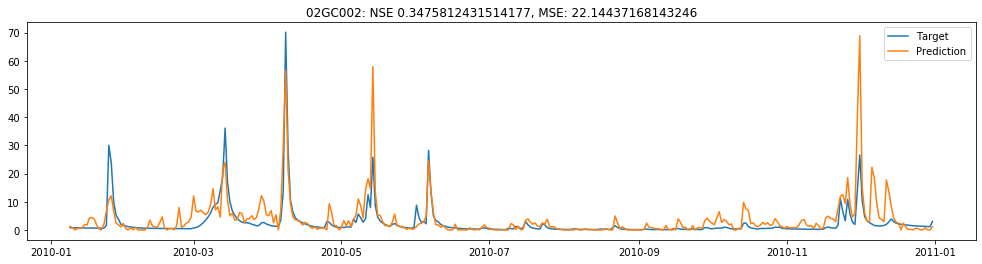

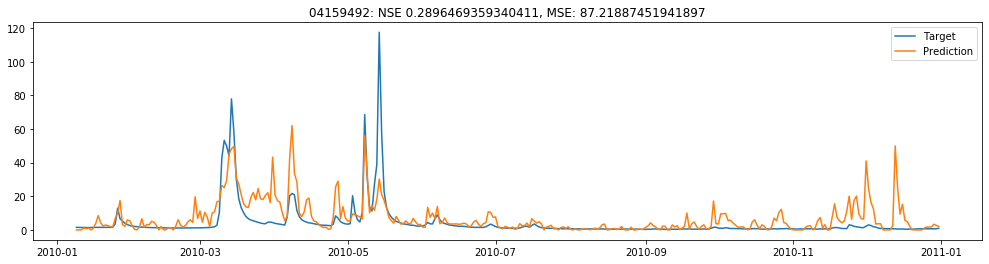

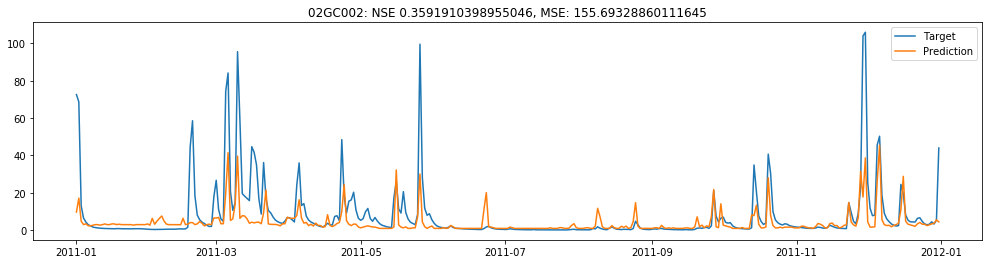

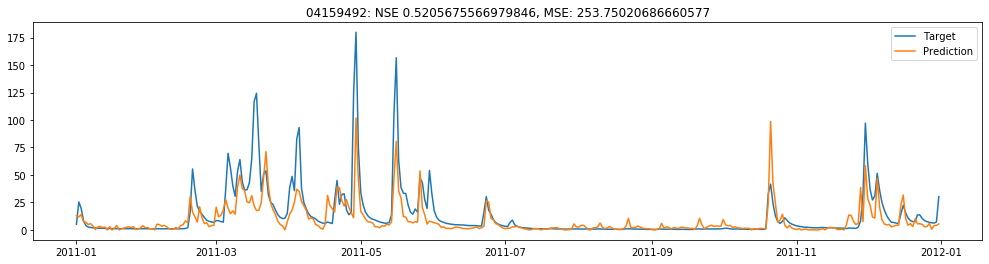

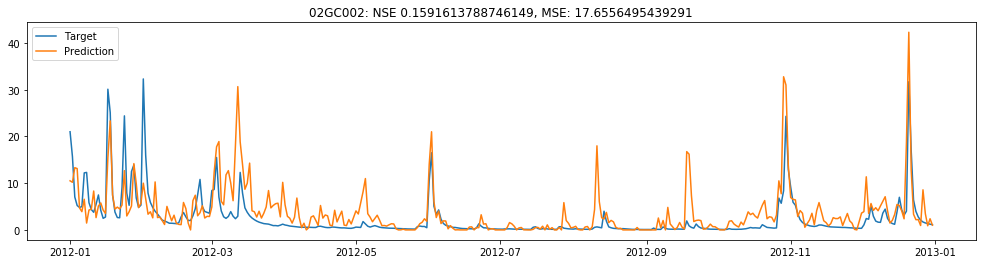

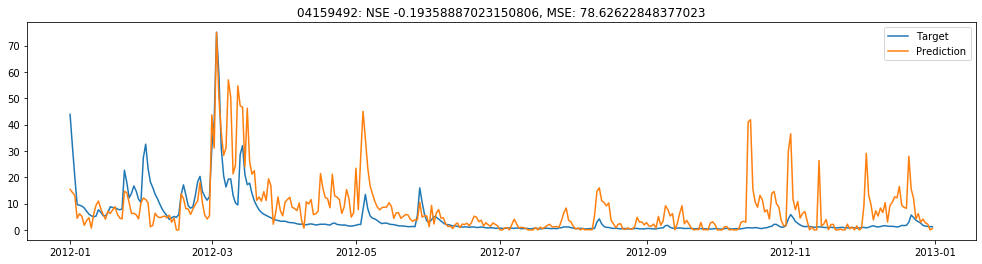

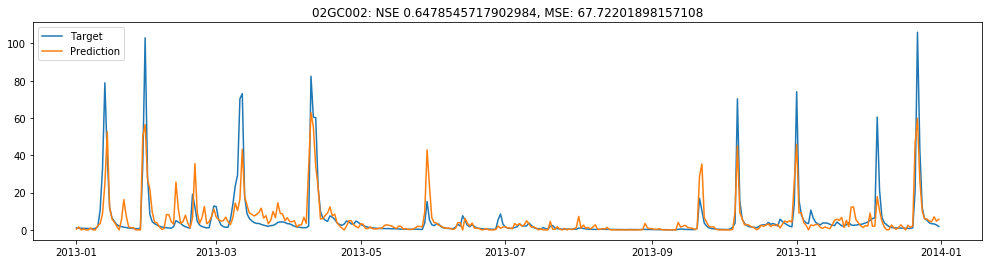

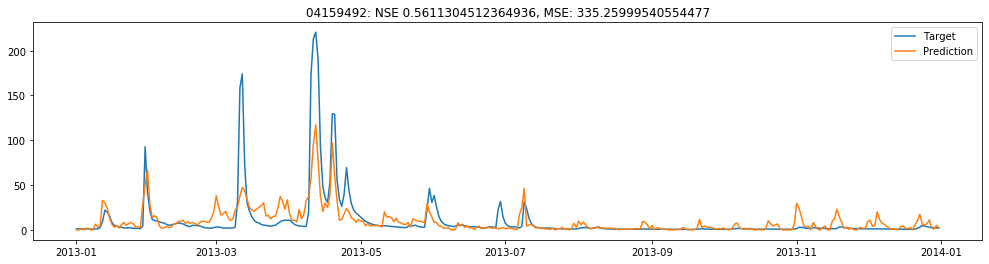

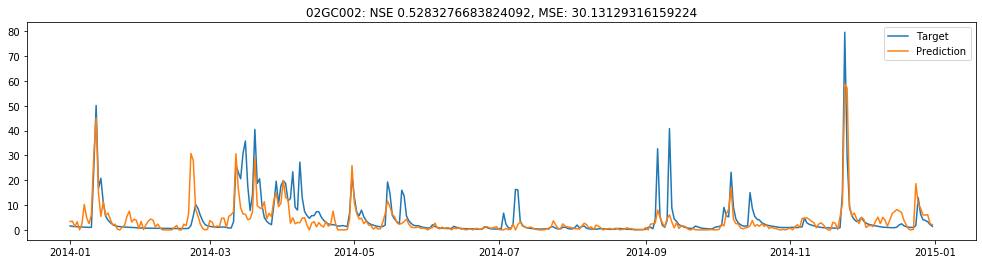

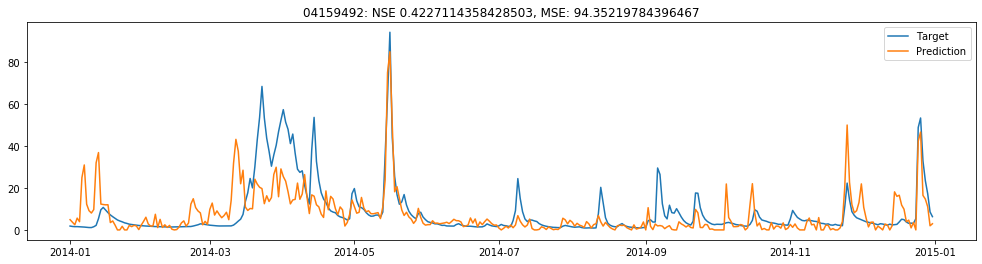

In [3]:
# Create test and train splits for each station (by time), then create predictions for each subbasin
history = 7
data_start = datetime.strptime('2010-01-01', '%Y-%m-%d') + timedelta(days=history + 1)
test_starts = [data_start, '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01']
test_ends = ['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31']

validation_fraction = 0.1

plot_list = ['04159492', '02GC002']
median_nse_mse_list = []
for cv_iter in range(len(test_starts)):
    test_start, test_end = test_starts[cv_iter], test_ends[cv_iter]
    print('Test: {} - {}'.format(test_start, test_end))
    
    predictions = {}
    actuals = {}
    models = {}
    nse_list, mse_list = [], []
    for station in station_data_dict.keys():
        print(station)
        station_data = station_data_dict[station]

        station_train = station_data[(station_data.index < test_start) | (station_data.index > test_end)].copy()
        num_validation_samples = int(validation_fraction * station_train.shape[0])
        shuffle_indices = np.arange(station_train.shape[0])
        np.random.shuffle(shuffle_indices)
        station_train = station_train.iloc[shuffle_indices]
        station_val, station_train = station_train.iloc[:num_validation_samples].copy(), station_train.iloc[num_validation_samples:].copy()

        station_test = station_data.loc[test_start:test_end]
        print('Shapes: train {}, val {}, test {}'.format(station_train.shape, station_val.shape, station_test.shape))

        station_val = [(station_train.drop(['station', 'runoff'], axis=1), station_train['runoff']), 
                       (station_val.drop(['station', 'runoff'], axis=1), station_val['runoff'])]

        m = pickle.load(open('../pickle/models/XGBoost_VIC_aggregateForcings_{}_20190704-150411.pkl'.format(station), 'rb'))  # Load model with parameters found in RandomSearchCV
        m = m.best_estimator_
        print(m)
        
        m.fit(station_train.drop(['station', 'runoff'], axis=1), station_train['runoff'], eval_set=station_val, eval_metric='rmse', early_stopping_rounds=100)
        
        station_test = station_test[~pd.isna(station_test['runoff'])]
        if len(station_test) == 0:
            print('Skipping', station)
            continue

        predict = pd.DataFrame(index=station_test.index)
        predict = predict.join(station_test.drop(['station', 'runoff'], axis=1))
        predict['runoff'] = np.nan
        predict['runoff'] = m.predict(predict.drop('runoff', axis=1))

        predictions['cv{}_{}'.format(cv_iter, station)] = predict[['runoff']]
        actuals['cv{}_{}'.format(cv_iter, station)] = station_test['runoff']
        models['cv{}_{}'.format(cv_iter, station)] = m
        
        nse, mse = evaluate.evaluate_daily(station, predict[['runoff']], station_test['runoff'], plot=station in plot_list)
        nse_list.append(nse)
        mse_list.append(mse)
    
    median_nse_mse_list.append((np.median(nse_list), np.median(mse_list)))
    print('Median NSE: {}\tMSE: {}'.format(*median_nse_mse_list[-1]))

In [4]:
median_nse_mse_list

[(0.3016653537016454, 61.164795193059774),
 (0.48630642833492554, 153.8468776901952),
 (0.17389750812778548, 51.79657906818909),
 (0.5805734607325083, 76.69399993835829),
 (0.4297931994544186, 81.70342517919579)]

In [5]:
print('Median NSE: {}\t, MSE: {}'.format(np.median(list(zip(*median_nse_mse_list))[0]), np.median(list(zip(*median_nse_mse_list))[1])))

Median NSE: 0.4297931994544186	, MSE: 76.69399993835829


In [6]:
load_data.pickle_results('XGBoost_VIC_aggregateForcings_CV', (predictions, actuals), time_stamp)

'XGBoost_VIC_aggregateForcings_CV_20190705-083405.pkl'

In [7]:
for station, model in models.items():
    load_data.pickle_model('XGBoost_VIC_aggregateForcings_CV', model, station, time_stamp, model_type='xgb')

Saved model as ../pickle/models/XGBoost_VIC_aggregateForcings_CV_cv4_02GA010_20190705-083405.pkl
Saved model as ../pickle/models/XGBoost_VIC_aggregateForcings_CV_cv4_02GA018_20190705-083405.pkl
Saved model as ../pickle/models/XGBoost_VIC_aggregateForcings_CV_cv4_02GA038_20190705-083405.pkl
Saved model as ../pickle/models/XGBoost_VIC_aggregateForcings_CV_cv4_02GA047_20190705-083405.pkl
Saved model as ../pickle/models/XGBoost_VIC_aggregateForcings_CV_cv4_02GB001_20190705-083405.pkl
Saved model as ../pickle/models/XGBoost_VIC_aggregateForcings_CV_cv4_02GB007_20190705-083405.pkl
Saved model as ../pickle/models/XGBoost_VIC_aggregateForcings_CV_cv4_02GC002_20190705-083405.pkl
Saved model as ../pickle/models/XGBoost_VIC_aggregateForcings_CV_cv4_02GC007_20190705-083405.pkl
Saved model as ../pickle/models/XGBoost_VIC_aggregateForcings_CV_cv4_02GC010_20190705-083405.pkl
Saved model as ../pickle/models/XGBoost_VIC_aggregateForcings_CV_cv4_02GC018_20190705-083405.pkl
Saved model as ../pickle/model